# Project: Credit Analysis
Analysing the dataset of credit analysis, which contains current application data and previous application data of the users, by means of EDA


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

### Reading the filed required for the analysis

In [3]:
os.chdir(r'C:\\Users\\umang\\OneDrive\\Desktop\\credit analysis')
application_data = pd.read_csv('application_data.csv', encoding='ISO-8859-1')
columns_description = pd.read_csv('columns_description.csv', encoding='ISO-8859-1')
previous_application = pd.read_csv('previous_application.csv', encoding='ISO-8859-1')

In [187]:
application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [189]:
previous_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
0                         SATURDAY                       15  ...   
1                         THURSDAY                       11  ...   
2                          TUESDAY                       11  ...   
3                           MONDAY                        7  ...   
4                         THURSDAY                        9  ...   
...                            ...                      ...  ...   
1670209                  WEDNESDAY                       12  ...   
1670210                    TUESDAY                       15  ...   
1670211                     MONDAY                       12  ...   
1670212                  WEDNESDAY                        9  ...   
1670213                     SUNDAY                       10  ...   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                Connectivity         12.0            middle   
1                         XNA         36.0        low_action   
2                         XNA         12.0              high   
3                         XNA         12.0            middle   
4                         XNA         24.0              high   
...                       ...          ...               ...   
1670209             Furniture         30.0        low_normal   
1670210             Furniture         12.0            middle   
1670211  Consumer electronics         10.0        low_normal   
1670212                   XNA         12.0        low_normal   
1670213                   XNA         48.0            middle   

                 PRODUCT_COMBINATION  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0           POS mobile with interest            365243.0          -42.0   
1                   Cash X-Sell: low            365243.0         -134.0   
2                  Cash X-Sell: high            365243.0         -271.0   
3                Cash X-Sell: middle            365243.0         -482.0   
4                  Cash Street: high                 NaN            NaN   
...                              ...                 ...            ...   
1670209   POS industry with interest            365243.0         -508.0   
1670210   POS industry with interest            365243.0        -1604.0   
1670211  POS household with interest      

In [191]:
columns_description

Unnamed: 0                     Table                        Row  \
0             1          application_data                 SK_ID_CURR   
1             2          application_data                     TARGET   
2             5          application_data         NAME_CONTRACT_TYPE   
3             6          application_data                CODE_GENDER   
4             7          application_data               FLAG_OWN_CAR   
..          ...                       ...                        ...   
155         209  previous_application.csv             DAYS_FIRST_DUE   
156         210  previous_application.csv  DAYS_LAST_DUE_1ST_VERSION   
157         211  previous_application.csv              DAYS_LAST_DUE   
158         212  previous_application.csv           DAYS_TERMINATION   
159         213  previous_application.csv  NFLAG_INSURED_ON_APPROVAL   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
155  Relative to application date of current applic...   
156  Relative to application date of current applic...   
157  Relative to application date of current applic...   
158  Relative to application date of current applic...   
159  Did the client requested insurance during the ...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
155  time only relative to the application  
156  time only relative to the application  
157  time only relative to the application  
158  time only relative to the application  
159                                    NaN  

[160 rows x 5 columns]

In [193]:
#Merging the current application data and previous application data by means of left join, 
#since we require all the current and previous details of the applicant

entire_data = pd.merge(application_data, previous_application, on = 'SK_ID_CURR', how='left')

In [194]:
entire_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406597.5   
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
...                 ...           ...               ...           ...   
1430150               N             0          157500.0      675000.0   
1430151               N             0          157500.0      675000.0   
1430152               N             0          157500.0      675000.0   
1430153               N             0          157500.0      675000.0   
1430154               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0              24700.5  ...       Auto technology        24.0   
1              35698.5  ...                   XNA        12.0   
2              35698.5  ...             Furniture         6.0   
3              35698.5  ...  Consumer electronics        12.0   
4               6750.0  ...          Connectivity         4.0   
...                ...  ...                   ...         ...   
1430150        49117.5  ...                   XNA        24.0   
1430151        49117.5  ...          Connectivity         0.0   
1430152        49117.5  ...                   XNA        60.0   
1430153        49117.5  ...                   XNA        36.0   
1430154        49117.5  ...          Connectivity         6.0   

        NAME_YIELD_GROUP          PRODUCT_COMBINATION DAYS_FIRST_DRAWING  \
0             low_normal      POS other with interest           365243.0   
1             low_normal             Cash X-Sell: low           365243.0   
2                 middle   POS industry with interest           365243.0   
3                 middle  POS household with interest           365243.0   
4                 middle  POS mobile without interest           365243.0   
...                  ...                          ...                ...   
1430150           middle          Cash X-Sell: middle           365243.0   
1430151              XNA                  Card Street                NaN   
1430152       low_normal             Cash Street: low                NaN   
1430153       low_normal             Cash X-Sell: low           365243.0   
1430154             high     POS mobile with interest           365243.0   

        DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0               -565.0                      125.0          -25.0   
1               -716.0                     -386.0         -536.0   
2               -797.0                     -647.0         -647.0   
3              -2310.0                    -1980.0        -1980.0   
4               -784.0                     -694.0         -724.0   
...                ...                        ...            ...   
1430150         -618.0               

In [195]:
#checking the names of the columns and information of the entire dataset after merging
entire_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=158)

In [196]:
entire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(85), int64(41), object(32)
memory usage: 1.7+ GB


In [13]:
#checking the basic info about numerical and categorical data

In [197]:
entire_data.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.430155e+06  1.430155e+06  1.430155e+06      1.430155e+06   
mean   2.784702e+05  8.624240e-02  4.038870e-01      1.736036e+05   
std    1.028021e+05  2.807218e-01  7.165176e-01      1.983303e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893610e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789560e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675090e+05  0.000000e+00  1.000000e+00      2.115000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
count  1.430155e+06   1.430062e+06       1.428936e+06   
mean   5.893386e+05   2.704203e+04       5.294435e+05   
std    3.874204e+05   1.404002e+04       3.557882e+05   
min    4.500000e+04   1.615500e+03       4.050000e+04   
25%    2.700000e+05   1.679850e+04       2.385000e+05   
50%    5.084955e+05   2.491650e+04       4.500000e+05   
75%    8.086500e+05   3.457350e+04       6.795000e+05   
max    4.050000e+06   2.580255e+05       4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                1.430155e+06  1.430155e+06   1.430155e+06  ...   
mean                 2.079102e-02 -1.631495e+04   6.860209e+04  ...   
std                  1.339810e-02  4.346737e+03   1.451967e+05  ...   
min                  2.900000e-04 -2.522900e+04  -1.791200e+04  ...   
25%                  1.003200e-02 -1.997500e+04  -2.825000e+03  ...   
50%                  1.885000e-02 -1.603700e+04  -1.277000e+03  ...   
75%                  2.866300e-02 -1.272950e+04  -2.820000e+02  ...   
max                  7.250800e-02 -7.489000e+03   3.652430e+05  ...   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count               4791.000000   1.413701e+06      1.413701e+06   
mean                   0.771284  -8.803670e+02      3.149878e+02   
std                    0.100644   7.835402e+02      7.695082e+03   
min                    0.373150  -2.922000e+03     -1.000000e+00   
25%                    0.715645  -1.313000e+03     -1.000000e+00   
50%                    0.835095  -5.820000e+02      4.000000e+00   
75%                    0.852537  -2.710000e+02      8.500000e+01   
max                    1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.106488e+06       852595.000000   852595.000000   
mean   1.605194e+01       342257.656710    13488.741567   
std    1.456675e+01        88832.266598    71650.147146   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1630.000000   
50%    1.200000e+01       365243.000000     -825.000000   
75%    2.400000e+01       365243.000000     -408.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              852595.000000  852595.000000     852595.000000   
mean                33274.831806   76665.634755      82353.171672   
std                106161.775933  149704.716371     153537.064274   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1244.000000   -1316.000000      -1269.000000   
50%                  -358.000000    -534.000000       -494.000000   
75%                   135.000000     -73.000000        -42.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              852595.000000  
mean                    0.330572  
std                     0.470419  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 126 columns]

In [15]:
entire_data.describe(include='object')

NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count               1430155     1430155      1430155         1430155   
unique                    2           3            2               2   
top              Cash loans           F            N               Y   
freq                1320679      964822       947544         1031672   

       NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count            1426124          1430155                        1430155   
unique                 7                8                              5   
top        Unaccompanied          Working  Secondary / secondary special   
freq             1167279           730613                        1046822   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  ...  \
count             1430155            1430155          967424  ...   
unique                  6                  6              18  ...   
top               Married  House / apartment        Laborers  ...   
freq               921040            1279761          253761  ...   

       CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_CLIENT_TYPE  \
count             1413701            719029          1413701   
unique                  9                 7                4   
top                   XAP     Unaccompanied         Repeater   
freq              1145533            427635          1037682   

       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
count              1413701        1413701           1413701   
unique                  27              5                 3   
top                    XNA            POS               XNA   
freq                797209         592460            900053   

                   CHANNEL_TYPE NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
count                   1413701              1413701          1413701   
unique                        8                   11                5   
top     Credit and cash offices                  XNA              XNA   
freq                     600342               715322           429198   

       PRODUCT_COMBINATION  
count              1413388  
unique                  17  
top                   Cash  
freq                235101  

[4 rows x 32 columns]

In [202]:
entire_data.shape

(1430155, 158)

### Identifying the missing values and missing value treatment

In [203]:
#calculating the percentage of null values percentage present in the data

null_perc = entire_data.isnull().mean()*100
null_perc

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               40.384434
DAYS_LAST_DUE_1ST_VERSION    40.384434
DAYS_LAST_DUE                40.384434
DAYS_TERMINATION             40.384434
NFLAG_INSURED_ON_APPROVAL    40.384434
Length: 158, dtype: float64

In [204]:
nullcol_perc = null_perc.sort_values(ascending=False)
nullcol_perc.head(50)

RATE_INTEREST_PRIVILEGED       99.665001
RATE_INTEREST_PRIMARY          99.665001
COMMONAREA_MODE                69.607980
COMMONAREA_MEDI                69.607980
COMMONAREA_AVG                 69.607980
NONLIVINGAPARTMENTS_MEDI       69.211729
NONLIVINGAPARTMENTS_AVG        69.211729
NONLIVINGAPARTMENTS_MODE       69.211729
FONDKAPREMONT_MODE             68.131286
LIVINGAPARTMENTS_MODE          68.128559
LIVINGAPARTMENTS_AVG           68.128559
LIVINGAPARTMENTS_MEDI          68.128559
FLOORSMIN_MEDI                 67.584283
FLOORSMIN_AVG                  67.584283
FLOORSMIN_MODE                 67.584283
OWN_CAR_AGE                    66.256734
YEARS_BUILD_AVG                66.207929
YEARS_BUILD_MODE               66.207929
YEARS_BUILD_MEDI               66.207929
LANDAREA_MEDI                  59.116669
LANDAREA_MODE                  59.116669
LANDAREA_AVG                   59.116669
BASEMENTAREA_AVG               58.203202
BASEMENTAREA_MODE              58.203202
BASEMENTAREA_MED

In [31]:
#Removing columns (vertically) with more than 40% of null values

In [207]:
cleaned_data = entire_data.loc[:,nullcol_perc<40]

In [208]:
cleaned_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406597.5   
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
...                 ...           ...               ...           ...   
1430150               N             0          157500.0      675000.0   
1430151               N             0          157500.0      675000.0   
1430152               N             0          157500.0      675000.0   
1430153               N             0          157500.0      675000.0   
1430154               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  ...  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0              24700.5  ...               New              Vehicles   
1              35698.5  ...          Repeater                   XNA   
2              35698.5  ...         Refreshed             Furniture   
3              35698.5  ...         Refreshed  Consumer Electronics   
4               6750.0  ...               New                Mobile   
...                ...  ...               ...                   ...   
1430150        49117.5  ...          Repeater                   XNA   
1430151        49117.5  ...          Repeater                   XNA   
1430152        49117.5  ...          Repeater                   XNA   
1430153        49117.5  ...          Repeater                   XNA   
1430154        49117.5  ...          Repeater             Computers   

        NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0                  POS               XNA                    Stone   
1                 Cash            x-sell  Credit and cash offices   
2                  POS               XNA                    Stone   
3                  POS               XNA             Country-wide   
4                  POS               XNA         Regional / Local   
...                ...               ...                      ...   
1430150           Cash            x-sell  Credit and cash offices   
1430151          Cards           walk-in             Country-wide   
1430152           Cash           walk-in  Credit and cash offices   
1430153           Cash            x-sell          AP+ (Cash loan)   
1430154            POS               XNA             Country-wide   

        SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                  500.0       Auto technology         24.0        low_normal   
1                   -1.0                   XNA         12.0        low_normal   
2                 1400.0             Furniture          6.0            middle   
3                  200.0  Consumer electronics         12.0            middle   
4                   30.0          Connectivity          4.0            middle   
...                  ...               

In [23]:
#Now removing the rows (horizontally) which contain more than 30% of null values

In [37]:
nullrow_perc = cleaned_data.isnull().mean(axis=1)*100
nullrow_perc.sort_values(ascending=False).head(50)

643528     37.755102
1026372    37.755102
619879     37.755102
1237829    37.755102
79310      37.755102
820659     37.755102
713919     37.755102
252429     37.755102
16155      37.755102
403173     37.755102
1250260    37.755102
234305     37.755102
47760      37.755102
773523     37.755102
883361     37.755102
55950      37.755102
132040     37.755102
1082986    37.755102
773022     37.755102
1172849    37.755102
397184     37.755102
493269     37.755102
948526     37.755102
862409     37.755102
467855     37.755102
1204981    37.755102
1251372    37.755102
695653     37.755102
908361     37.755102
1000663    37.755102
741418     37.755102
646796     37.755102
248449     37.755102
327634     37.755102
542134     37.755102
992420     37.755102
315389     36.734694
678988     36.734694
226193     36.734694
232329     36.734694
688073     36.734694
506178     36.734694
321328     36.734694
1018904    36.734694
293435     36.734694
1421239    36.734694
780342     36.734694
908521     36

In [39]:
cleaned_data = cleaned_data.loc[nullrow_perc<30,:]
cleaned_data.drop_duplicates()

#after dropping the columns and rows with most percentage of mull values and dropping the duplicate values, we get the cleaned data
cleaned_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   
1430152      456255       0           Cash loans           F            N   
1430153      456255       0           Cash loans           F            N   
1430154      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406597.5   
1                     N             0          270000.0     1293502.5   
2                     N             0          270000.0     1293502.5   
3                     N             0          270000.0     1293502.5   
4                     Y             0           67500.0      135000.0   
...                 ...           ...               ...           ...   
1430150               N             0          157500.0      675000.0   
1430151               N             0          157500.0      675000.0   
1430152               N             0          157500.0      675000.0   
1430153               N             0          157500.0      675000.0   
1430154               N             0          157500.0      675000.0   

         AMT_ANNUITY_x  ...  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0              24700.5  ...               New              Vehicles   
1              35698.5  ...          Repeater                   XNA   
2              35698.5  ...         Refreshed             Furniture   
3              35698.5  ...         Refreshed  Consumer Electronics   
4               6750.0  ...               New                Mobile   
...                ...  ...               ...                   ...   
1430150        49117.5  ...          Repeater                   XNA   
1430151        49117.5  ...          Repeater                   XNA   
1430152        49117.5  ...          Repeater                   XNA   
1430153        49117.5  ...          Repeater                   XNA   
1430154        49117.5  ...          Repeater             Computers   

        NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0                  POS               XNA                    Stone   
1                 Cash            x-sell  Credit and cash offices   
2                  POS               XNA                    Stone   
3                  POS               XNA             Country-wide   
4                  POS               XNA         Regional / Local   
...                ...               ...                      ...   
1430150           Cash            x-sell  Credit and cash offices   
1430151          Cards           walk-in             Country-wide   
1430152           Cash           walk-in  Credit and cash offices   
1430153           Cash            x-sell          AP+ (Cash loan)   
1430154            POS               XNA             Country-wide   

        SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                  500.0       Auto technology         24.0        low_normal   
1                   -1.0                   XNA         12.0        low_normal   
2                 1400.0             Furniture          6.0            middle   
3                  200.0  Consumer electronics         12.0            middle   
4                   30.0          Connectivity          4.0            middle   
...                  ...               

In [26]:
#converting the values of all the days columns into years for better clarity

In [40]:
cleaned_data['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -16765
3   -16765
4   -19046
Name: DAYS_BIRTH, dtype: int64

In [41]:
cleaned_data['DAYS_BIRTH'] = round(abs(cleaned_data['DAYS_BIRTH'])/365,0)

In [42]:
cleaned_data['DAYS_BIRTH'] 

0          26.0
1          46.0
2          46.0
3          46.0
4          52.0
           ... 
1430150    46.0
1430151    46.0
1430152    46.0
1430153    46.0
1430154    46.0
Name: DAYS_BIRTH, Length: 1427896, dtype: float64

In [43]:
cleaned_data['DAYS_REGISTRATION'] = round(abs(cleaned_data['DAYS_REGISTRATION'])/365,0)
cleaned_data['DAYS_REGISTRATION']

0          10.0
1           3.0
2           3.0
3           3.0
4          12.0
           ... 
1430150    14.0
1430151    14.0
1430152    14.0
1430153    14.0
1430154    14.0
Name: DAYS_REGISTRATION, Length: 1427896, dtype: float64

In [44]:
cleaned_data['DAYS_ID_PUBLISH'] = round(abs(cleaned_data['DAYS_ID_PUBLISH']) / 365, 0)
cleaned_data['DAYS_ID_PUBLISH'].head()

0    6.0
1    1.0
2    1.0
3    1.0
4    7.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [32]:
#checking the datatype of each column values

In [45]:
cleaned_data.dtypes

SK_ID_CURR                int64
TARGET                    int64
NAME_CONTRACT_TYPE_x     object
CODE_GENDER              object
FLAG_OWN_CAR             object
                         ...   
SELLERPLACE_AREA        float64
NAME_SELLER_INDUSTRY     object
CNT_PAYMENT             float64
NAME_YIELD_GROUP         object
PRODUCT_COMBINATION      object
Length: 98, dtype: object

### checking the data balance


In [35]:
#calculating the ratio of target column to check the balance

In [46]:
(cleaned_data['TARGET']==0).sum() / (cleaned_data['TARGET']==1).sum()

10.592417292470063

In [37]:
#since the ratio is 10X1, there is too much data imbalance

In [57]:
ontime_data = cleaned_data.loc[cleaned_data['TARGET']==0]
not_ontime_data = cleaned_data.loc[cleaned_data['TARGET']==1]

In [59]:
def plotting(train, train0, train1, column):
    """
    Plots three types of visualizations for a given column in the dataset:
    a pie chart of overall distribution, a countplot by category, a barplot by percentage.

    Parameters:
    - train: DataFrame containing the entire dataset.
    - train0: DataFrame filtered by the target variable with value 0.
    - train1: DataFrame filtered by the target variable with value 1.
    - column: The name of the column to be visualized.
    """

    # Assigning dataframes to local variables (This step might be redundant as we can directly use the function arguments)
    train = train
    train_0 = train0
    train_1 = train1
    col = column

    # Initialize figure with a specific size
    fig = plt.figure(figsize=(15,10))

    # Create a subplot for the pie chart
    ax1 = plt.subplot(221)
    # Plotting pie chart for overall distribution of the column
    train[col].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1, labeldistance=1.2)
    plt.title('Plotting data for the column: ' + column)

    # Create a subplot for the countplot
    ax2 = plt.subplot(222)
    # Plotting count plot by category with hue as TARGET
    sns.countplot(x=column, hue='TARGET', data=train, ax=ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    # Adjust layout to prevent overlap

    ax3 = plt.subplot(223)
    train_0_dist = train_0[col].value_counts(normalize=True)* 100
    train_1_dist = train_1[col].value_counts(normalize=True)* 100

    train_0_dist.plot(kind='bar', ax=ax3,  width=0.4, position=1, label='Target 0')
    train_1_dist.plot(kind='bar', ax=ax3, color='orange', width=0.4, position=0, label='Target 1')

    # Customize the plot
    ax3.set_title('Percentage Distribution of Target 0 and 1')
    ax3.set_ylabel('Percentage')
    ax3.legend()

    
    fig.tight_layout()

    # Display the plots
    plt.show()

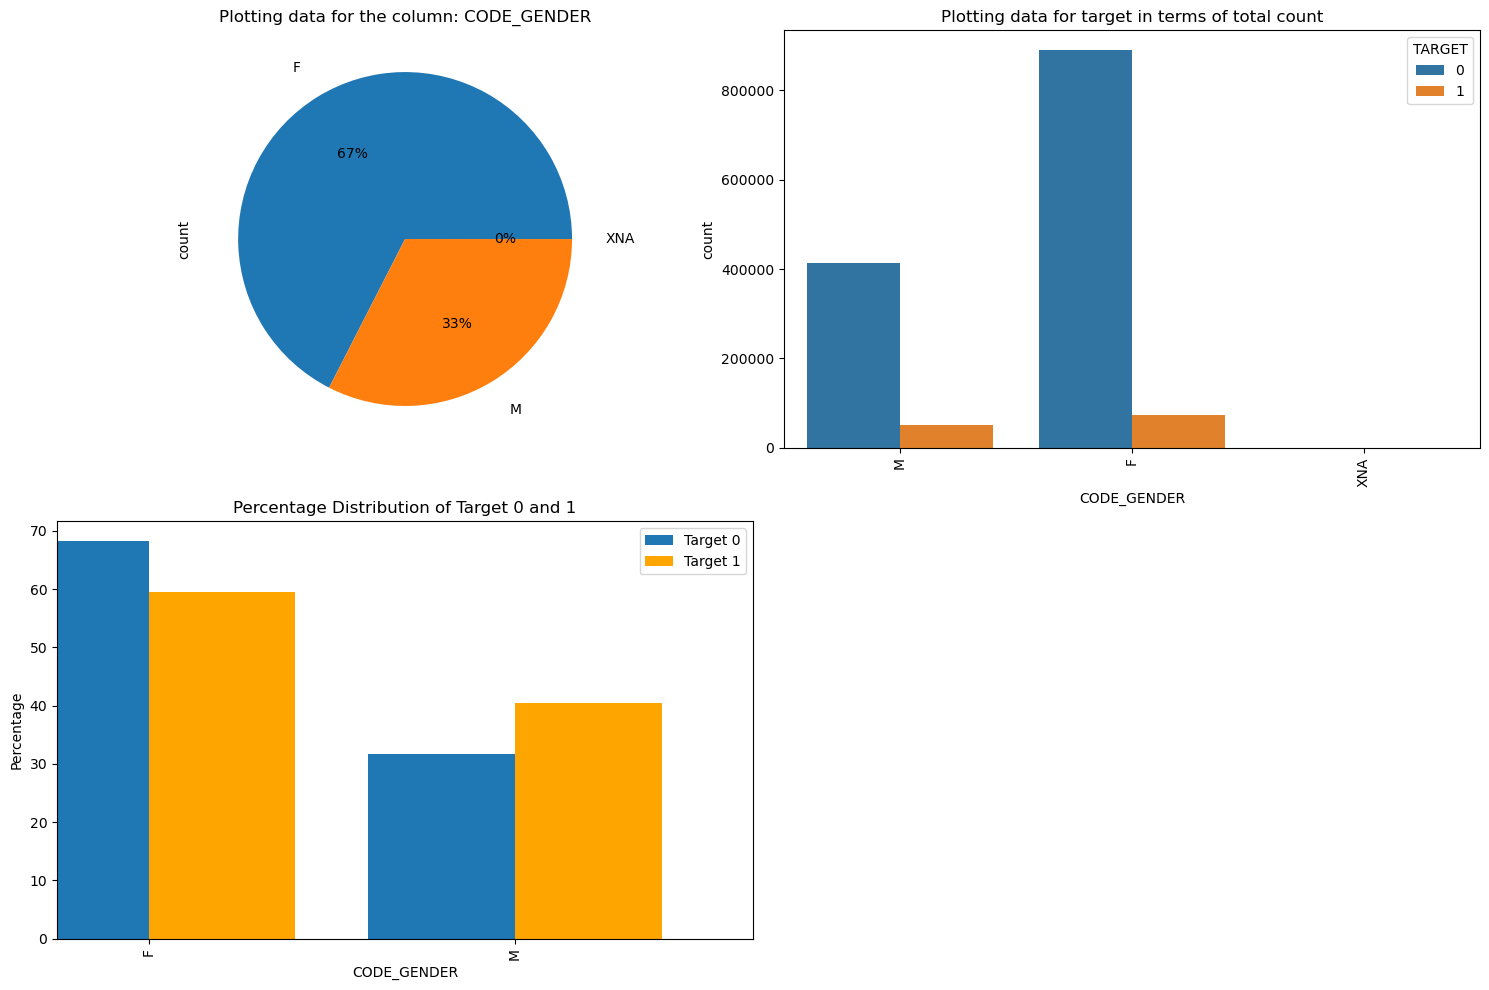

In [61]:
plotting(cleaned_data, ontime_data, not_ontime_data, 'CODE_GENDER')

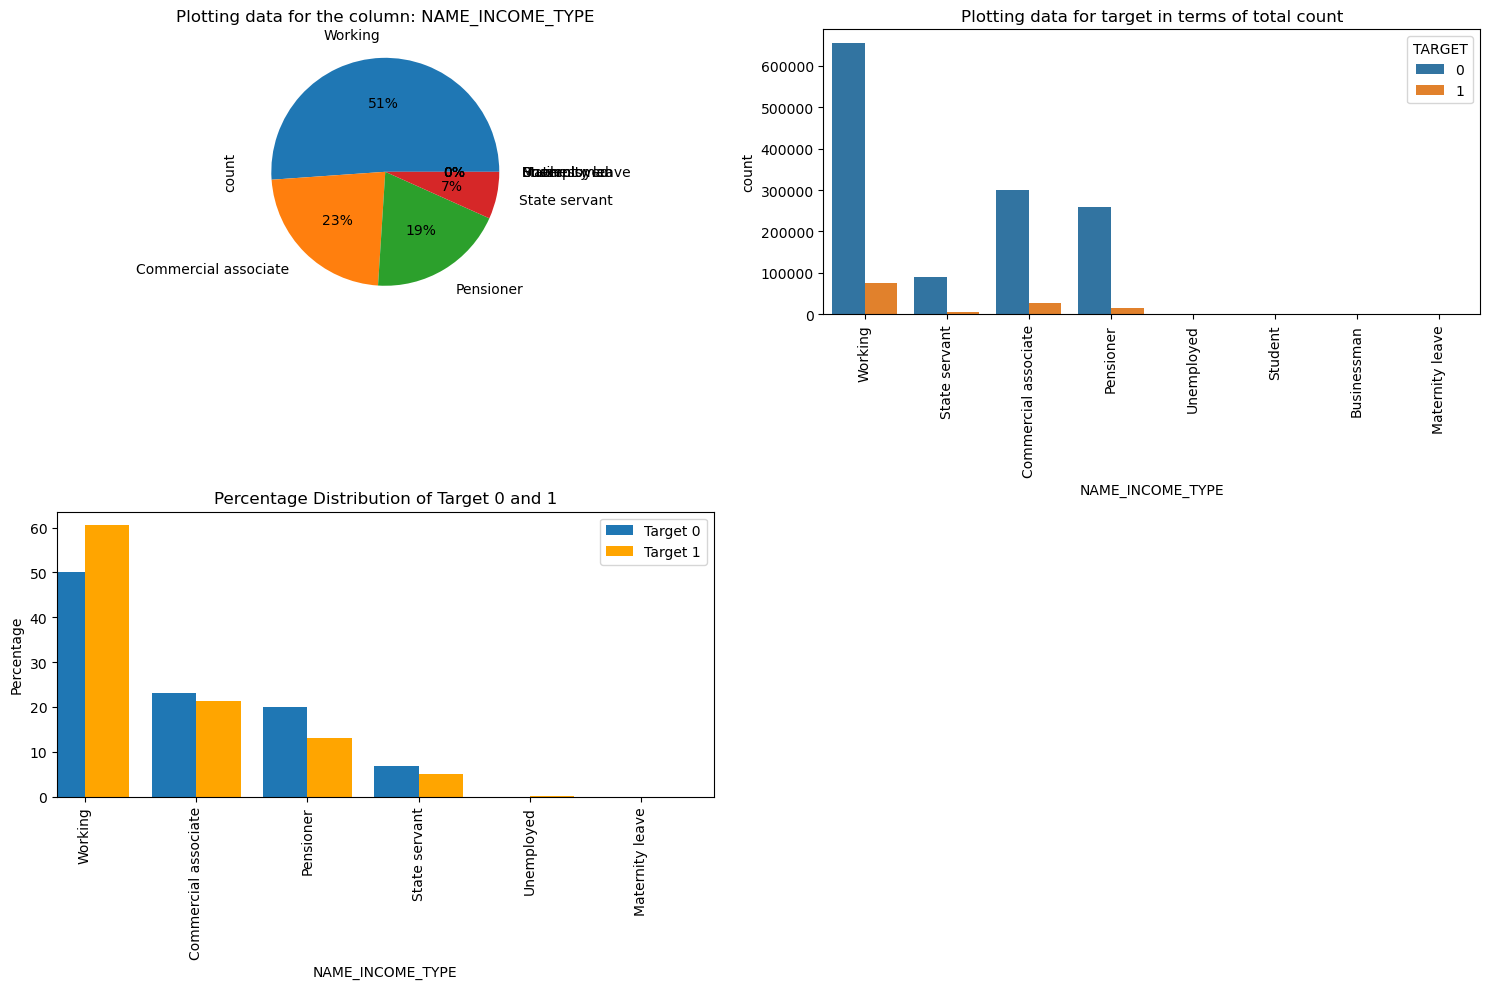

In [62]:
plotting(cleaned_data, ontime_data, not_ontime_data, 'NAME_INCOME_TYPE')

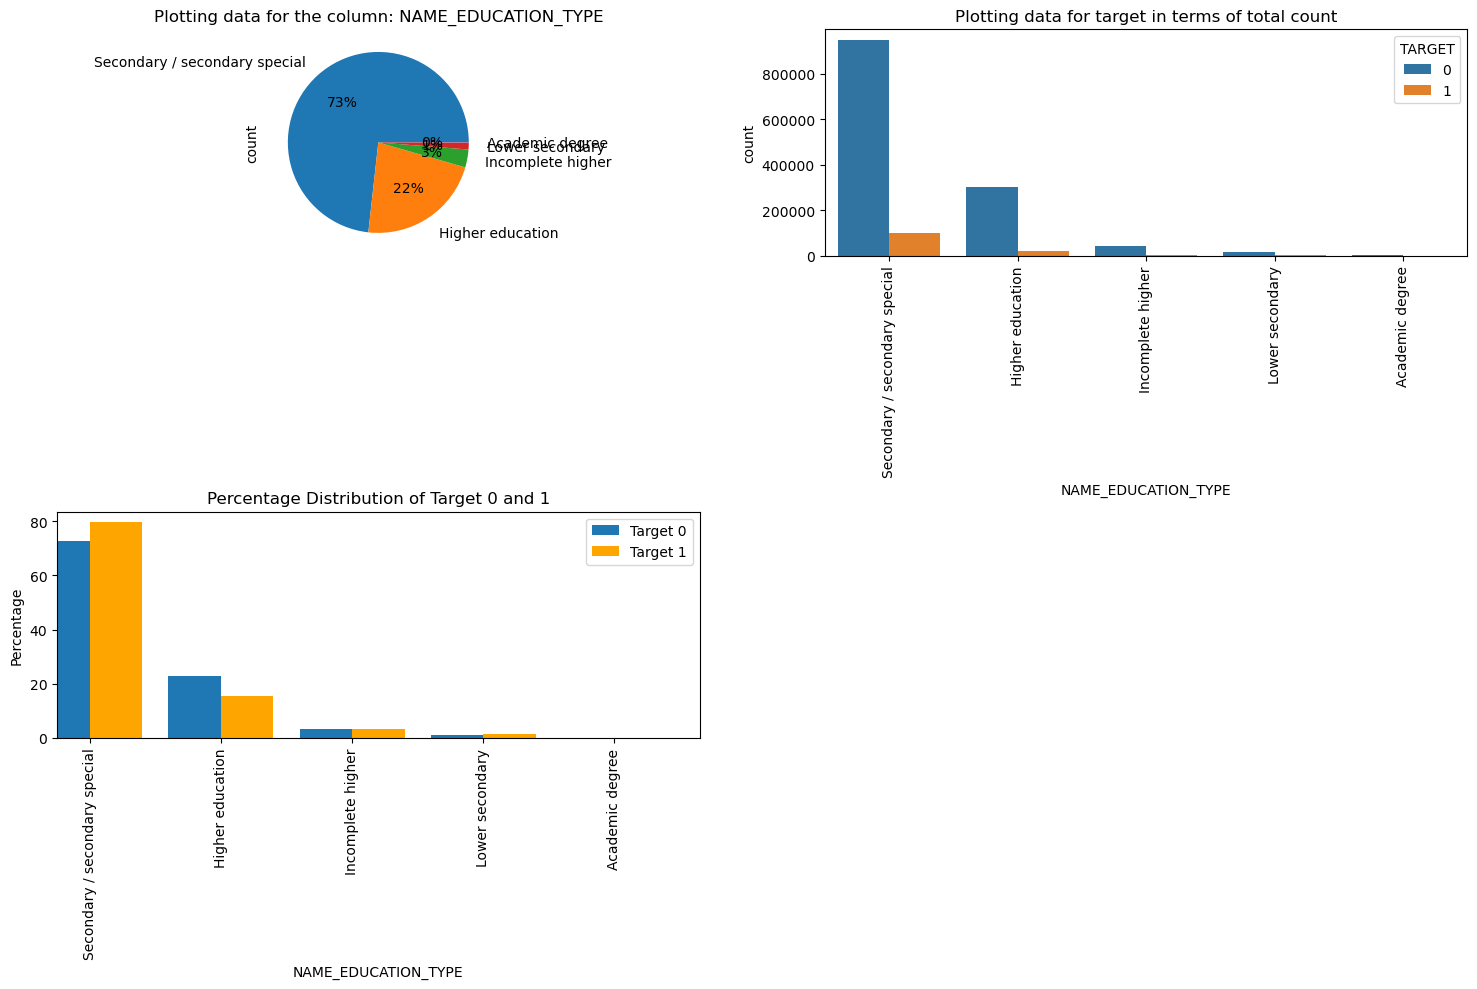

In [65]:
plotting(cleaned_data, ontime_data, not_ontime_data, 'NAME_EDUCATION_TYPE')

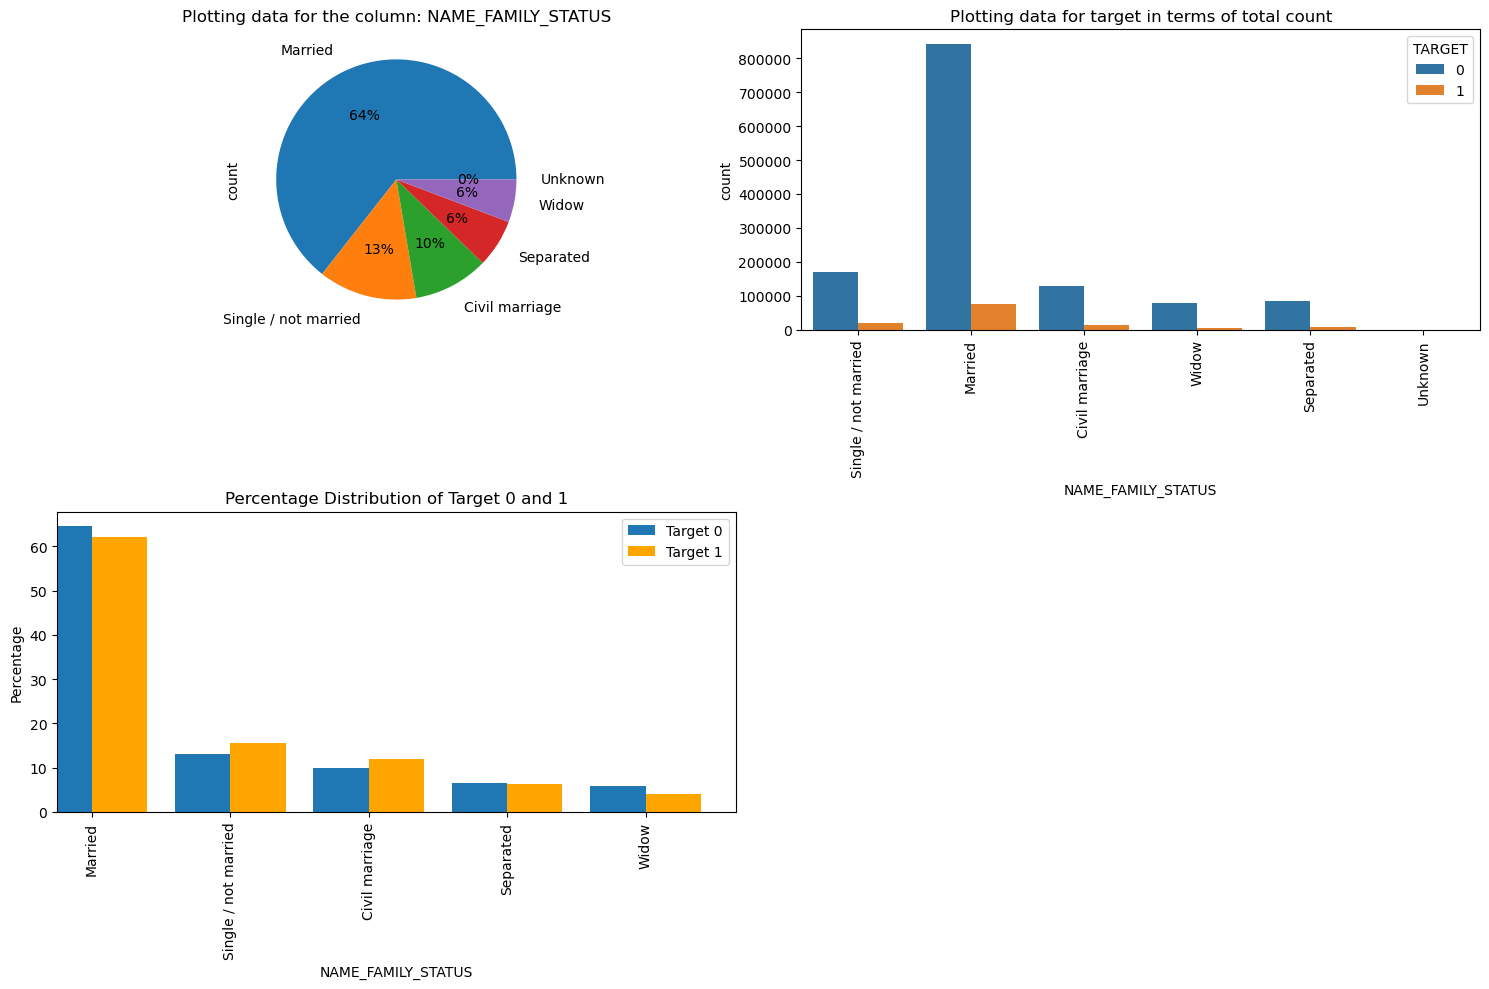

In [43]:
plotting(cleaned_data, ontime_data, not_ontime_data, 'NAME_FAMILY_STATUS')

In [44]:
# in similar way by applying the plotting function we can analyse the other columns

### Univariate analysis of the categorical data

In [46]:
# creating list with all the categorical data

In [67]:
cleaned_categorical = cleaned_data.select_dtypes(include=['object']).columns

In [69]:
cleaned_categorical

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [71]:
cleaned_data['TARGET'] = cleaned_data['TARGET'].astype(str)

plotting NAME_CONTRACT_TYPE_x


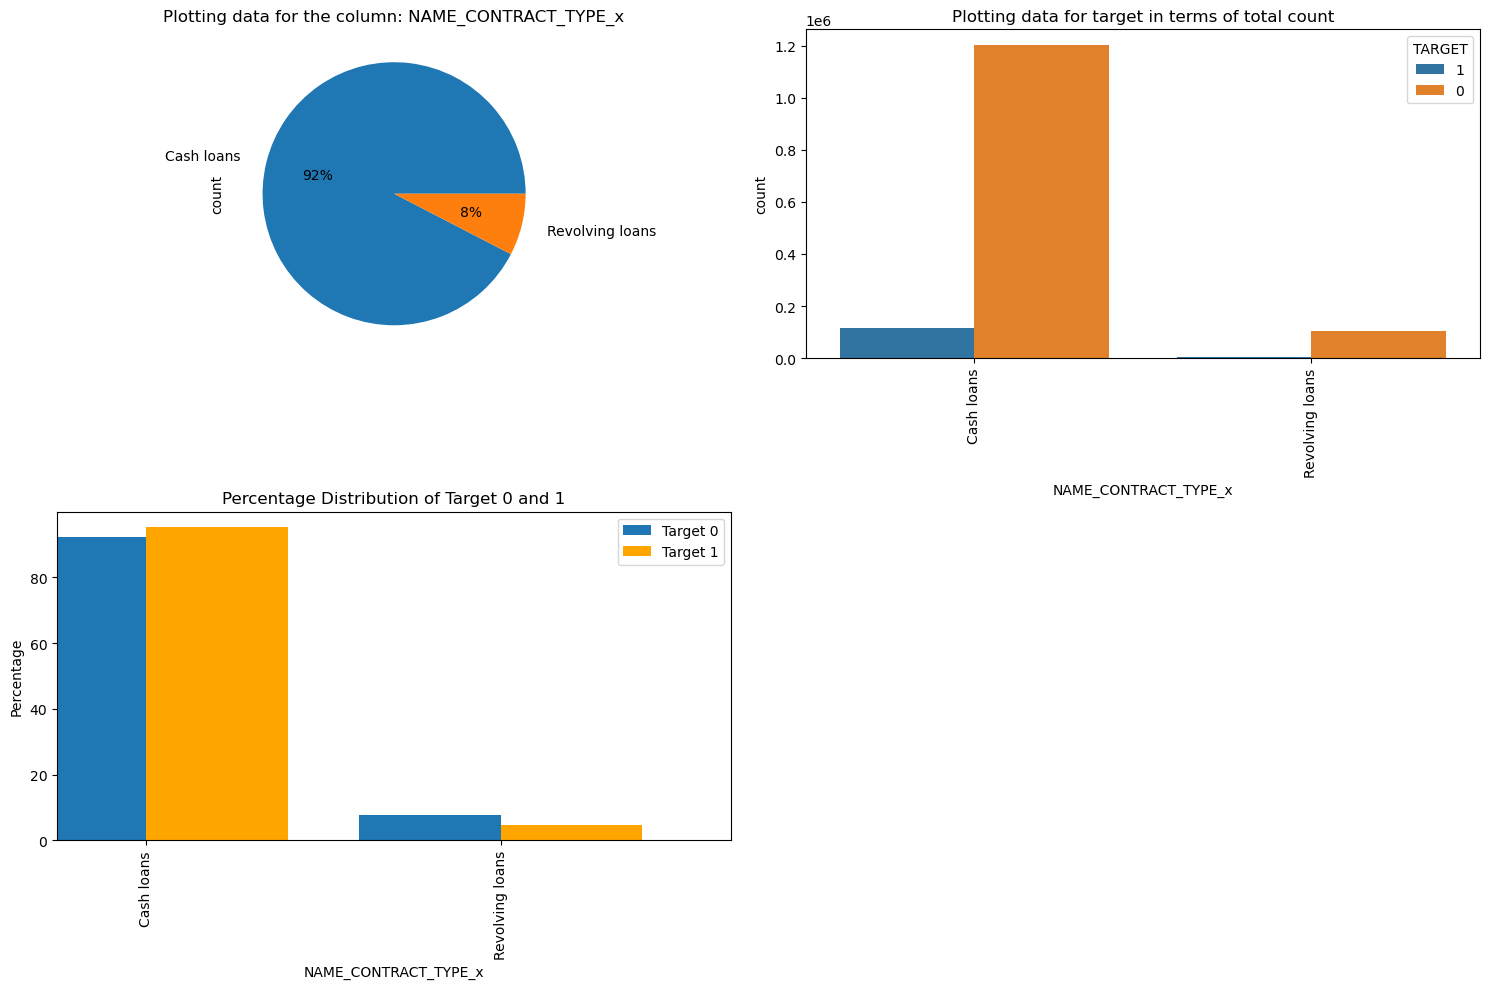

......................
plotting CODE_GENDER


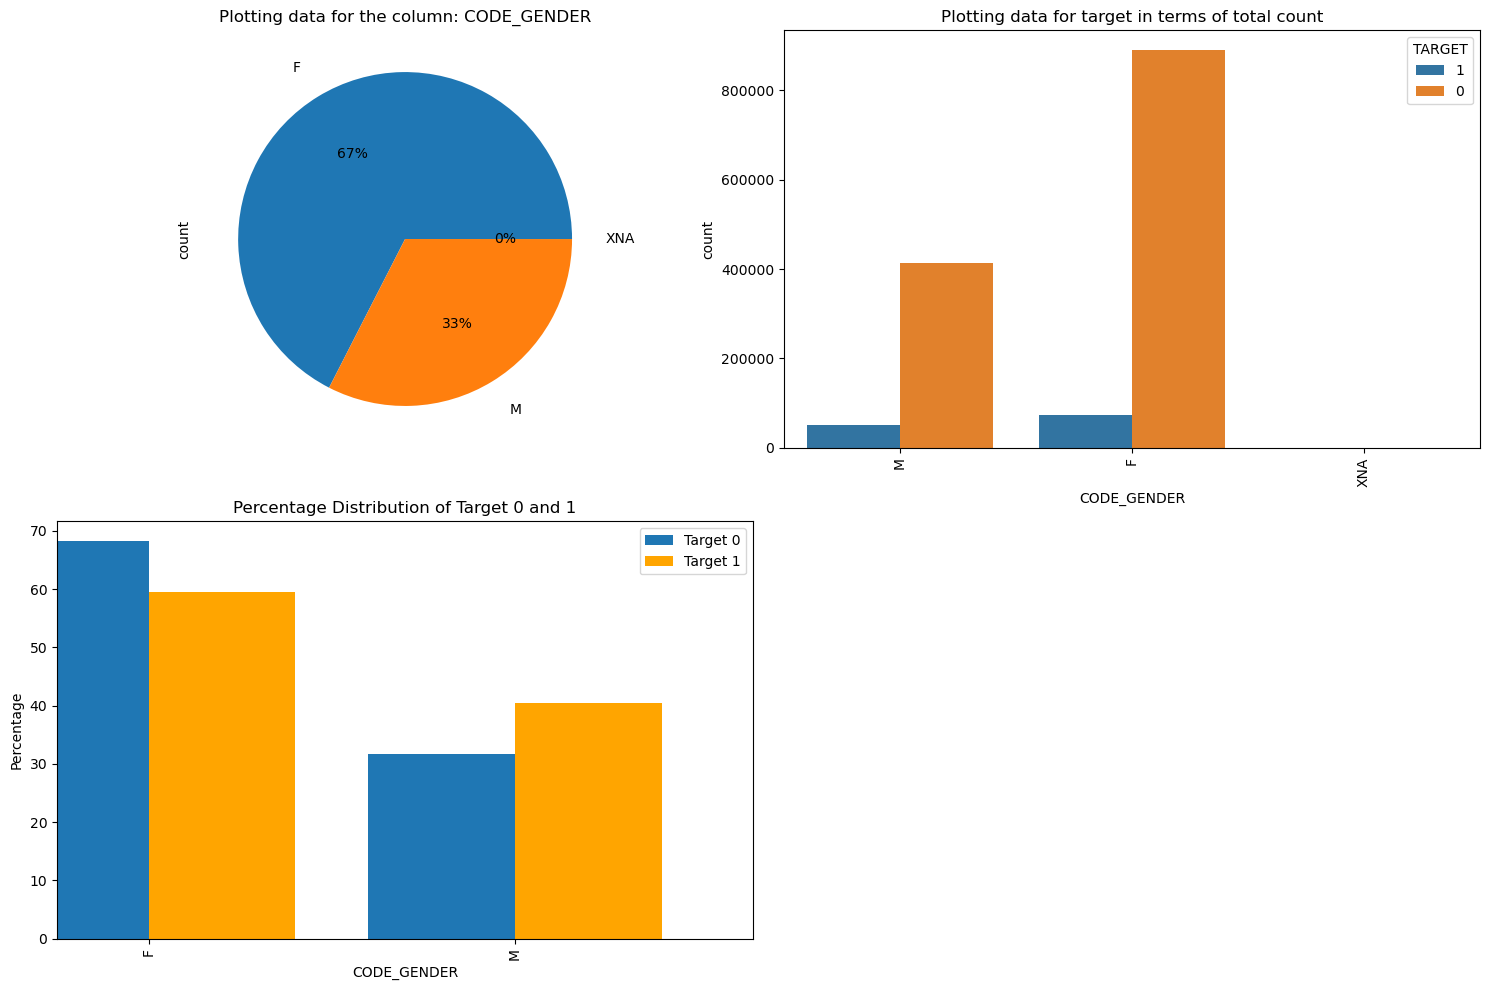

......................
plotting FLAG_OWN_CAR


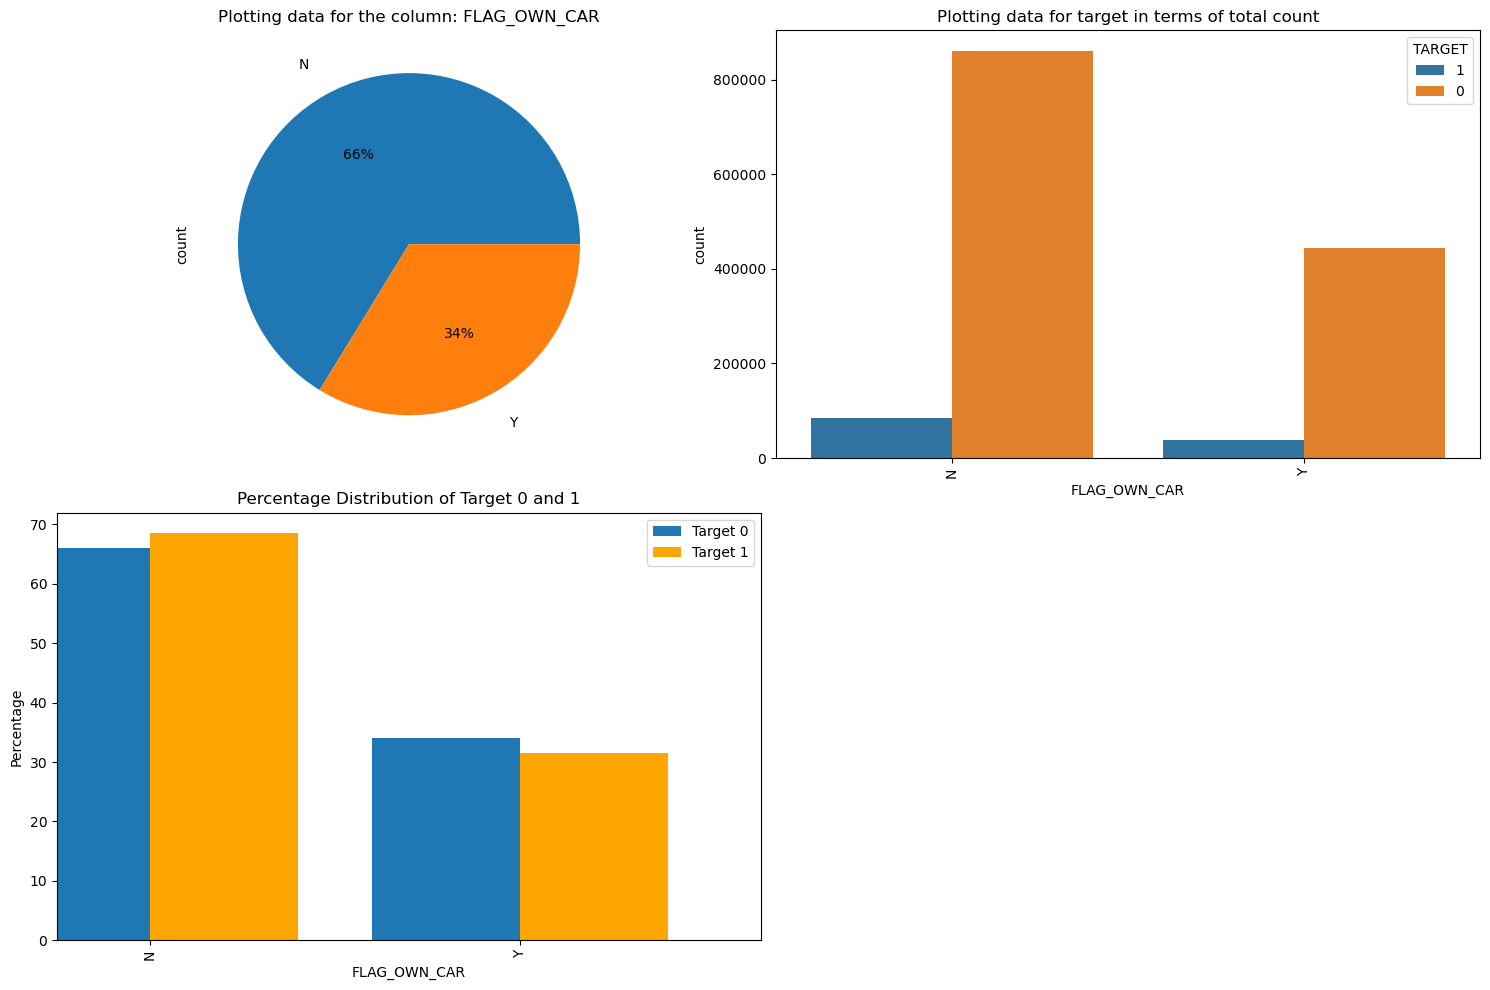

......................
plotting FLAG_OWN_REALTY


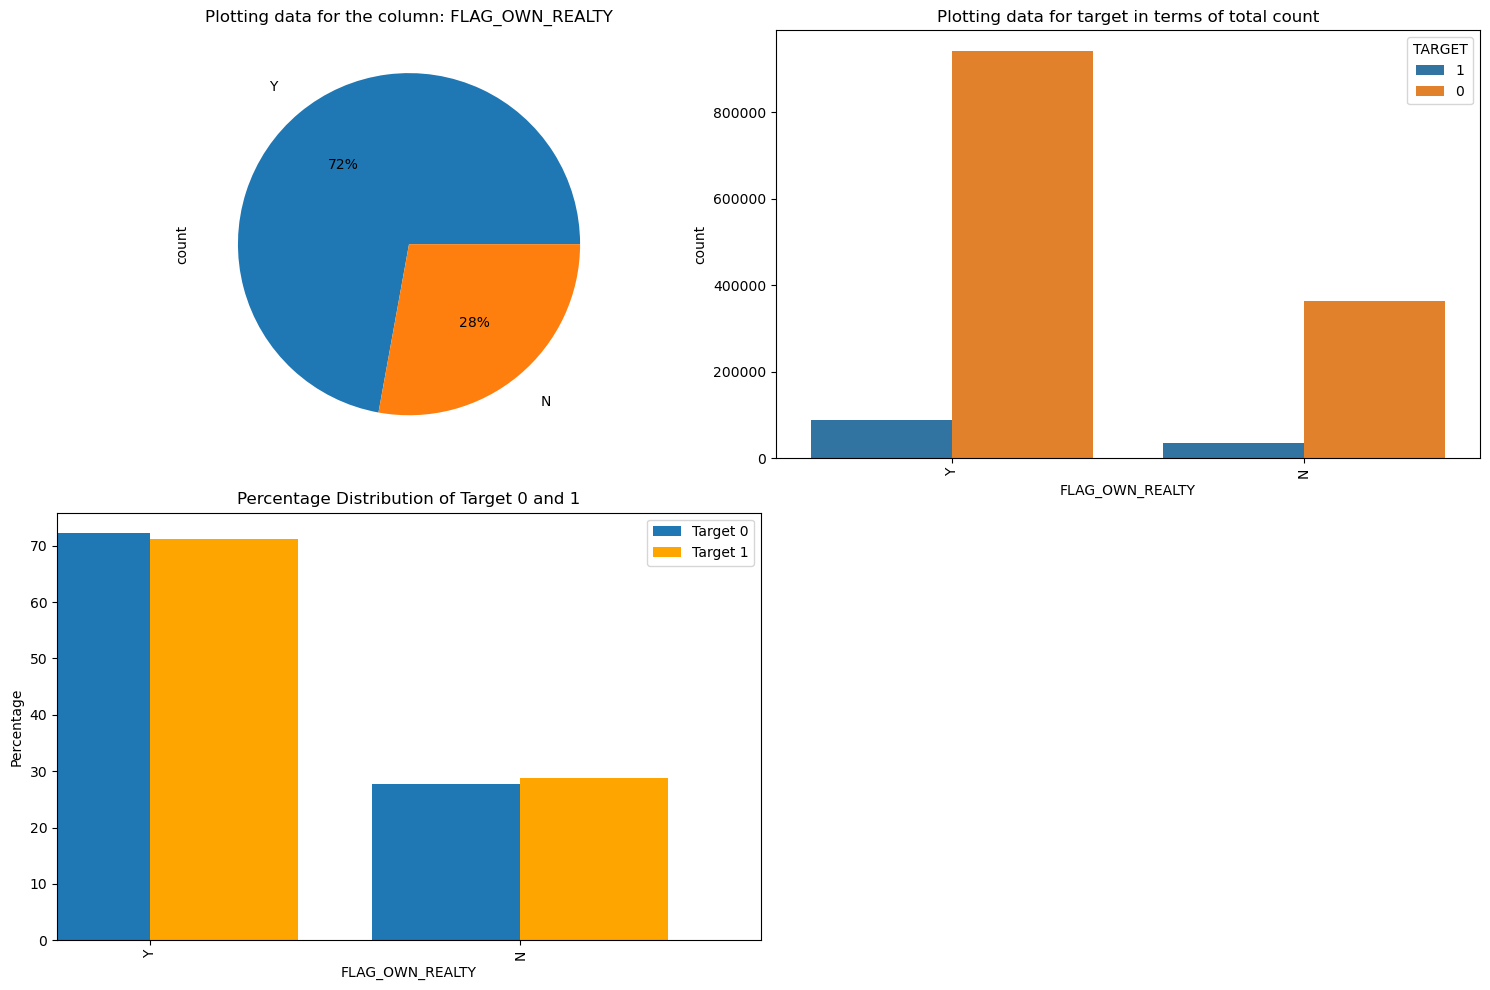

......................
plotting NAME_TYPE_SUITE_x


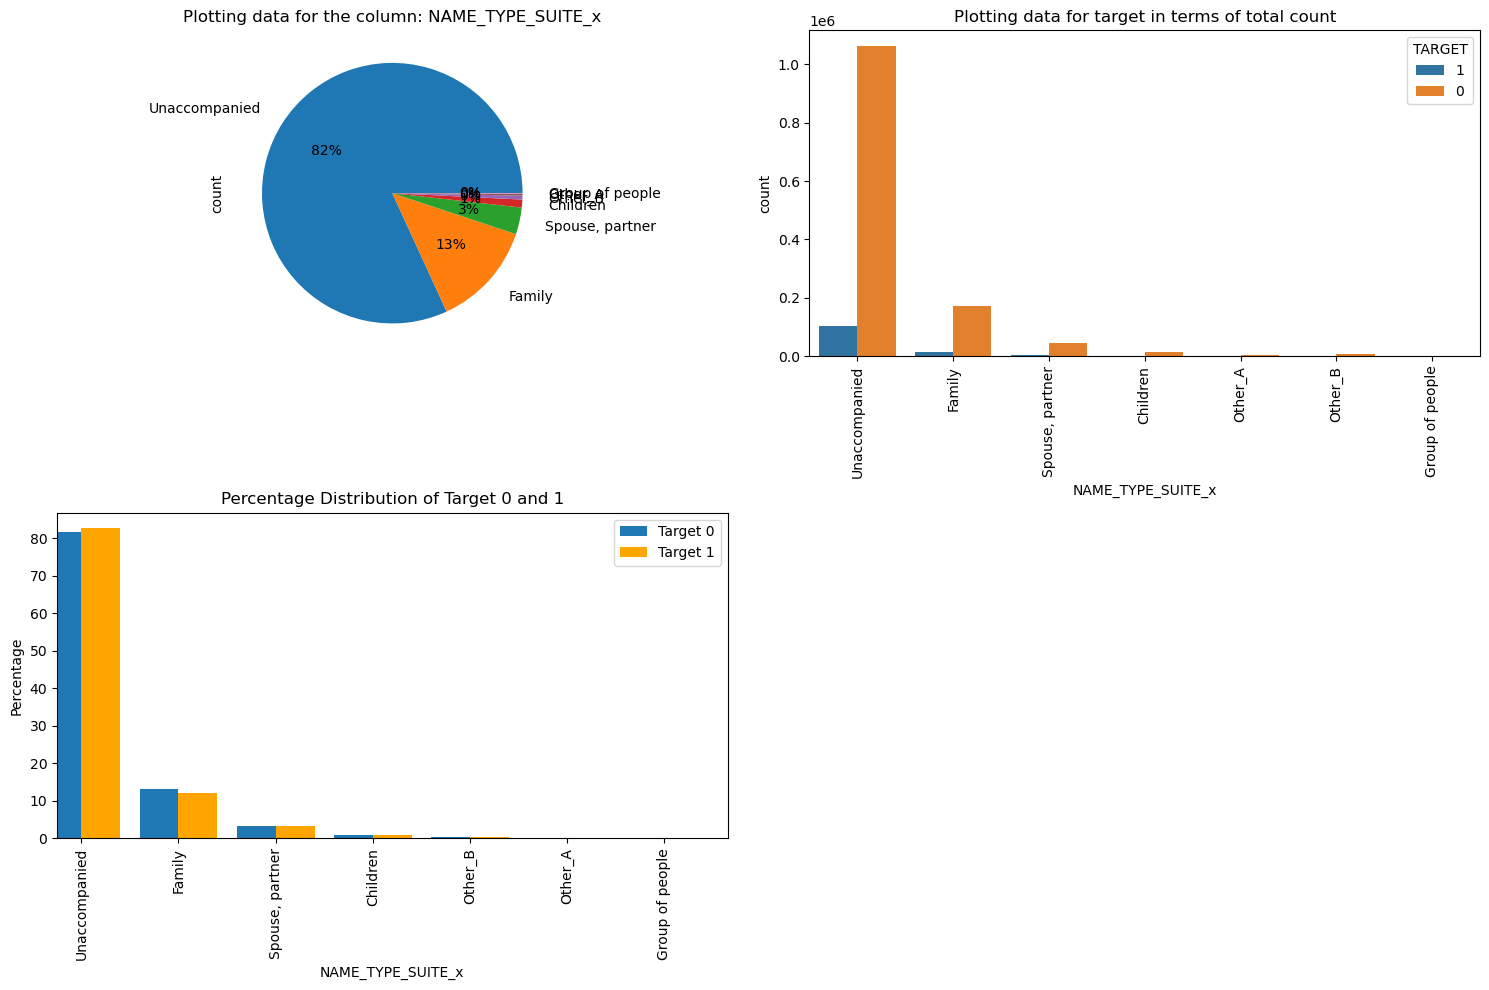

......................
plotting NAME_INCOME_TYPE


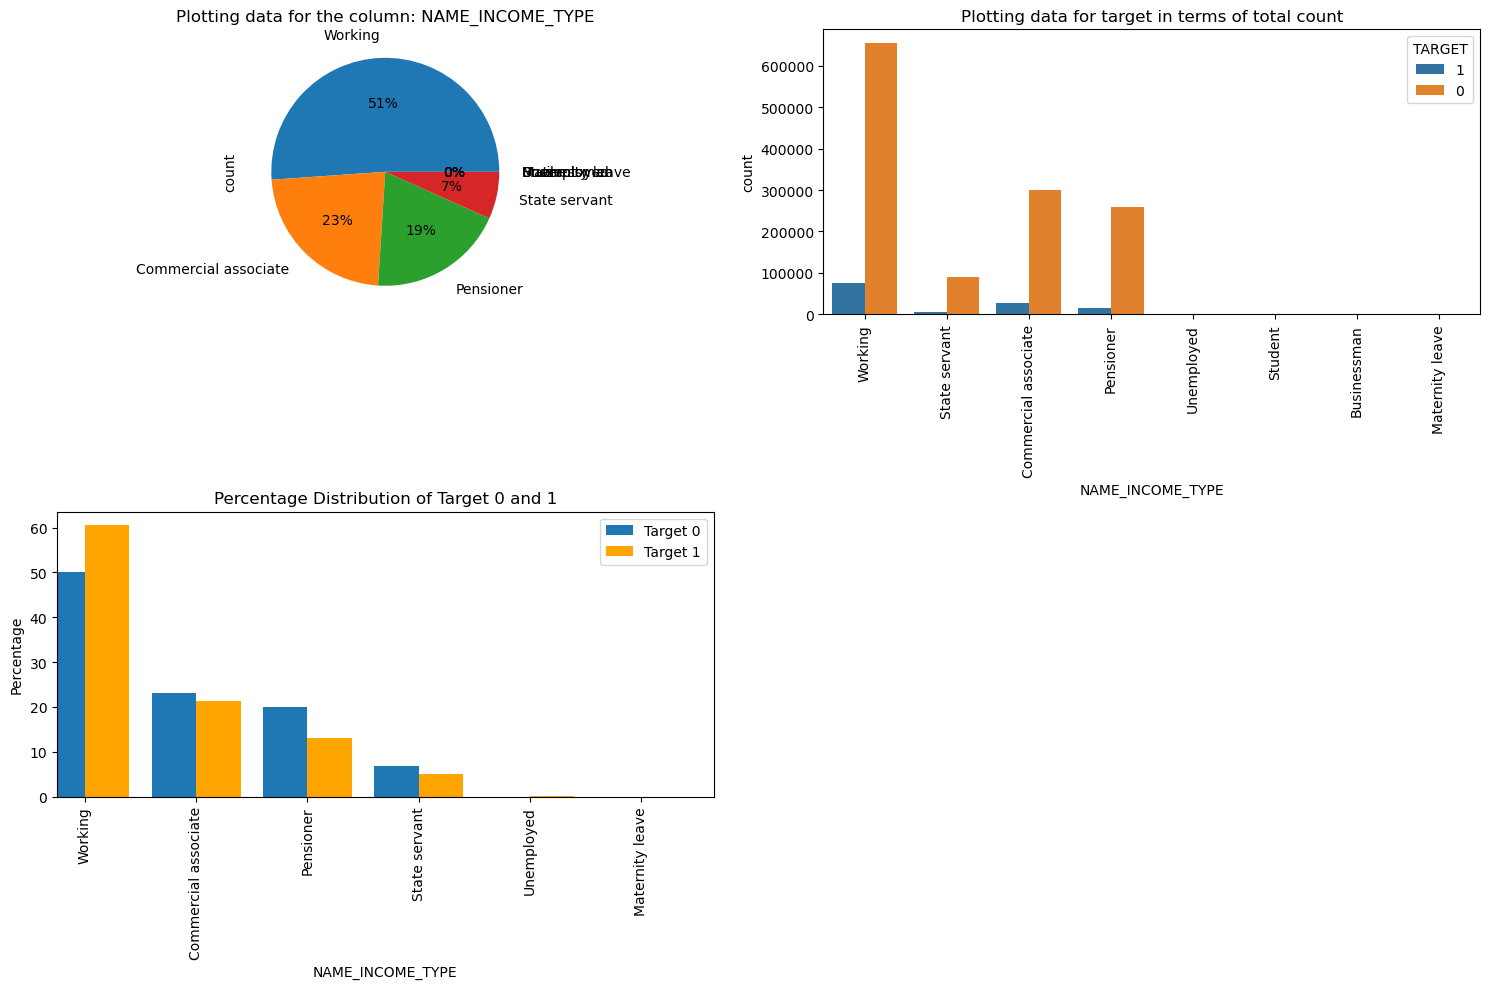

......................
plotting NAME_EDUCATION_TYPE


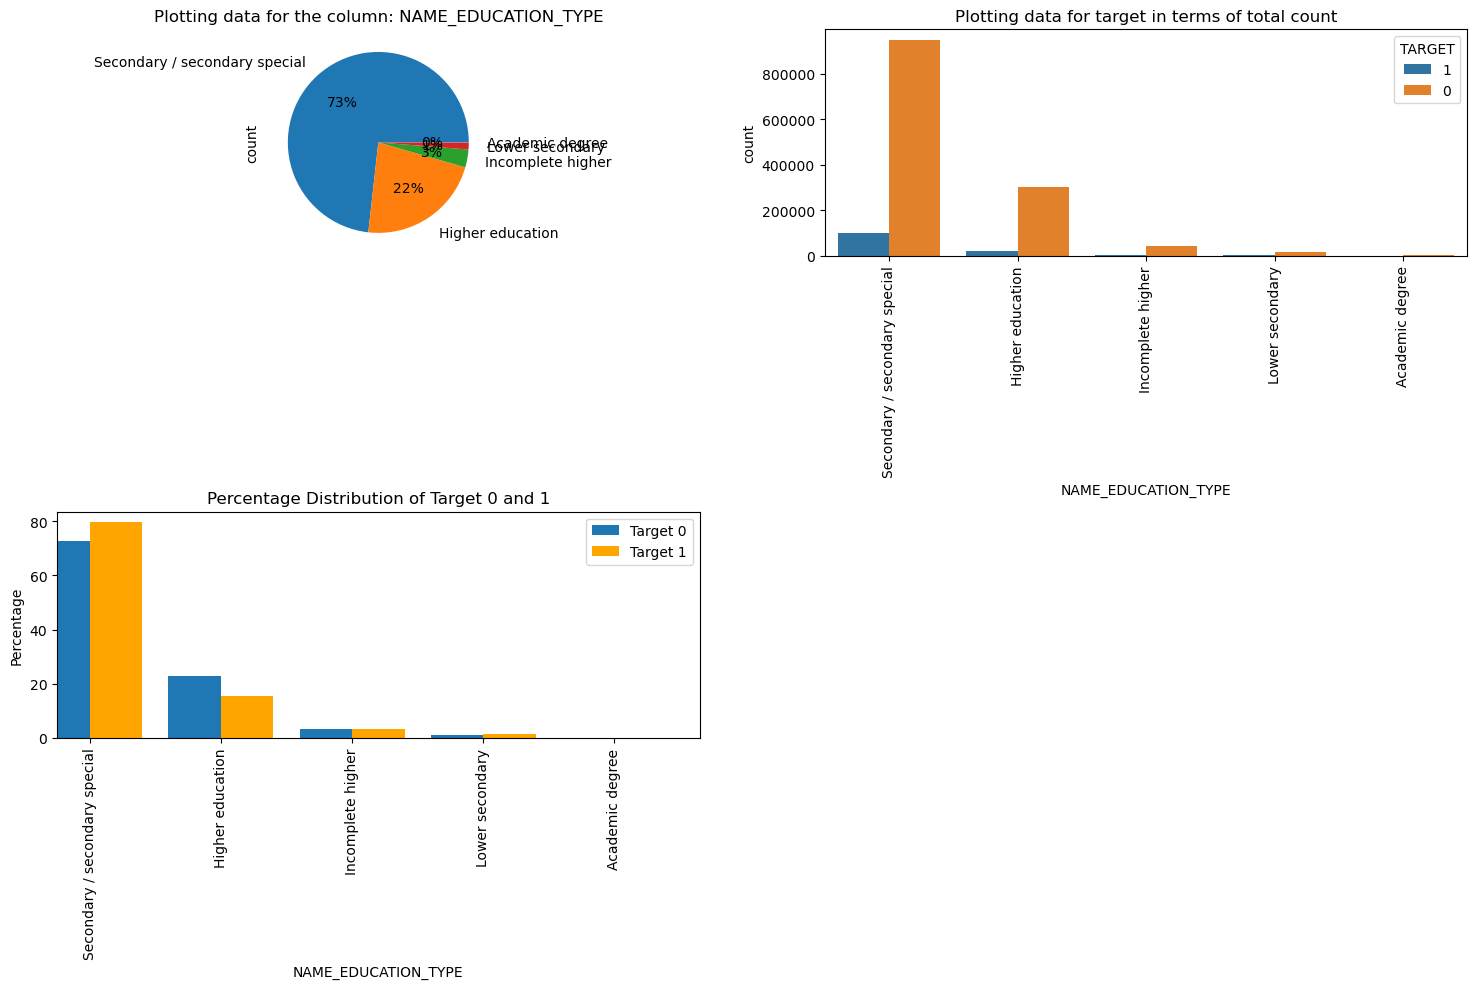

......................
plotting NAME_FAMILY_STATUS


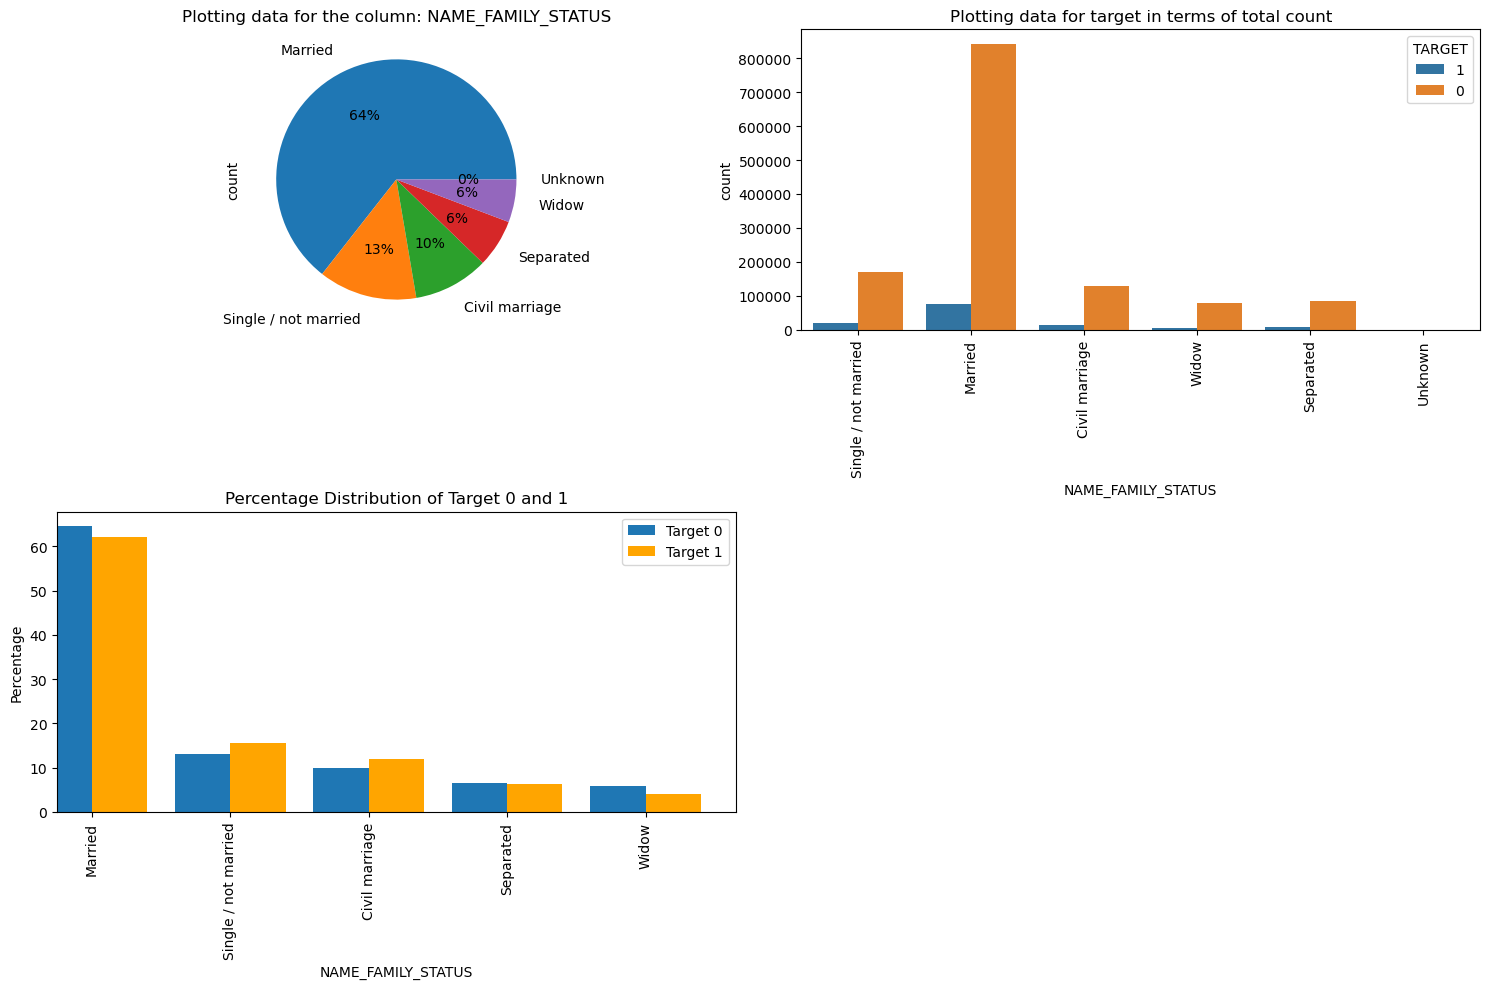

......................
plotting NAME_HOUSING_TYPE


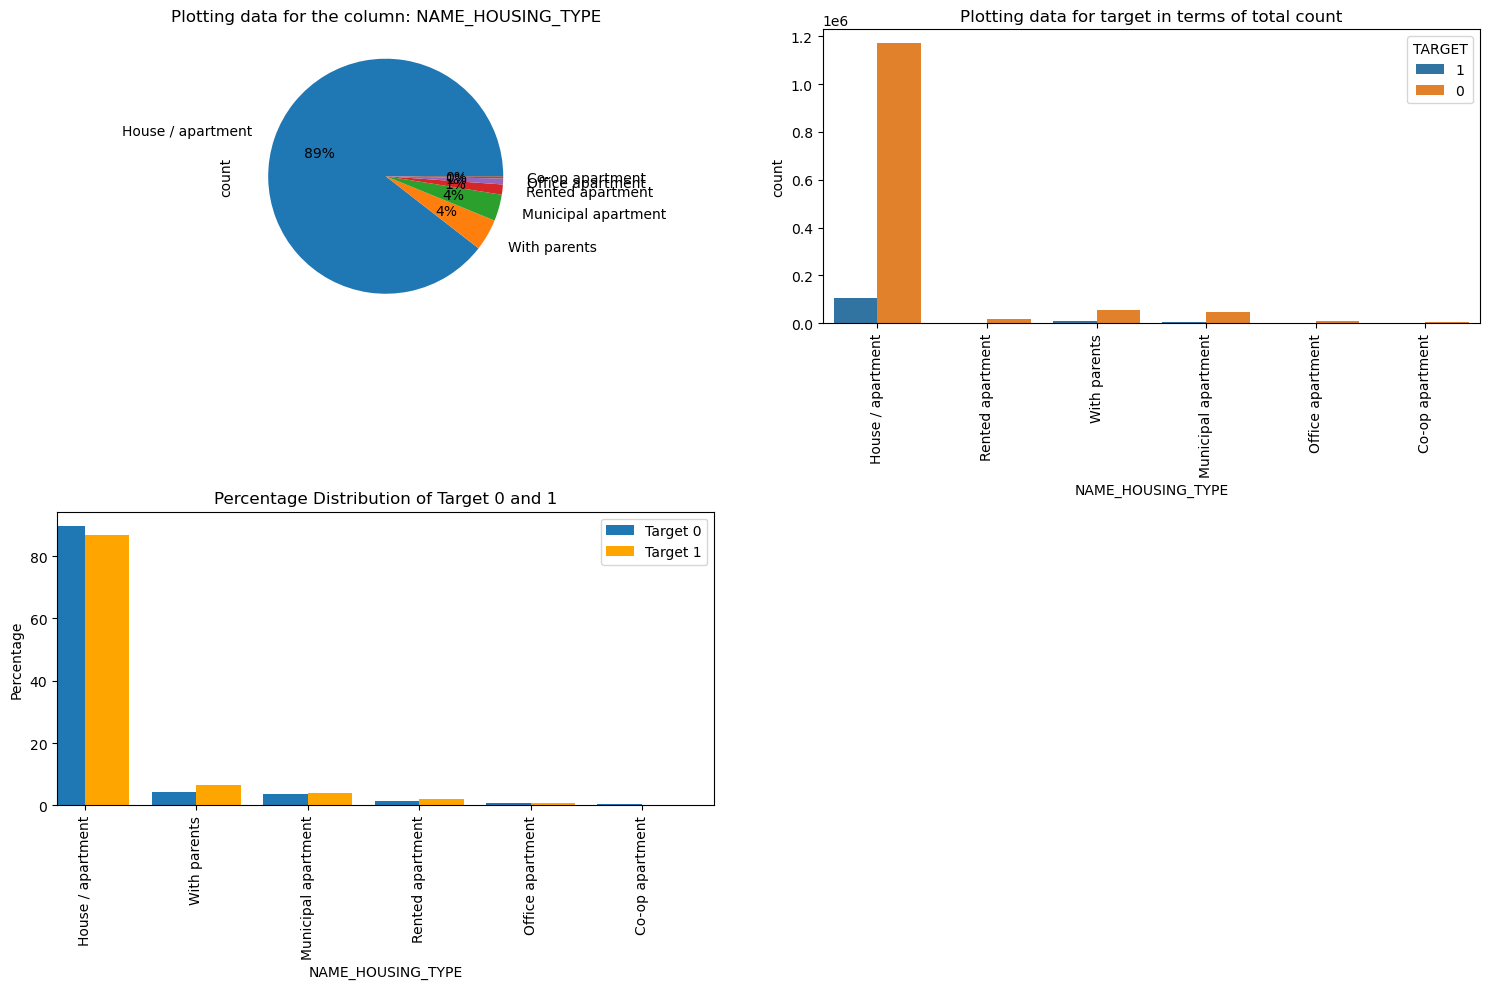

......................
plotting OCCUPATION_TYPE


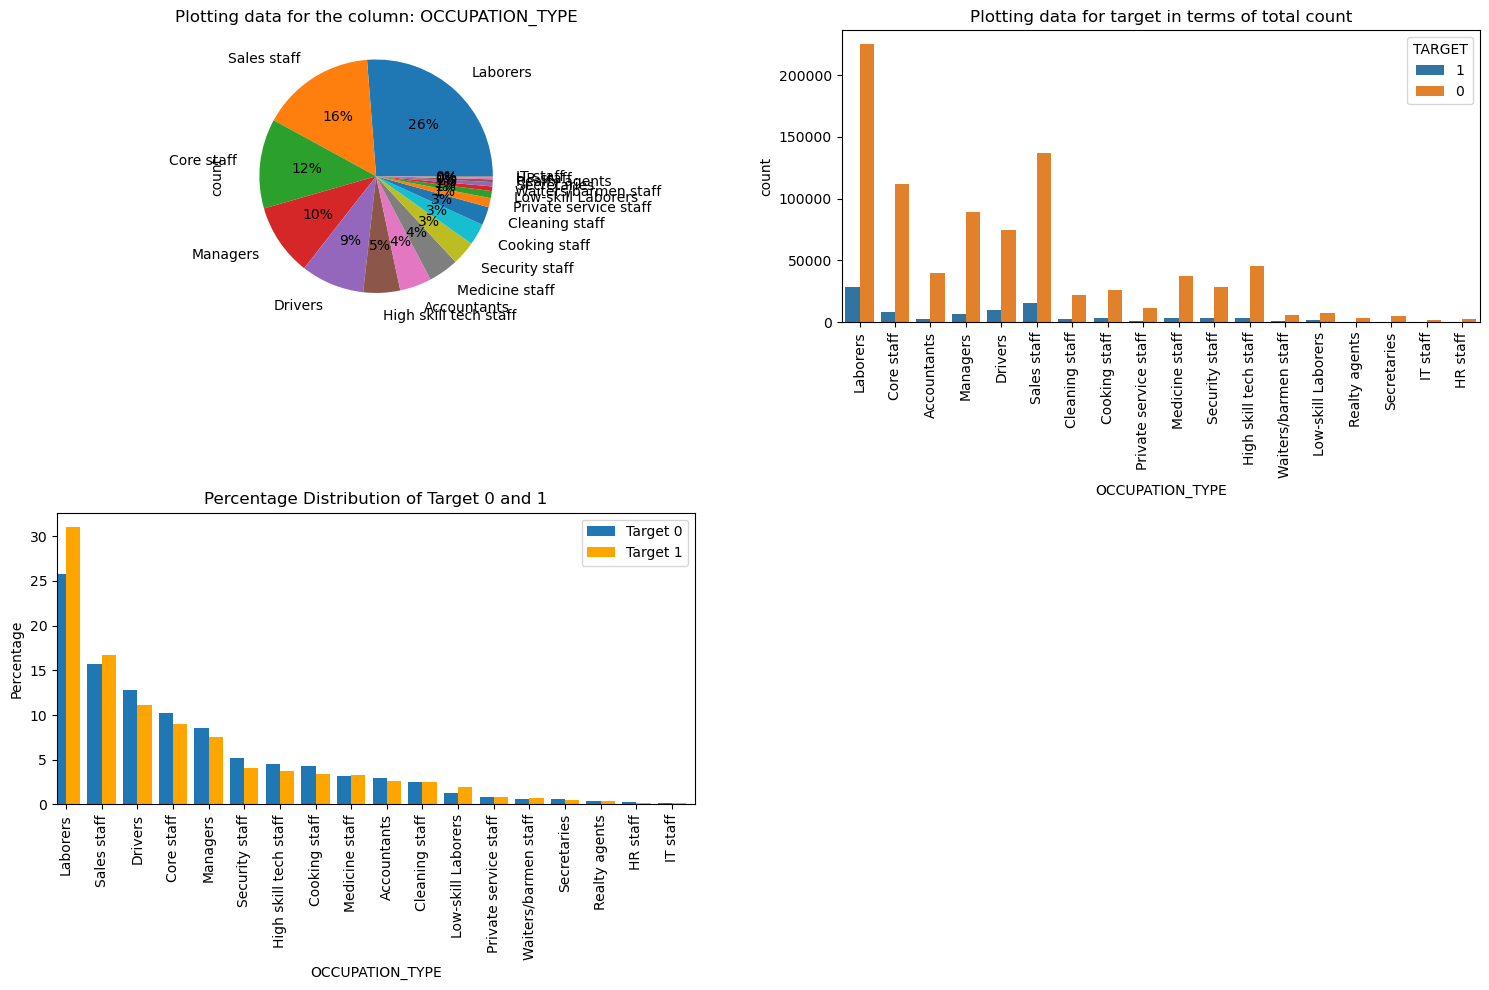

......................
plotting WEEKDAY_APPR_PROCESS_START_x


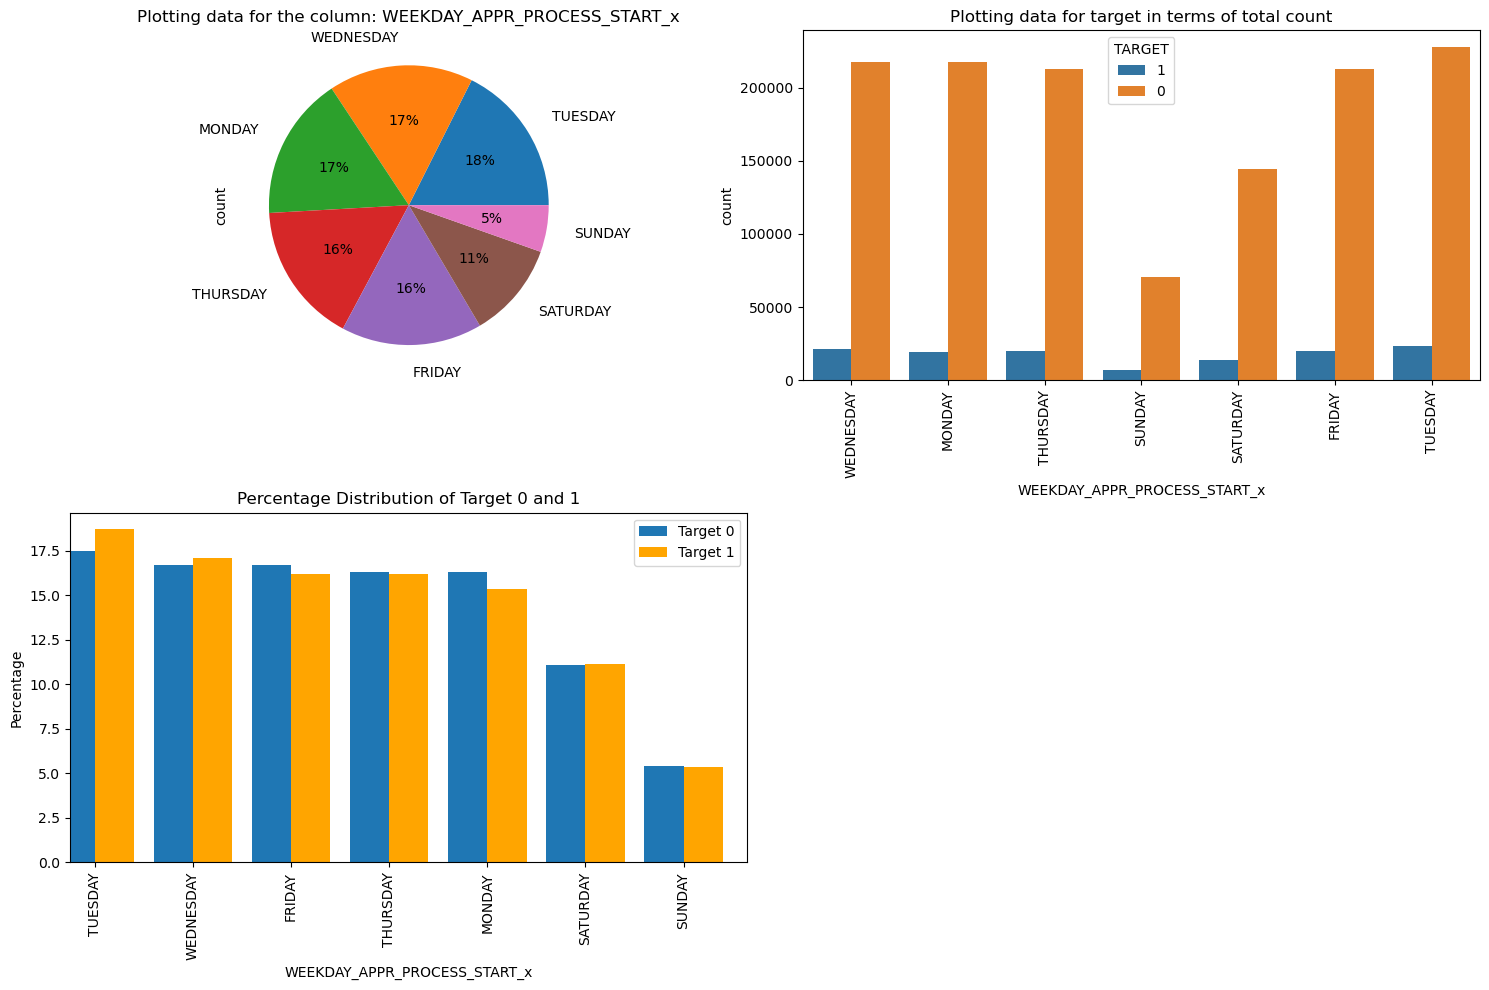

......................
plotting ORGANIZATION_TYPE


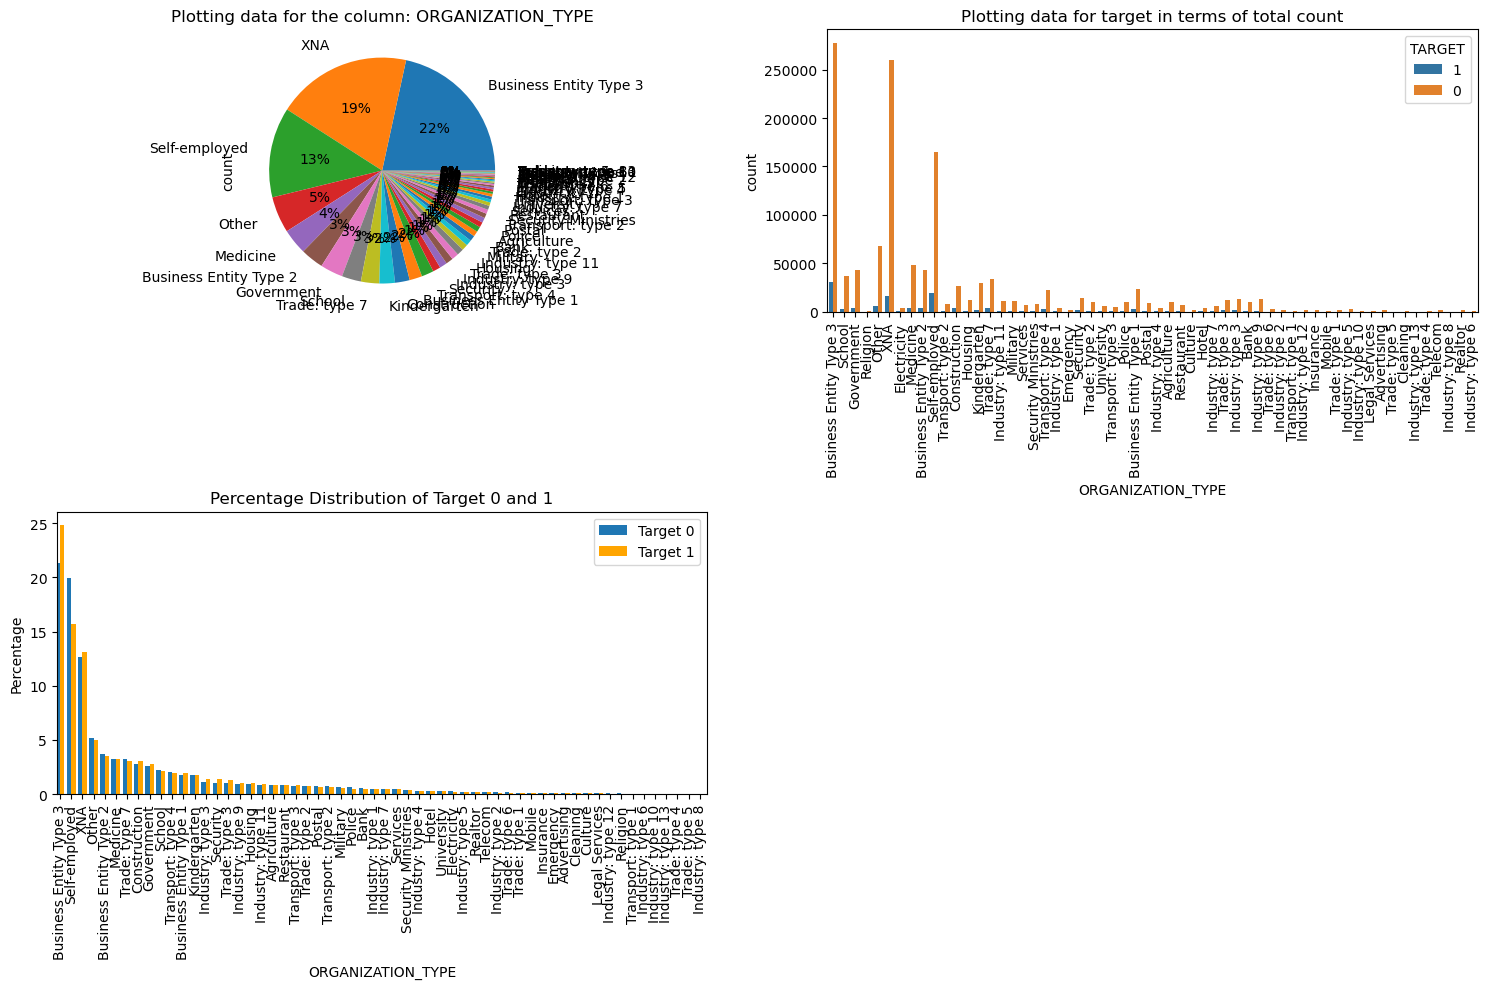

......................
plotting NAME_CONTRACT_TYPE_y


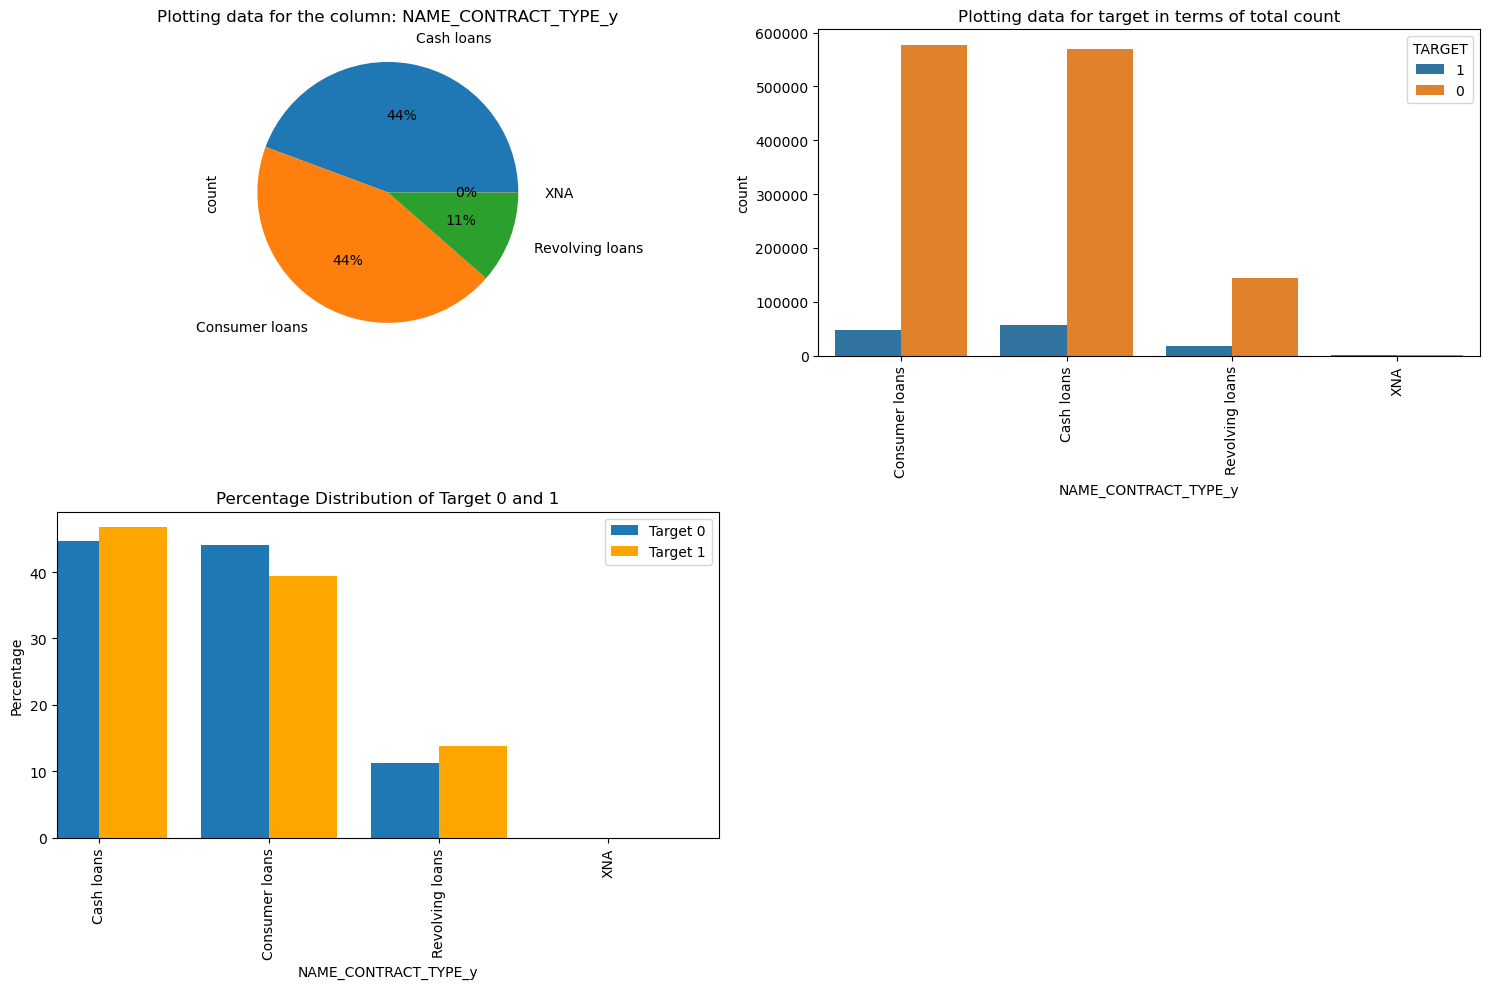

......................
plotting WEEKDAY_APPR_PROCESS_START_y


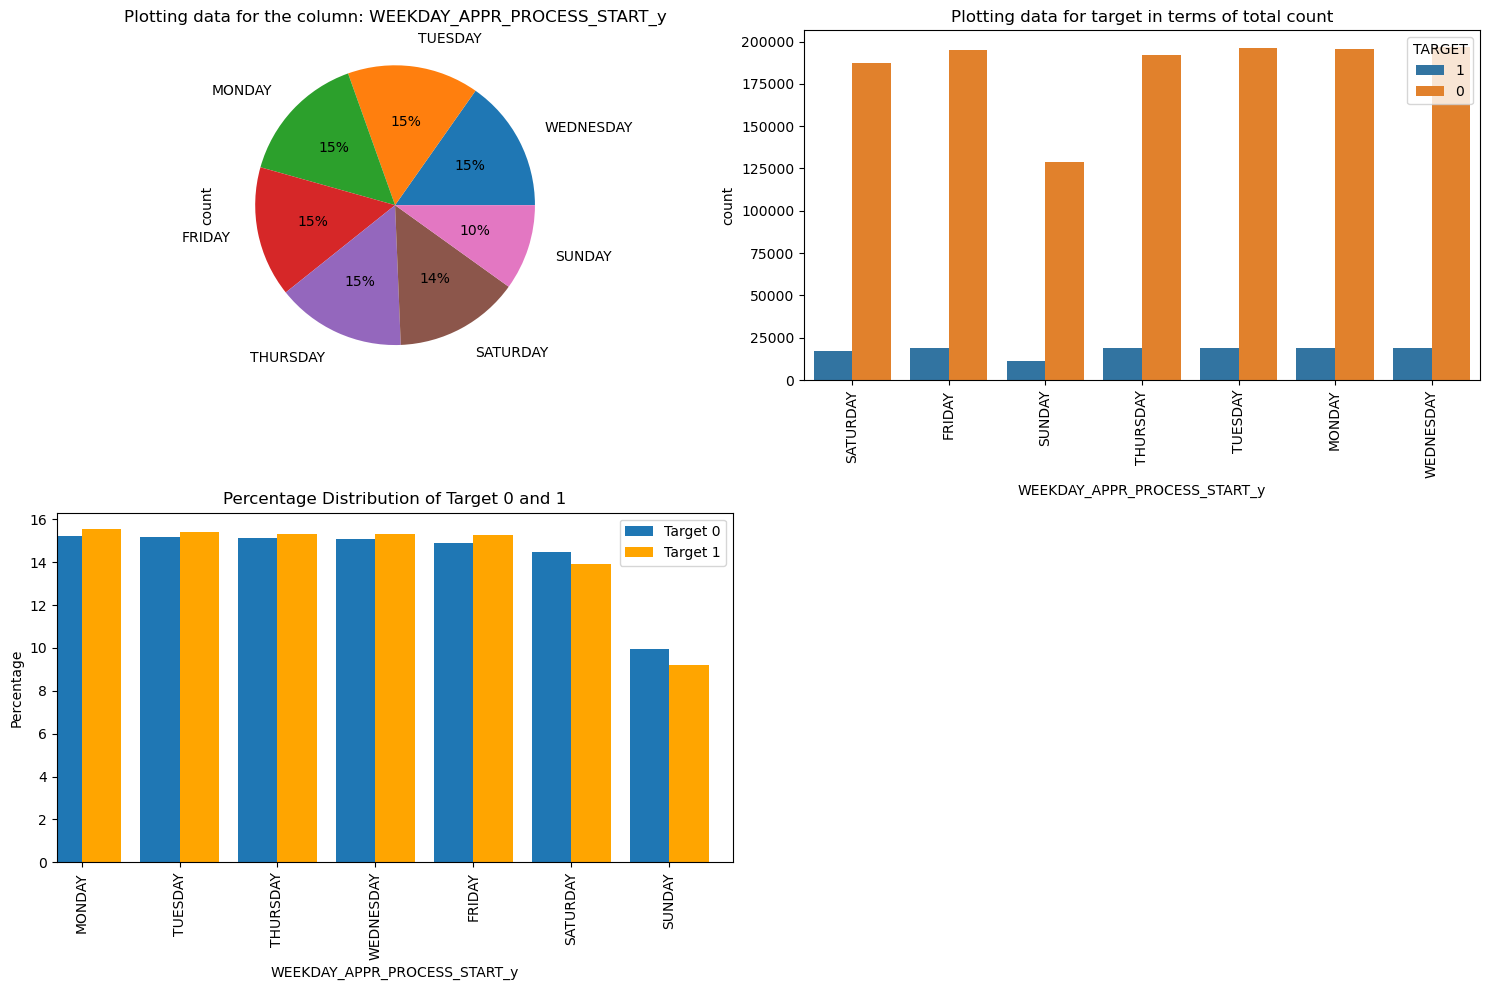

......................
plotting FLAG_LAST_APPL_PER_CONTRACT


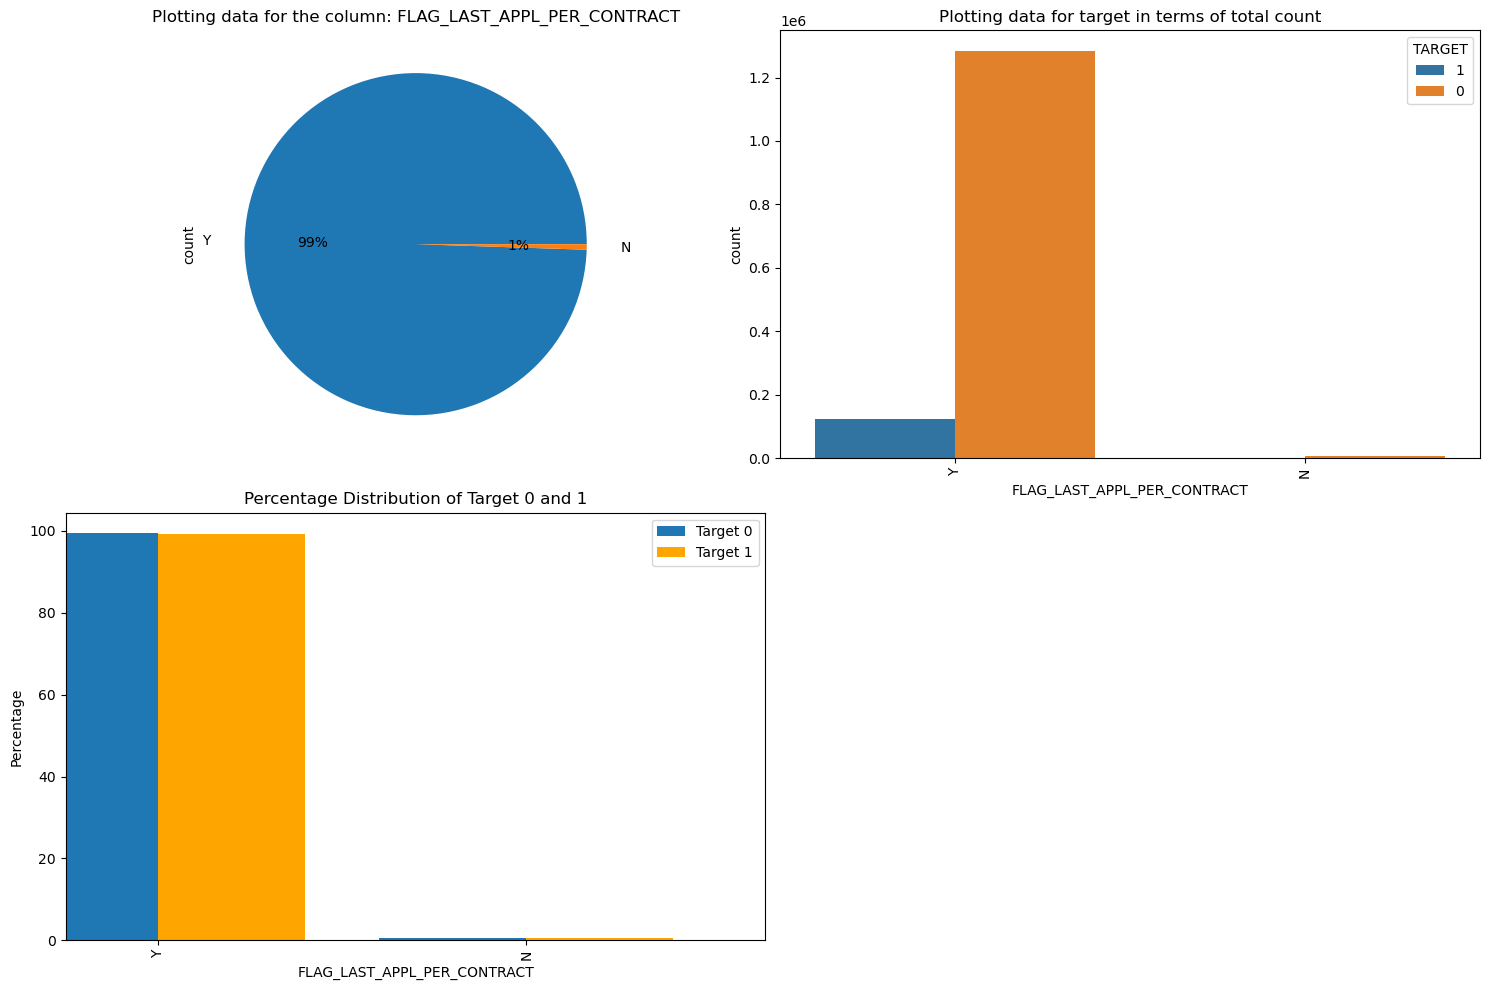

......................
plotting NAME_CASH_LOAN_PURPOSE


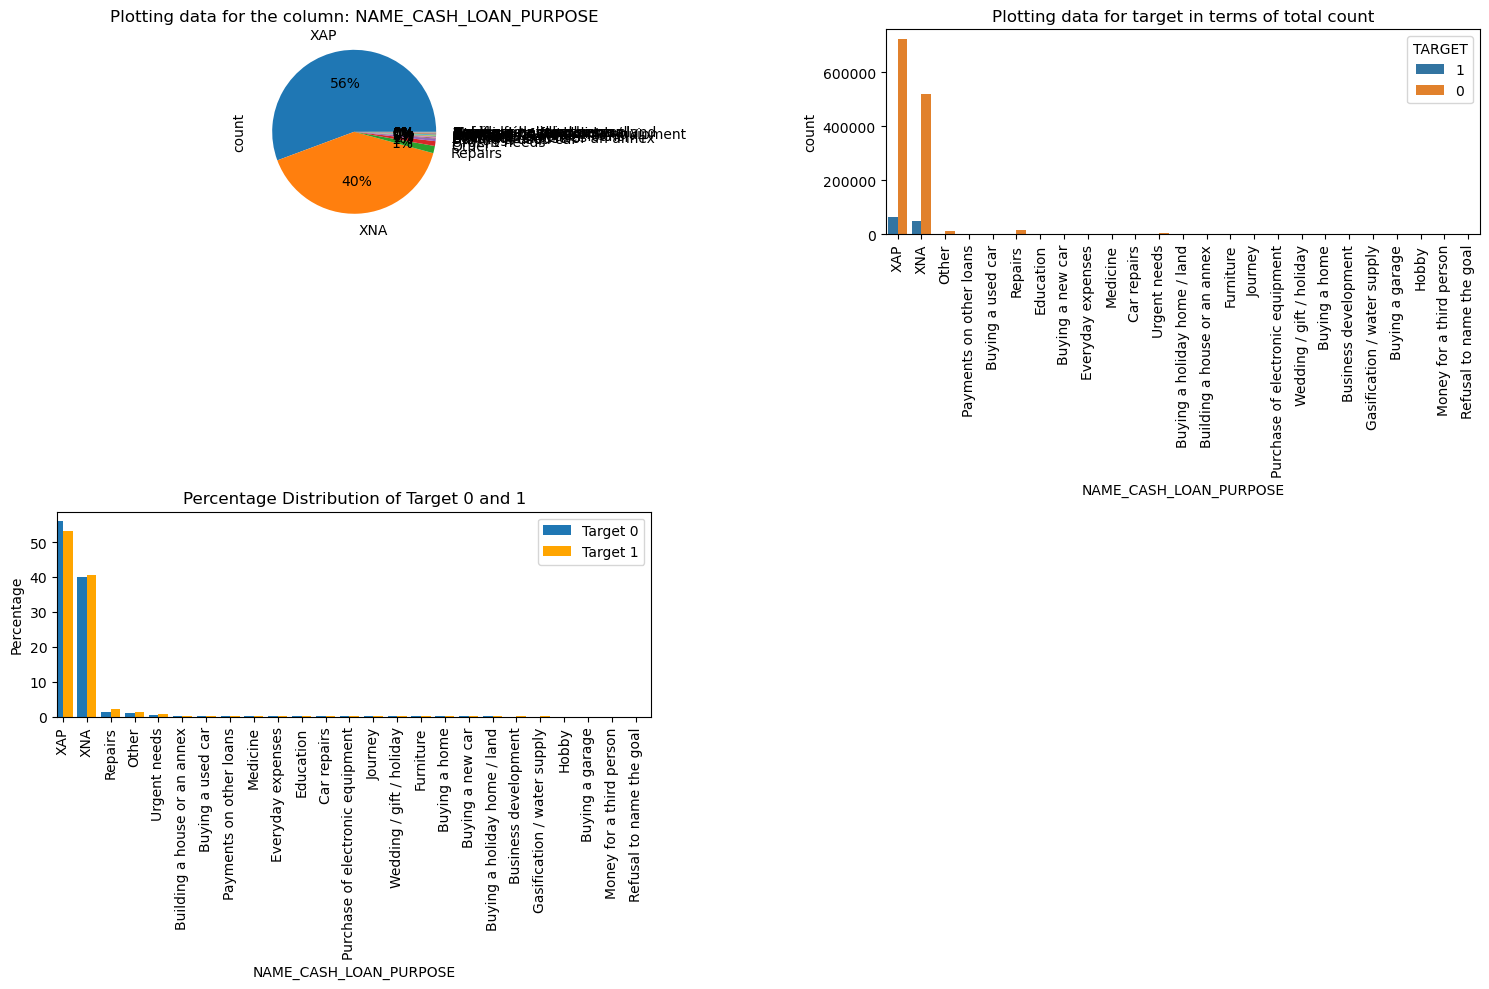

......................
plotting NAME_CONTRACT_STATUS


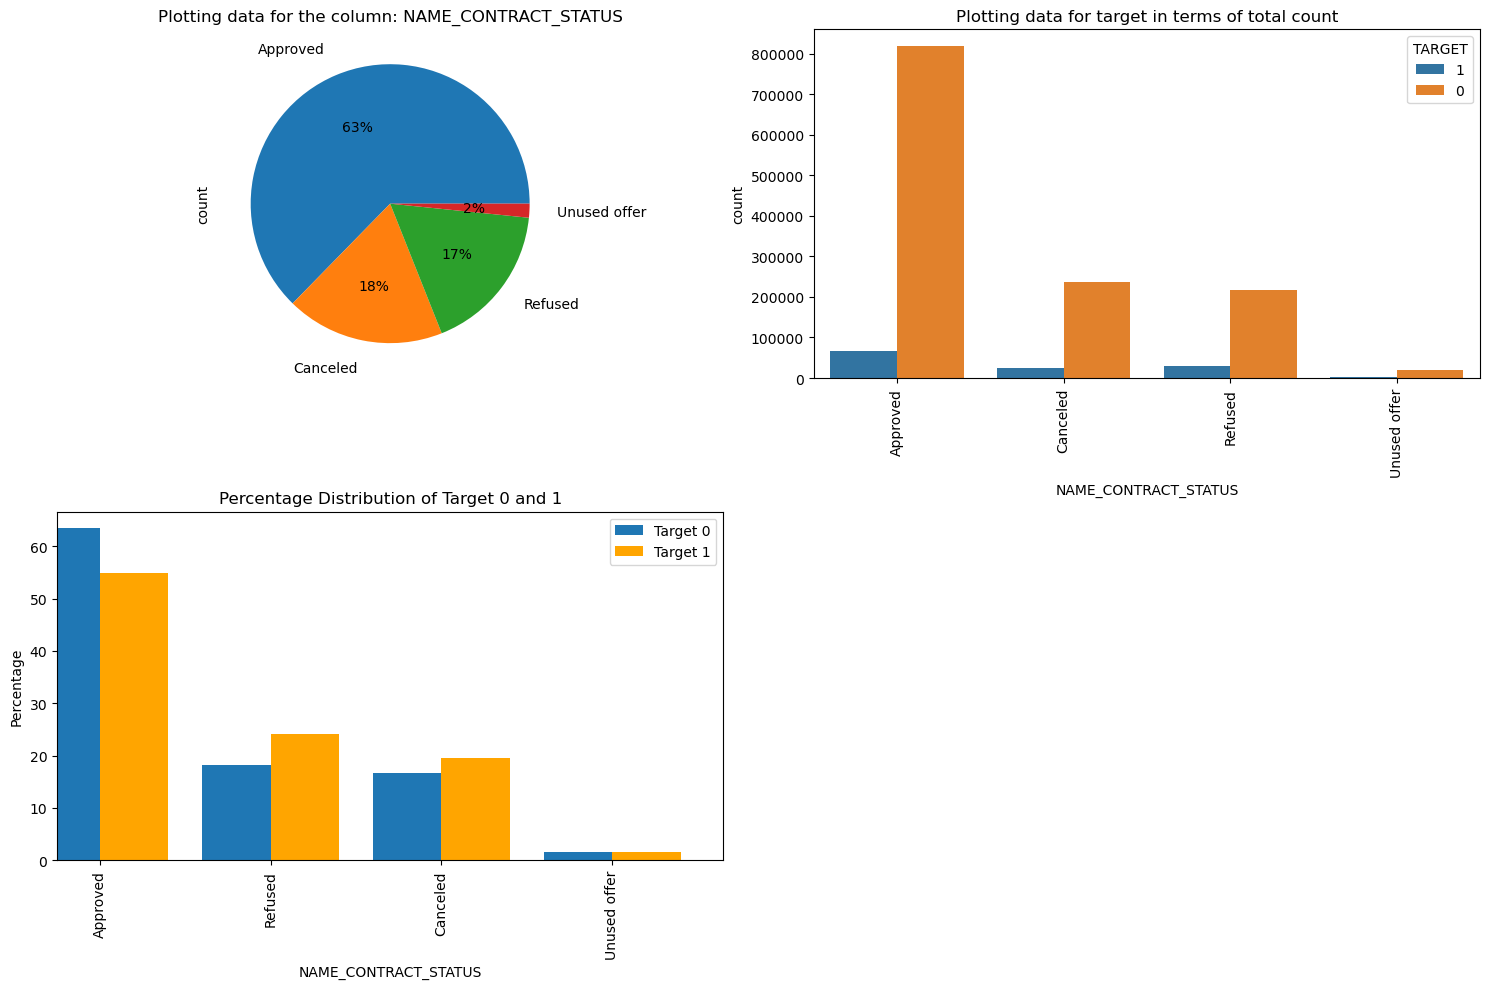

......................
plotting NAME_PAYMENT_TYPE


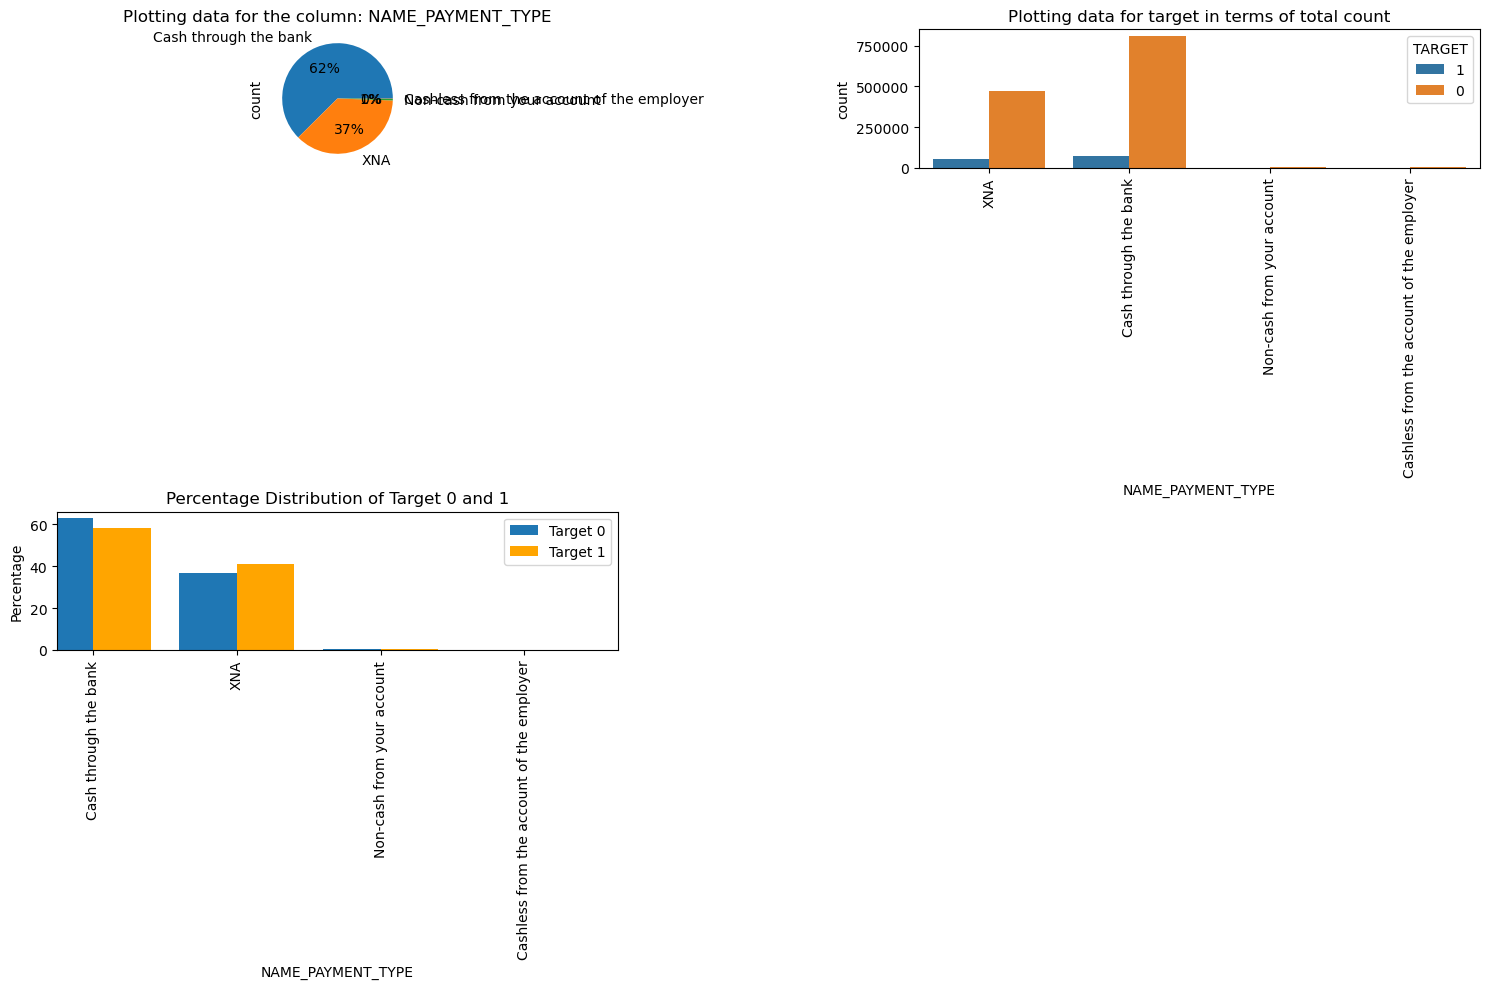

......................
plotting CODE_REJECT_REASON


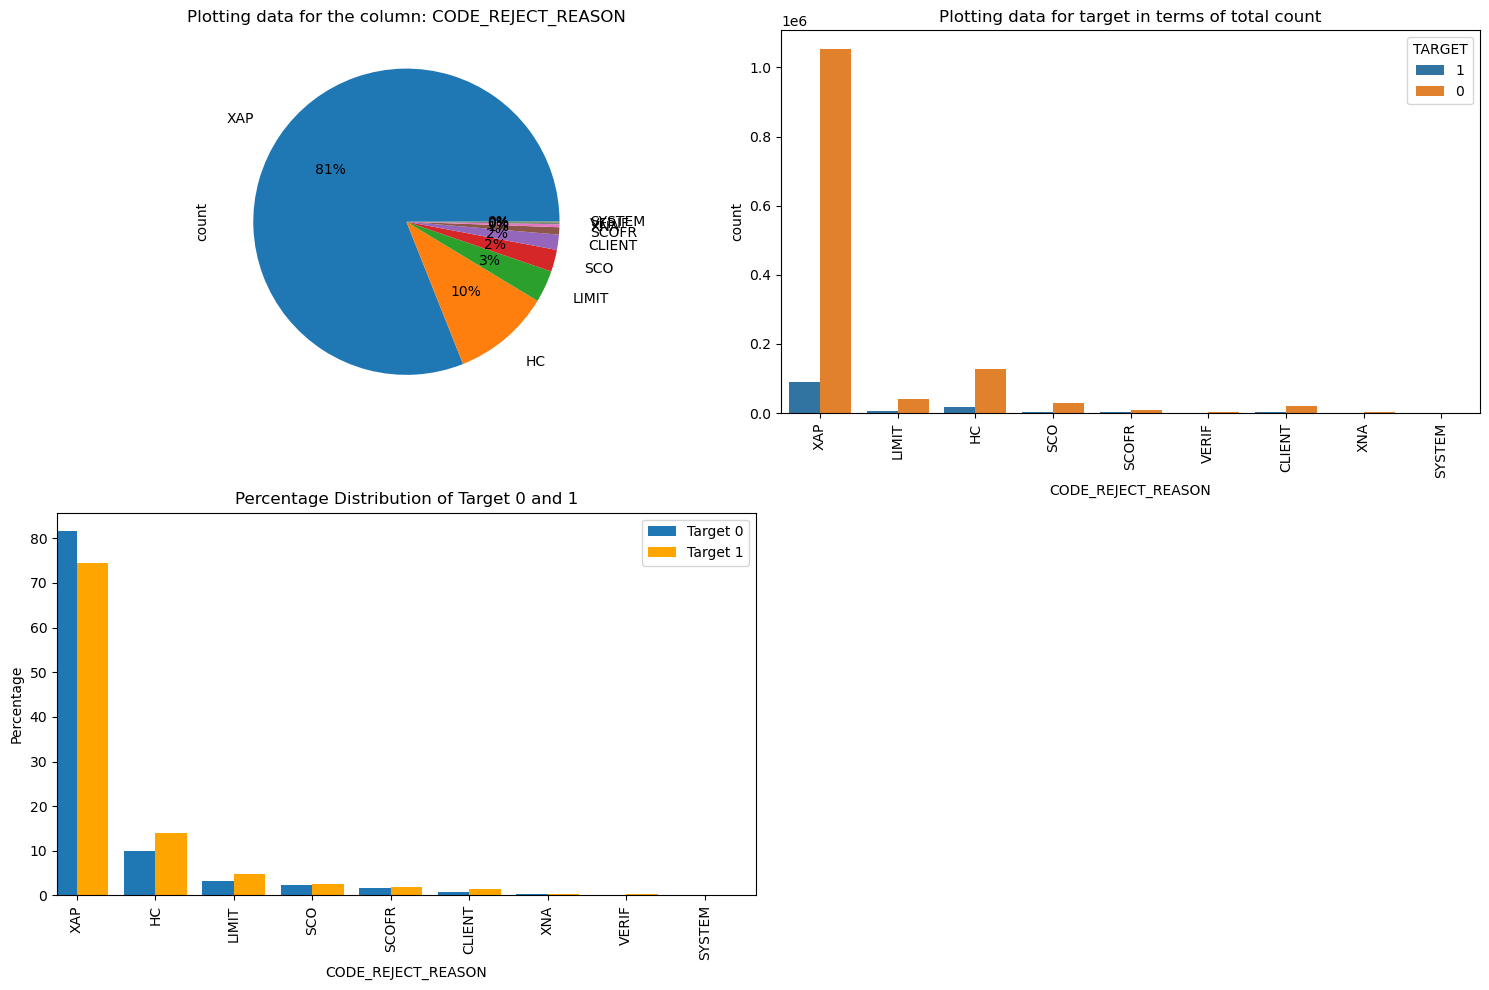

......................
plotting NAME_CLIENT_TYPE


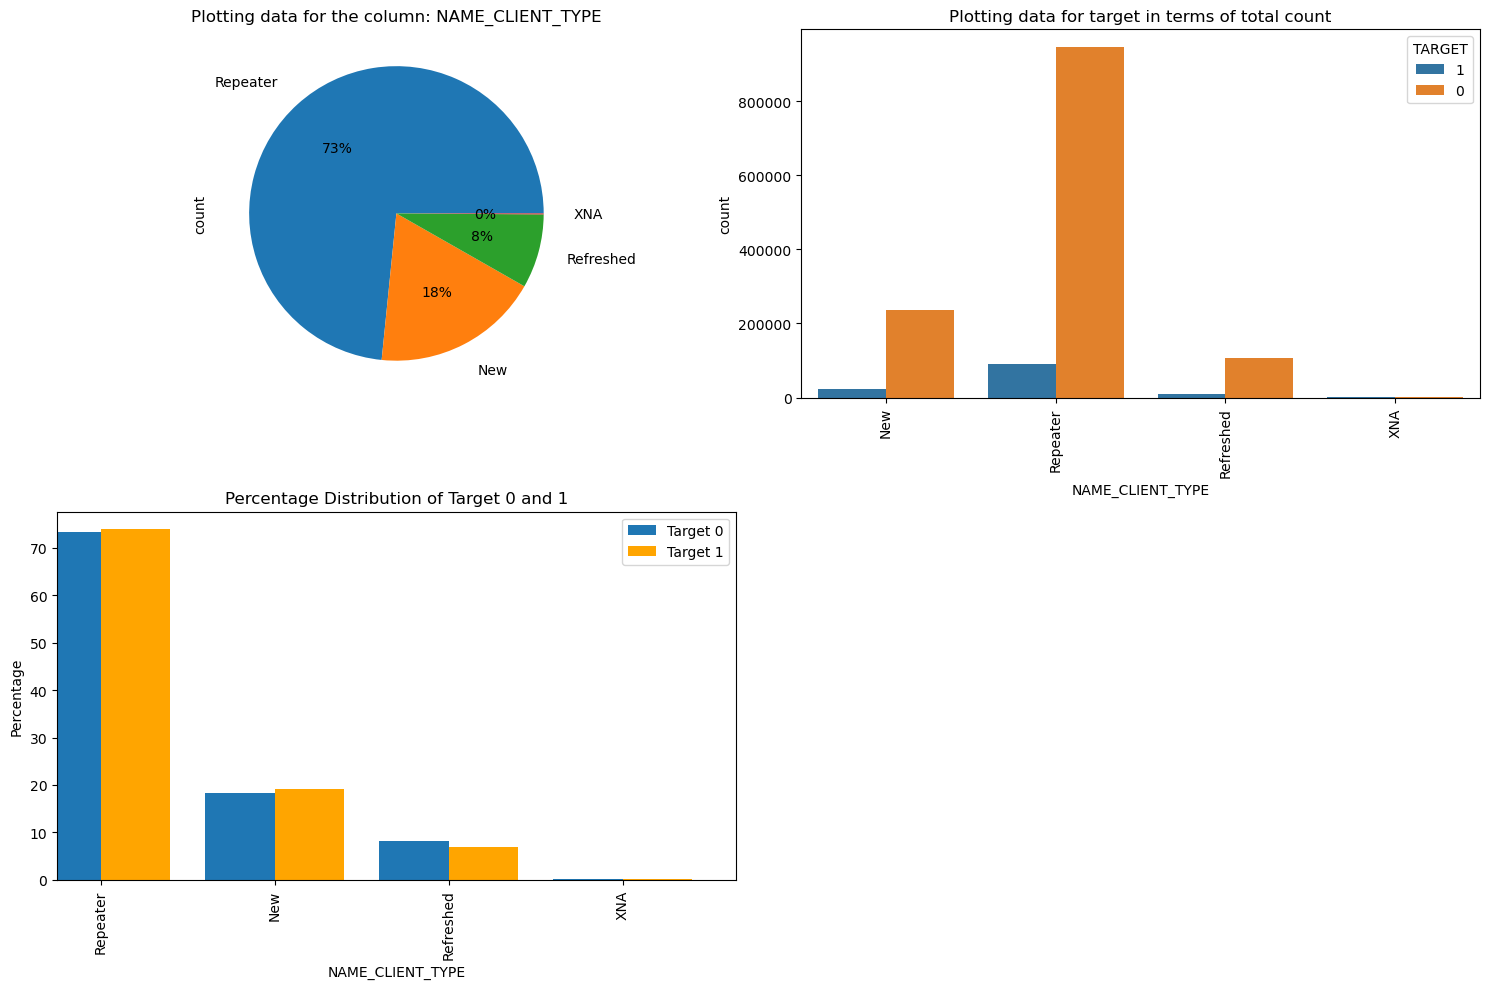

......................
plotting NAME_GOODS_CATEGORY


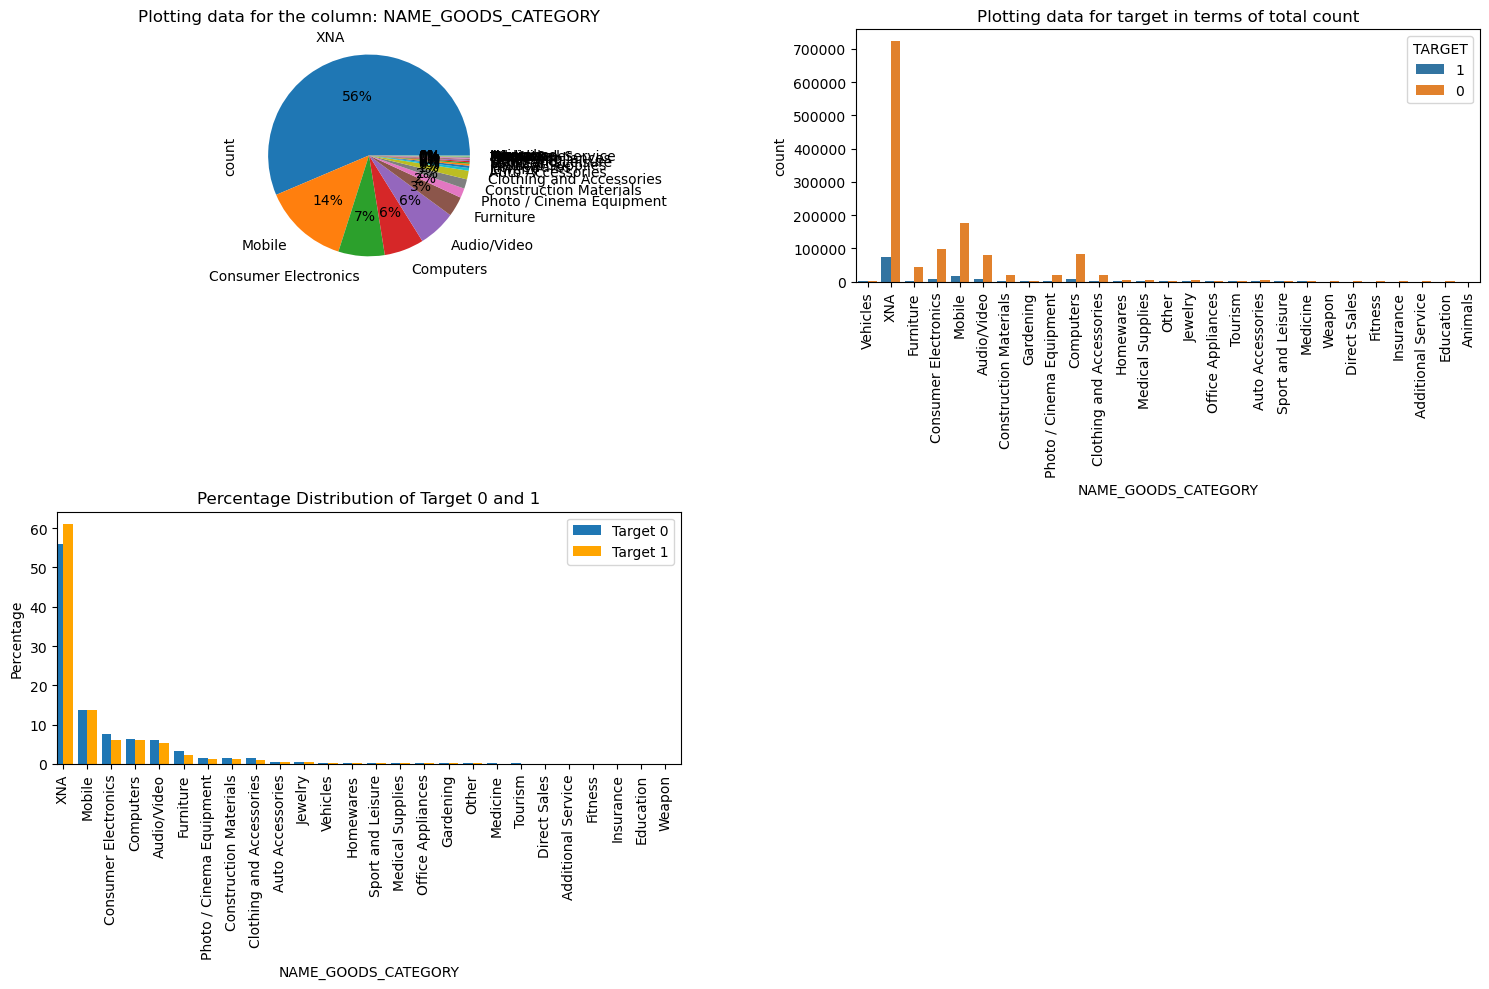

......................
plotting NAME_PORTFOLIO


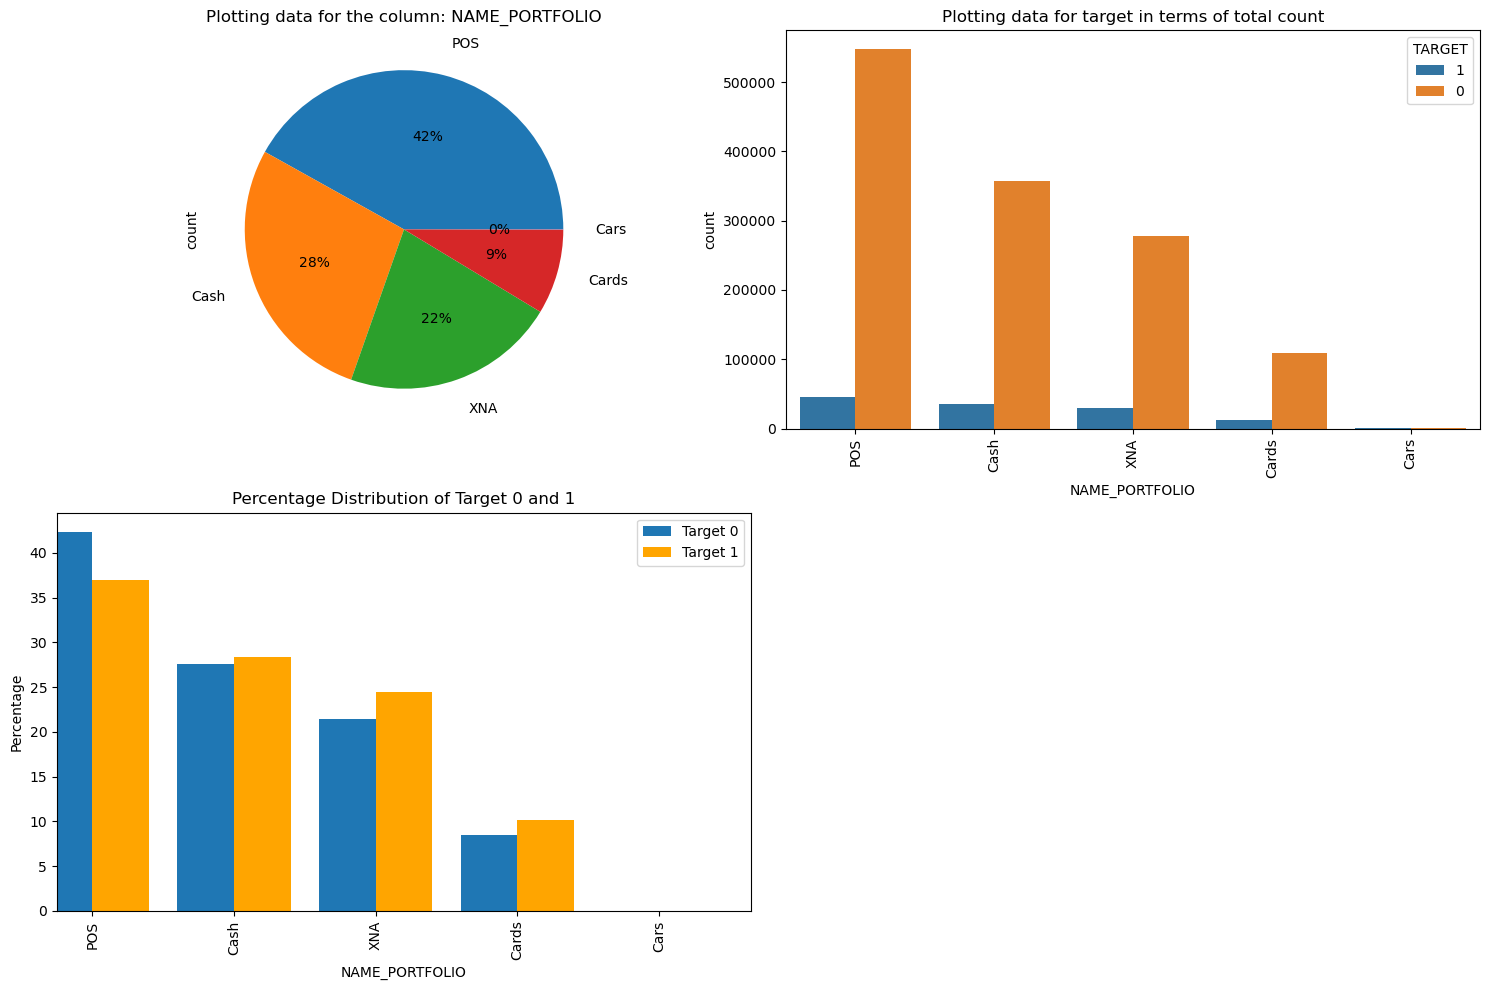

......................
plotting NAME_PRODUCT_TYPE


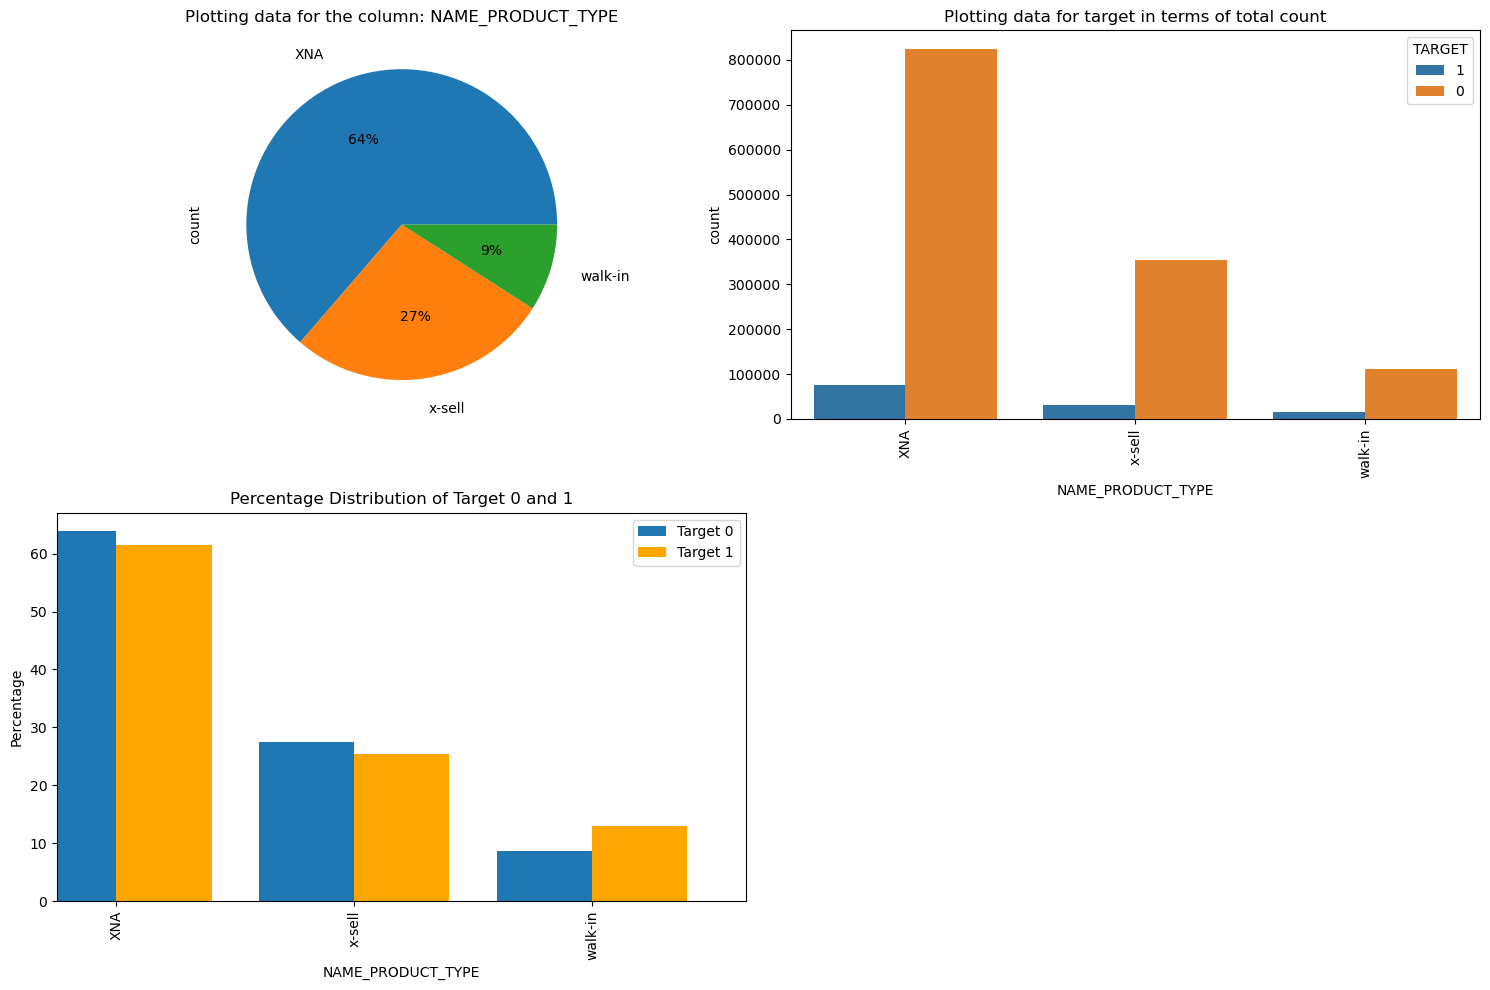

......................
plotting CHANNEL_TYPE


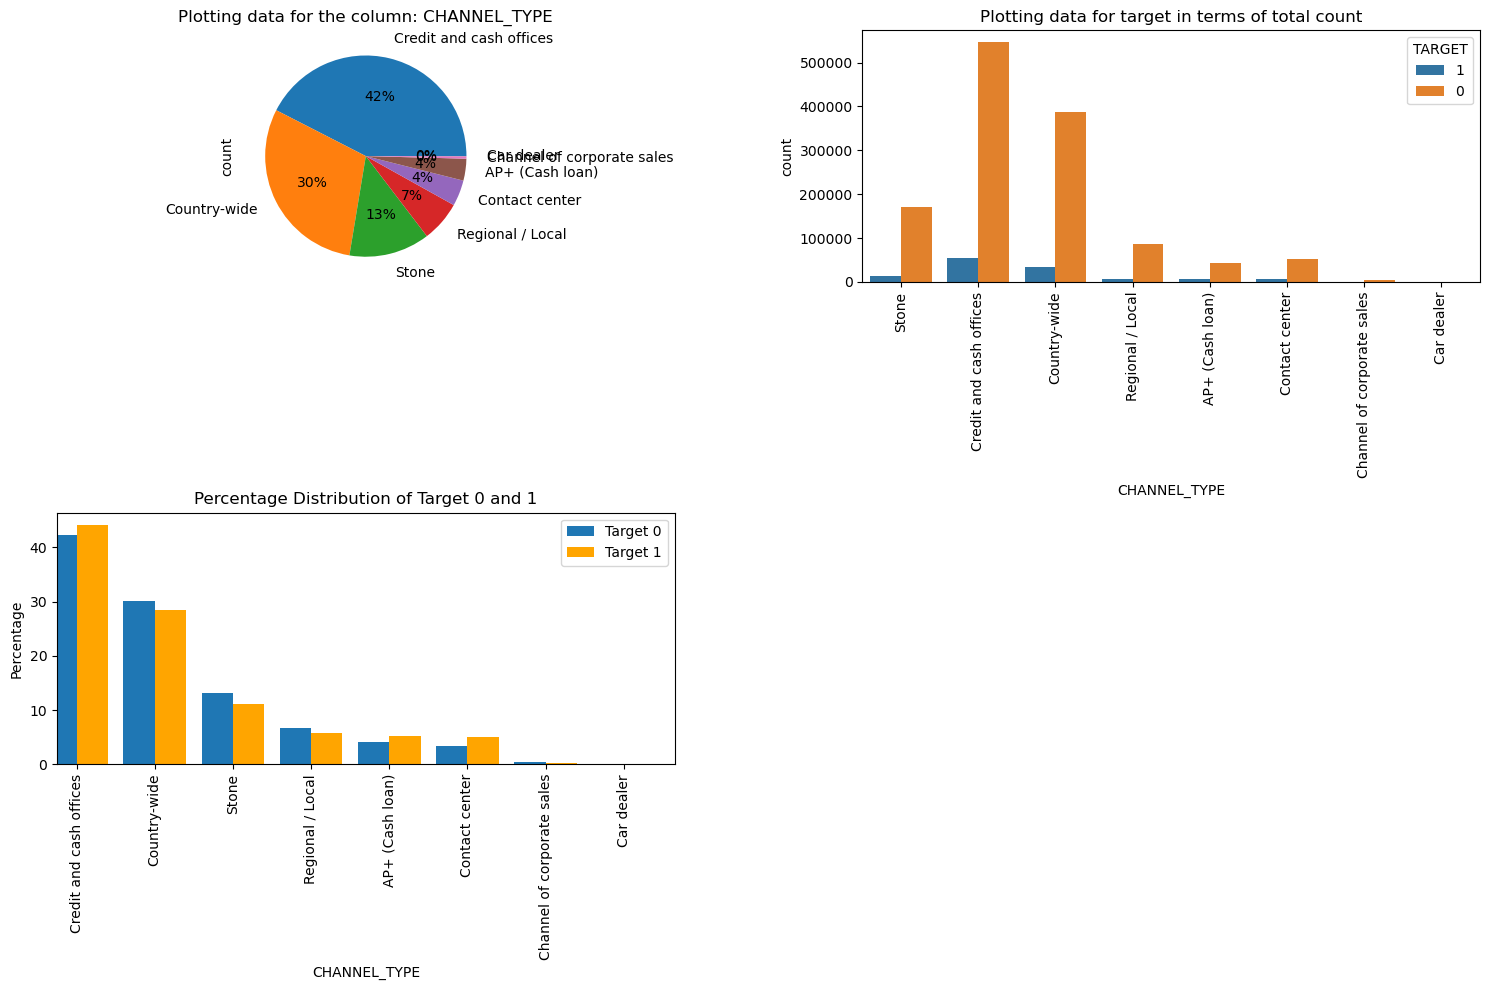

......................
plotting NAME_SELLER_INDUSTRY


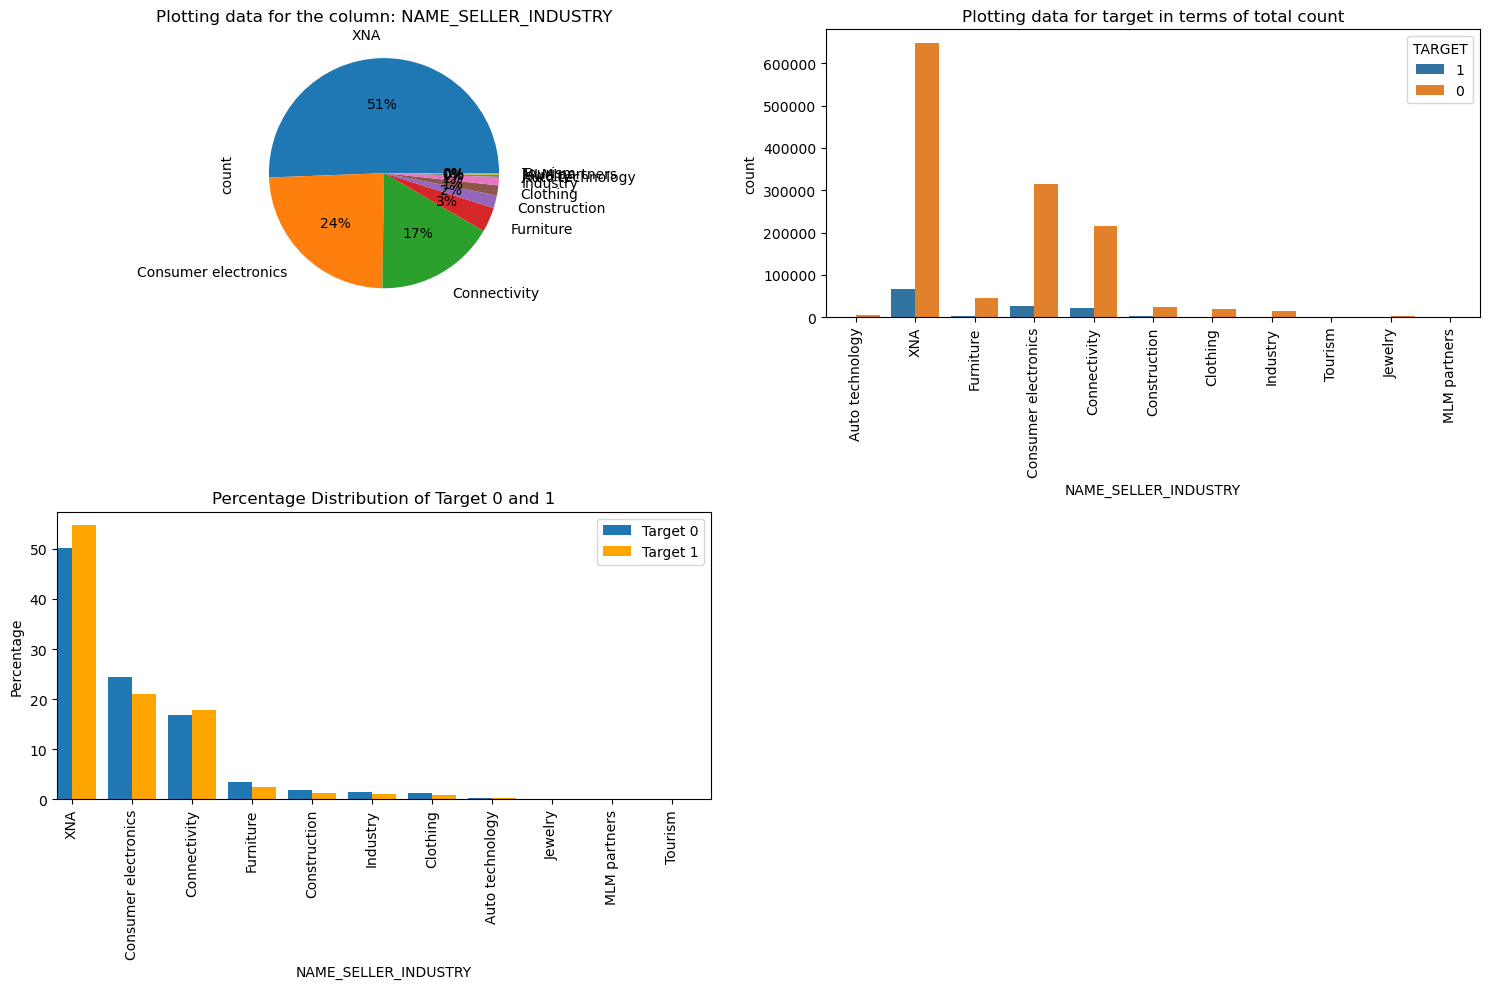

......................
plotting NAME_YIELD_GROUP


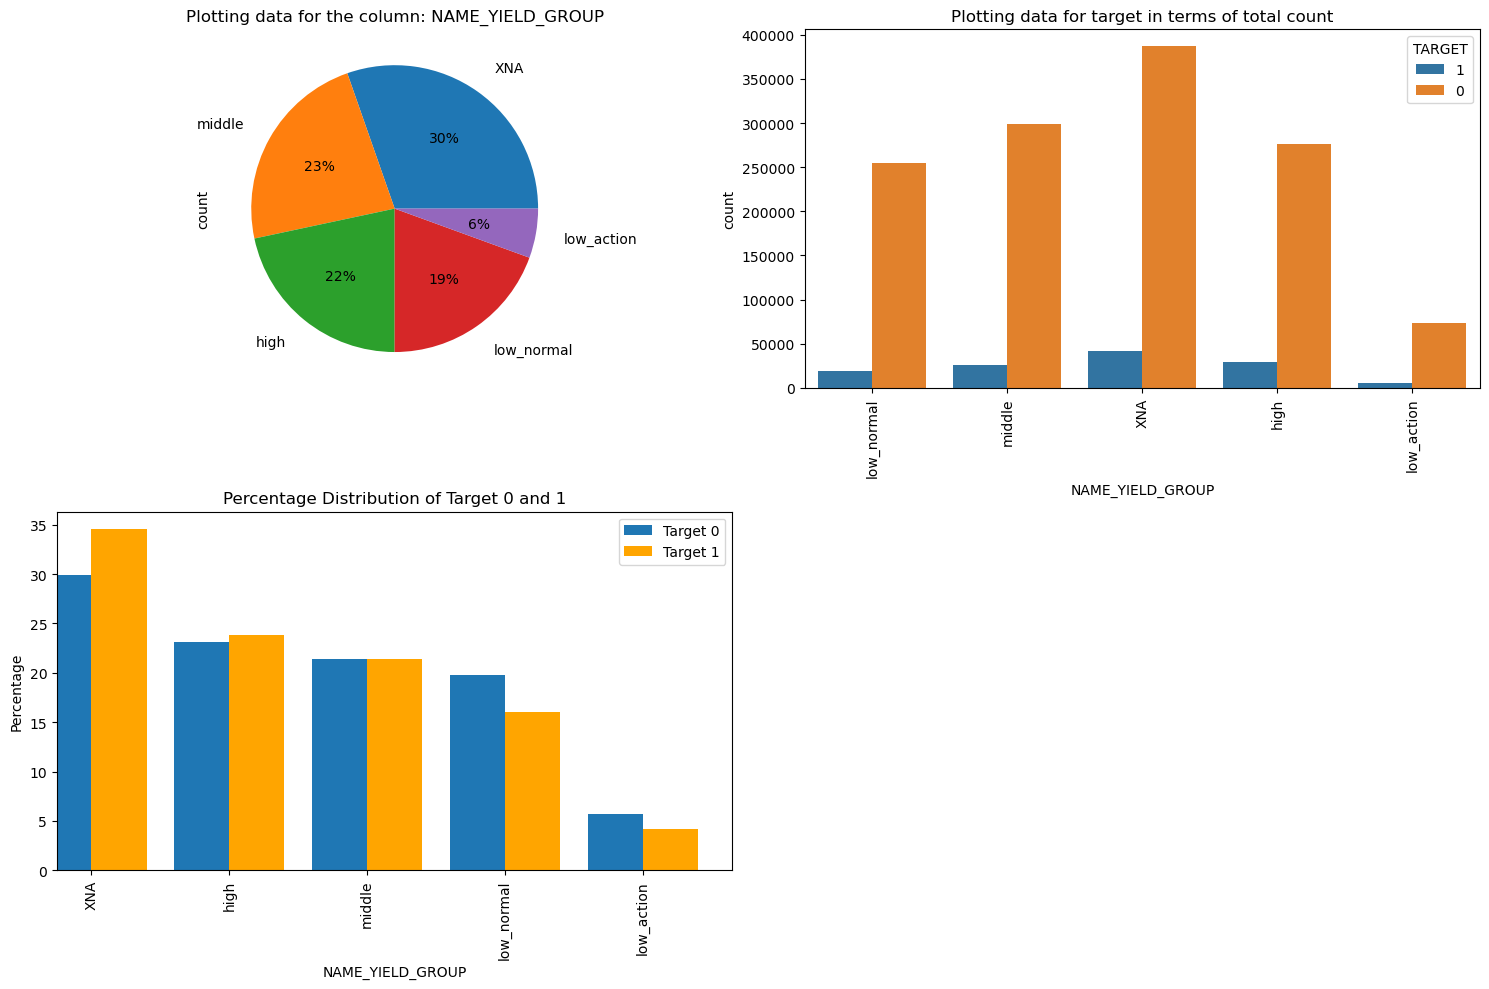

......................
plotting PRODUCT_COMBINATION


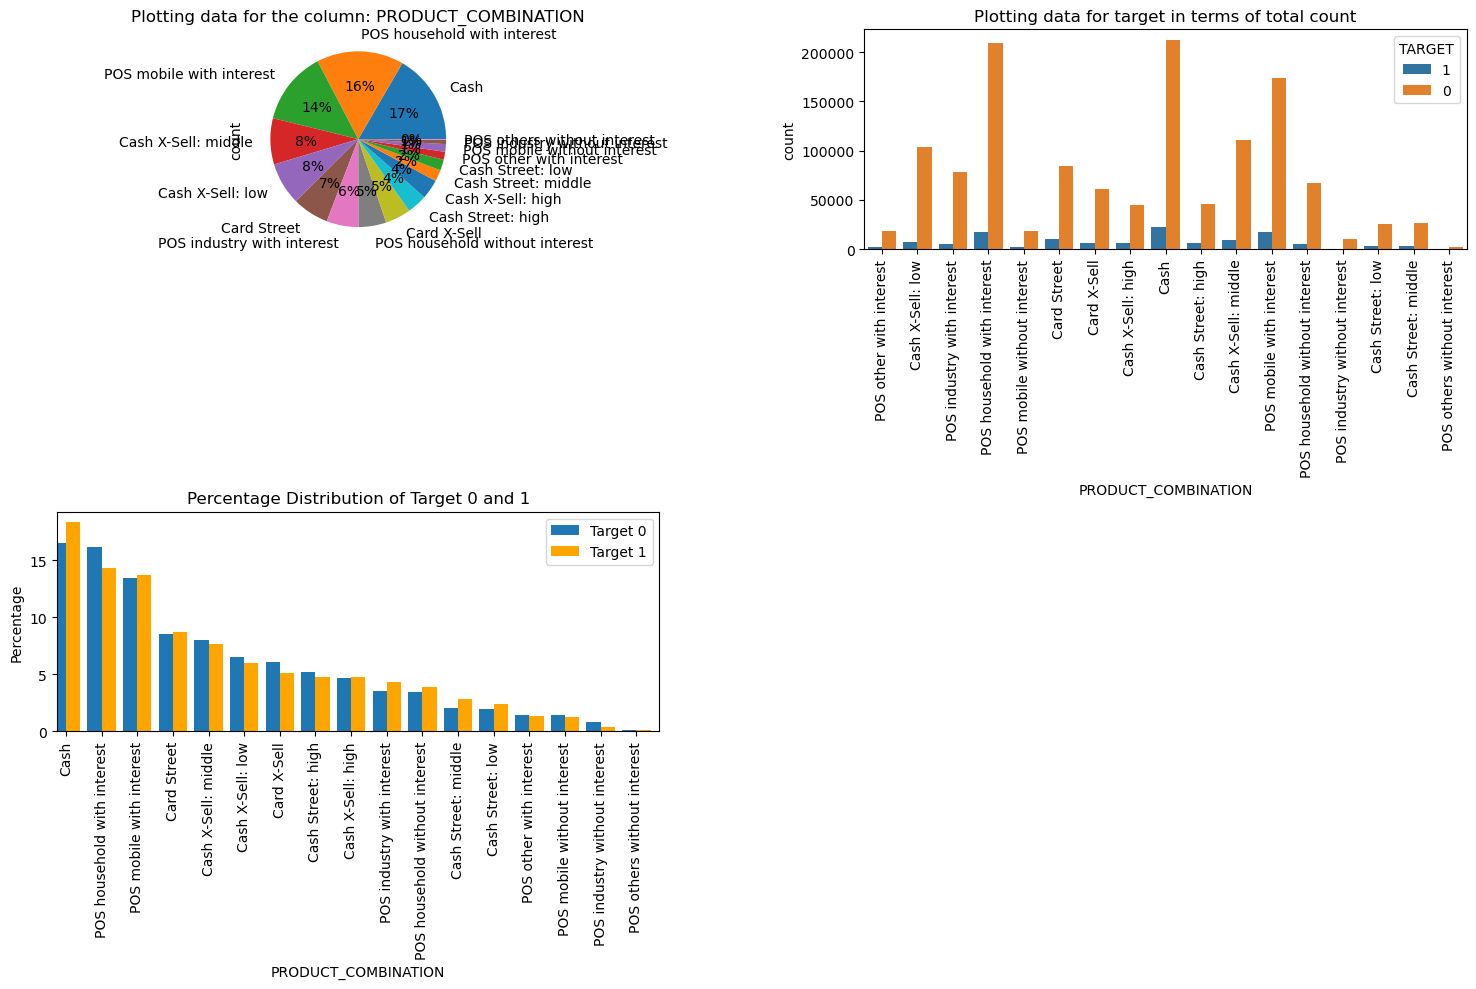

......................


In [73]:
for column in cleaned_categorical:
    print('plotting', column )
    plotting(cleaned_data, ontime_data, not_ontime_data, column)
    print('......................')

# The analysis identifies several key variables that significantly influence loan behavior and default rates:
CODE_GENDER:
Although loans are less frequently taken by males, the data indicates that the proportion of male defaulters is notably higher compared to females. 
This suggests gender as a potential factor in assessing loan risk. 

NAME_INCOME_TYPE:
Pensioners show a lower default rate, implying that despite a potentially fixed or lower income, they maintain a higher reliability in repaying loans. 

NAME_EDUCATION_TYPE:
Loans are predominantly sought for secondary education, followed by higher education.
However, the default rate among borrowers with secondary education is substantially higher than those with higher education credentials. 
This points to education level as a significant determinant of loan repayment capacity. 

NAME_FAMILY_STATUS:
Married individuals are the most common applicants for loans and tend to have lower default rates. In contrast, singles and those in civil
marriages exhibit higher default rates, highlighting the influence of marital status on loan repayment behavior.

OCCUPATION_TYPE:
Laborers and various staff categories are the most frequent loan applicants, yet managers and high-skilled tech staff prove to be the most reliable in terms of repayment. This underscores the role of occupation type in predicting loan default risk.ot:

### Checking for the outliers in the numerical data

In [75]:
outlier_data = cleaned_data.select_dtypes(include=['int64', 'float64'] ).columns

In [79]:
outlier_data

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
   

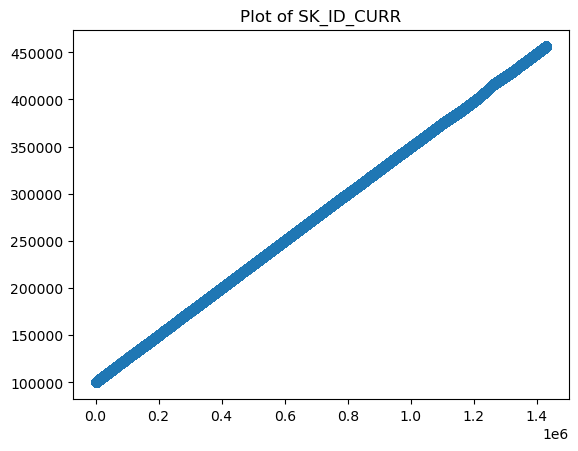

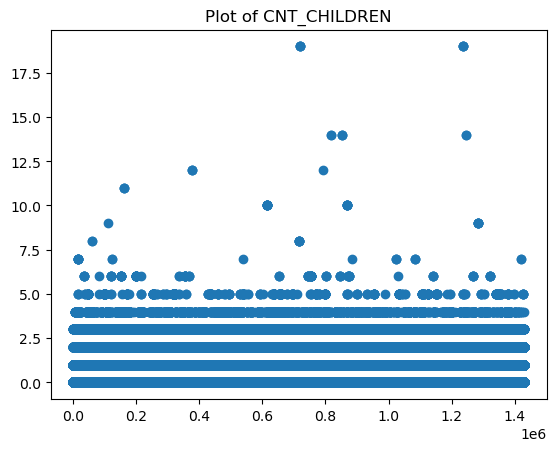

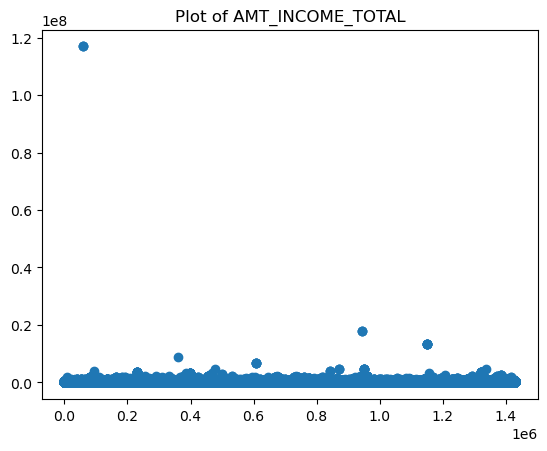

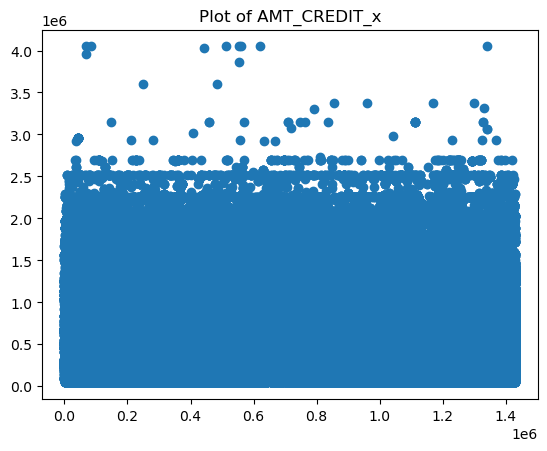

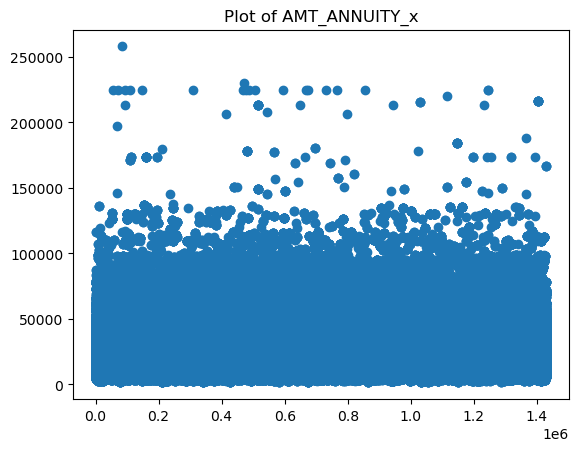

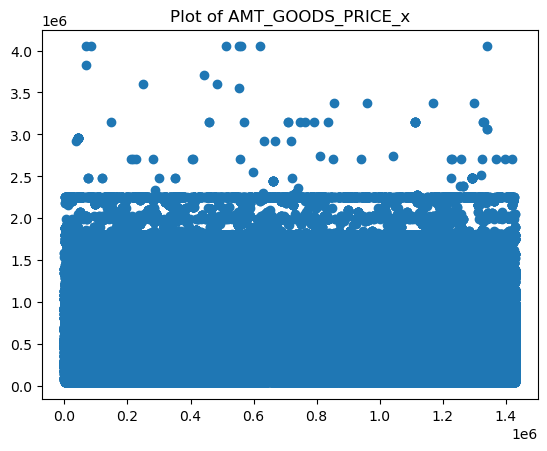

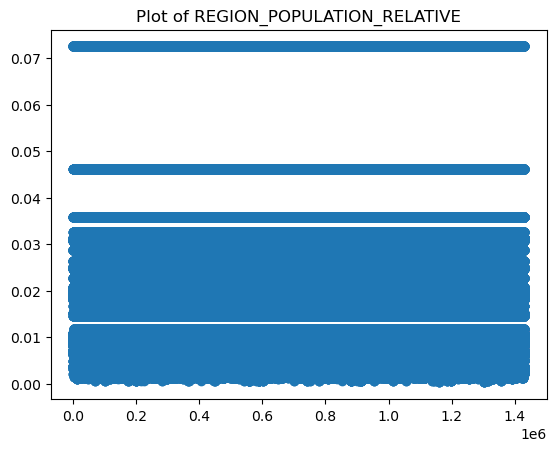

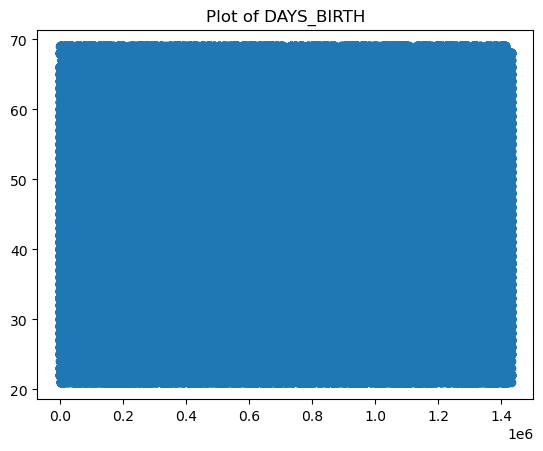

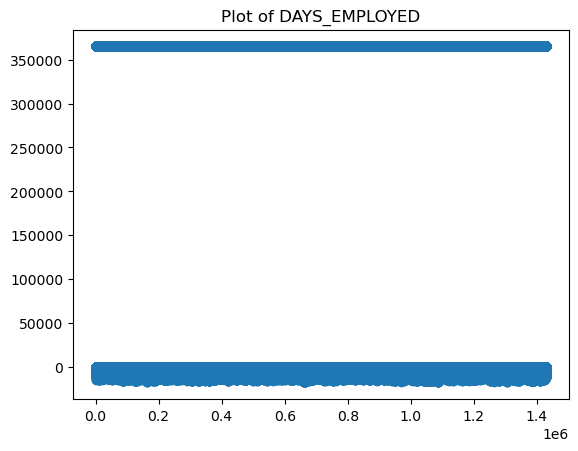

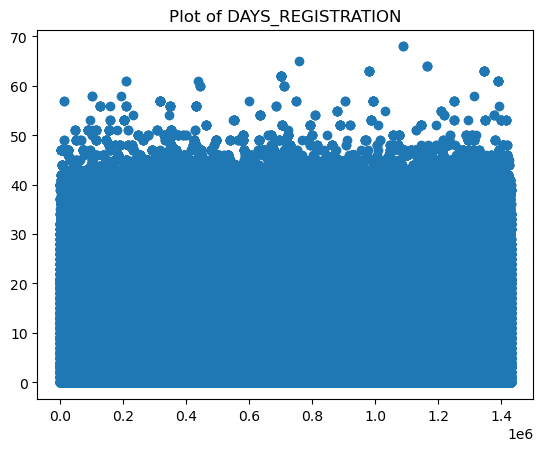

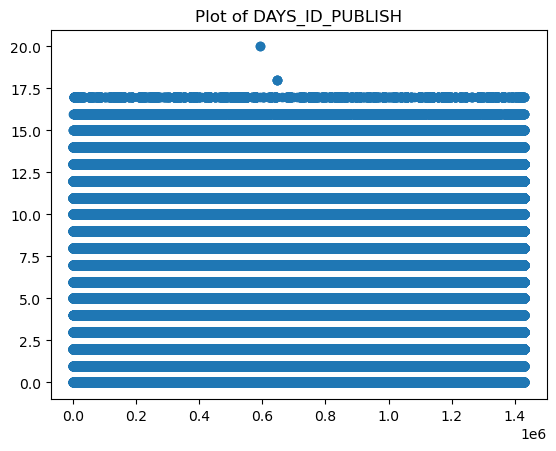

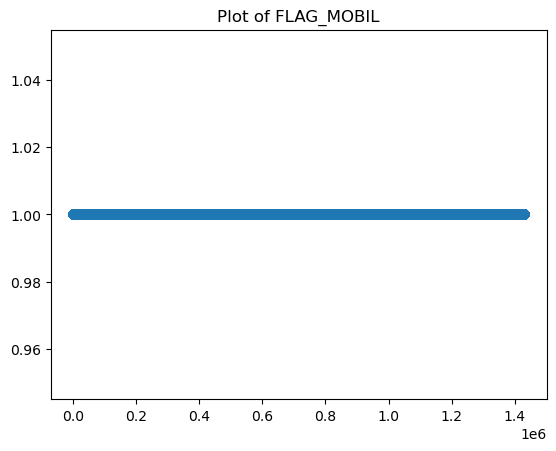

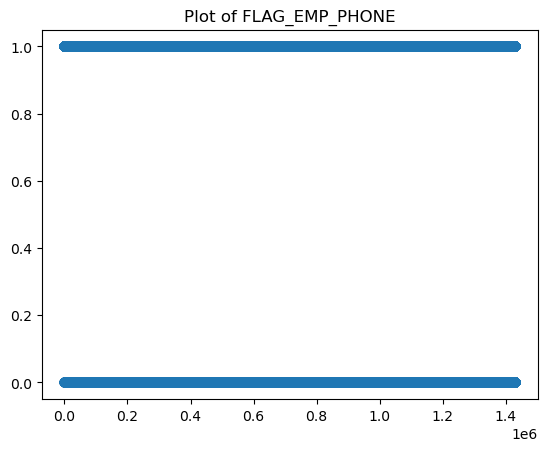

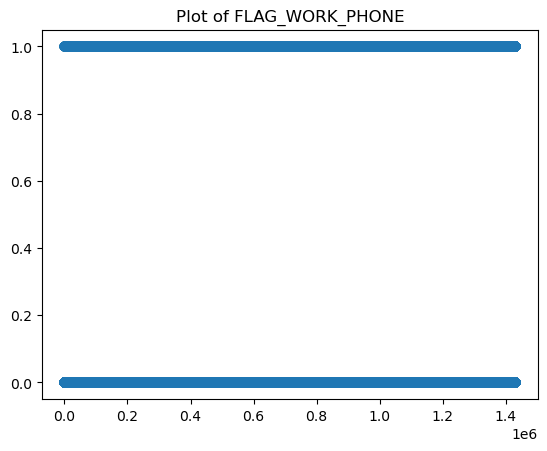

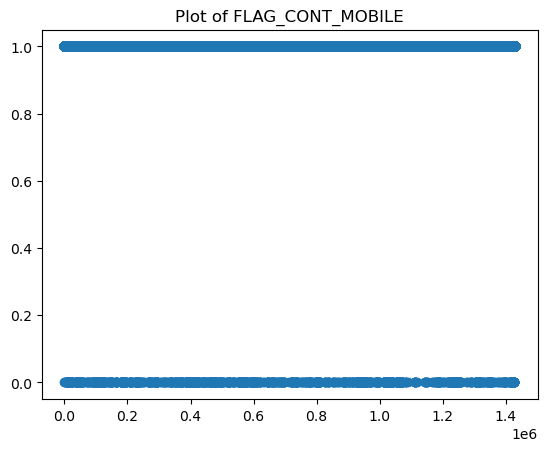

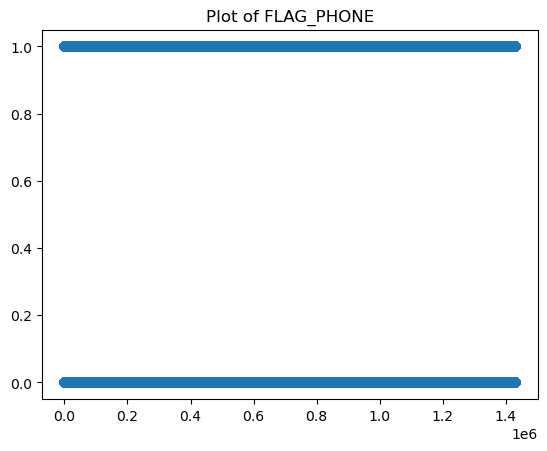

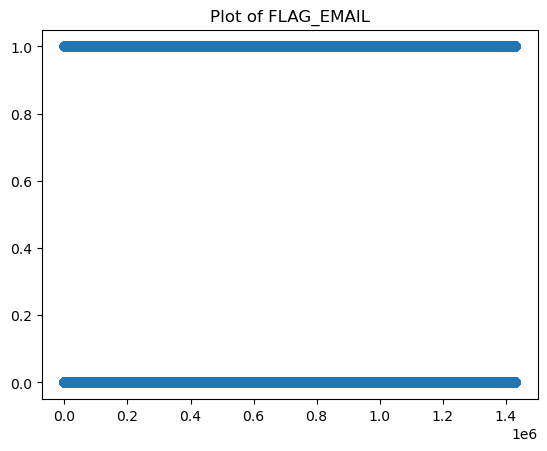

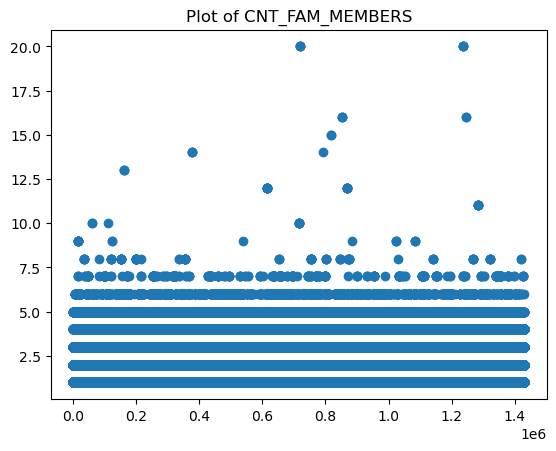

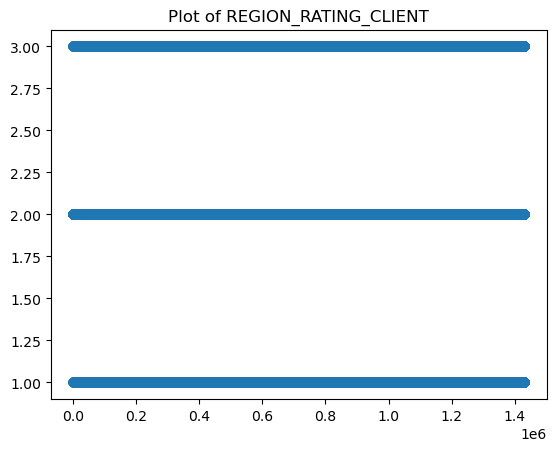

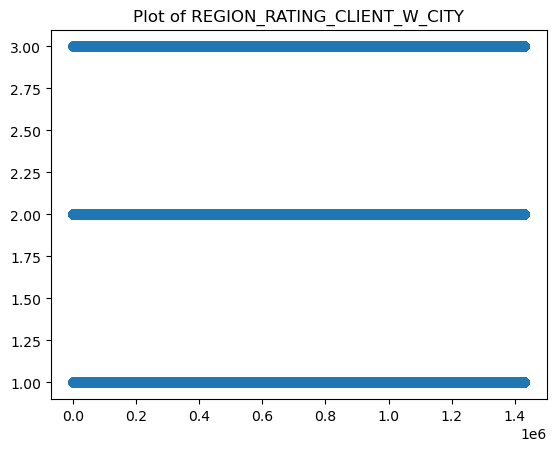

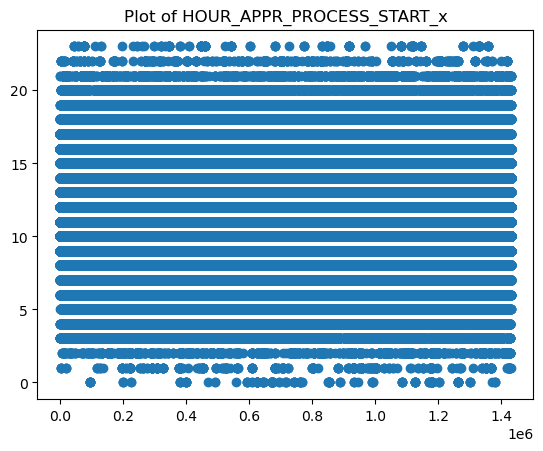

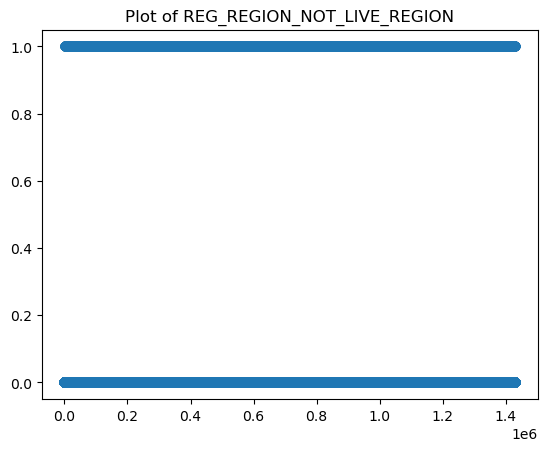

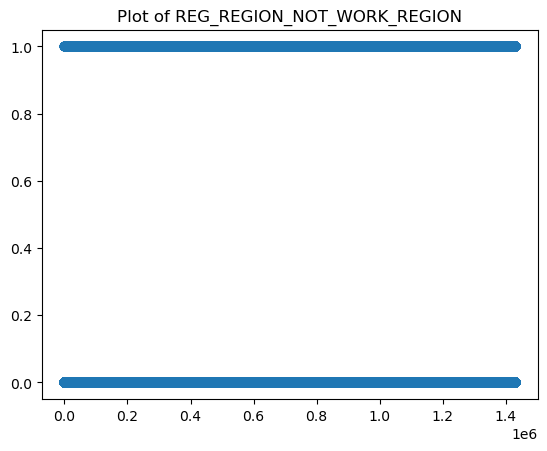

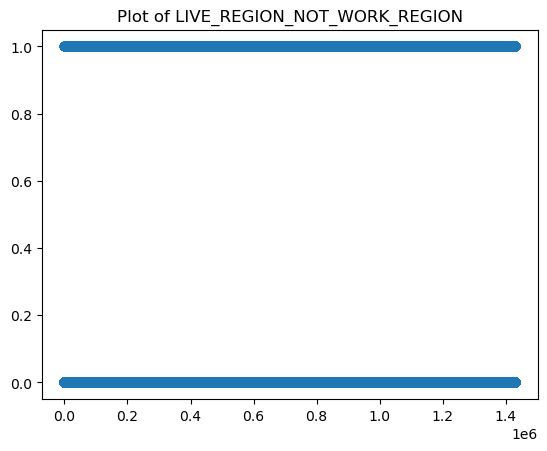

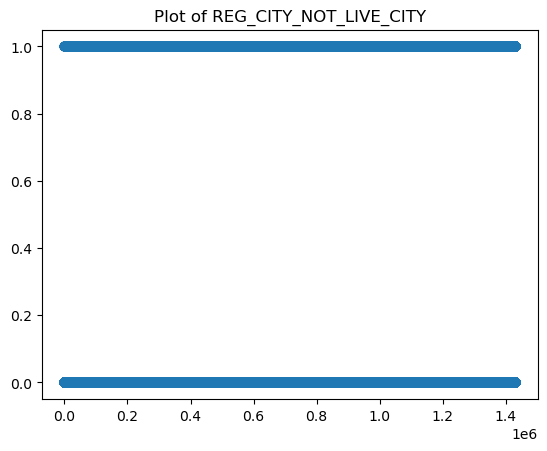

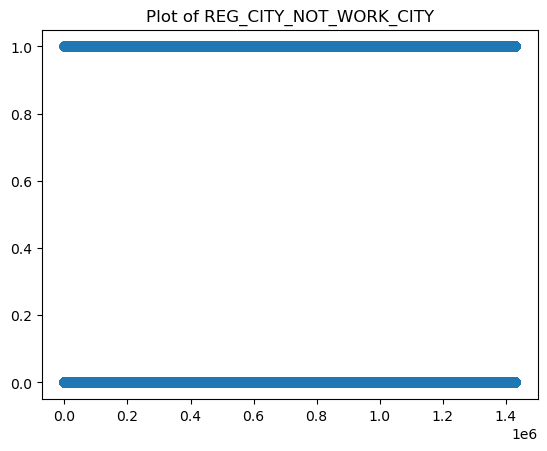

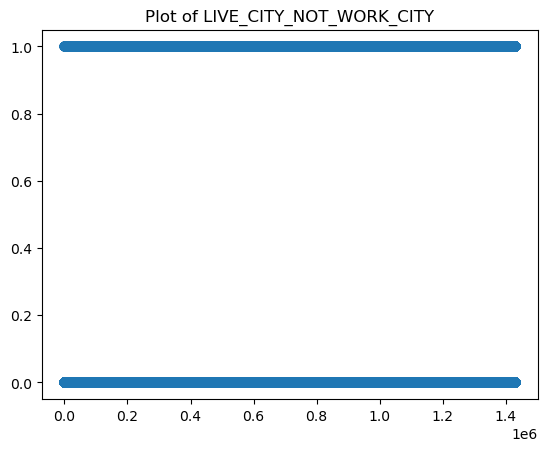

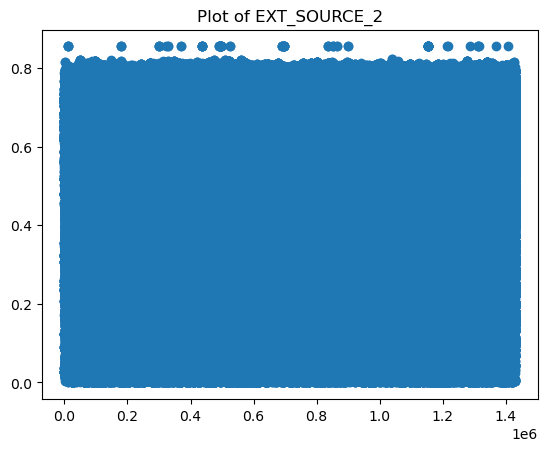

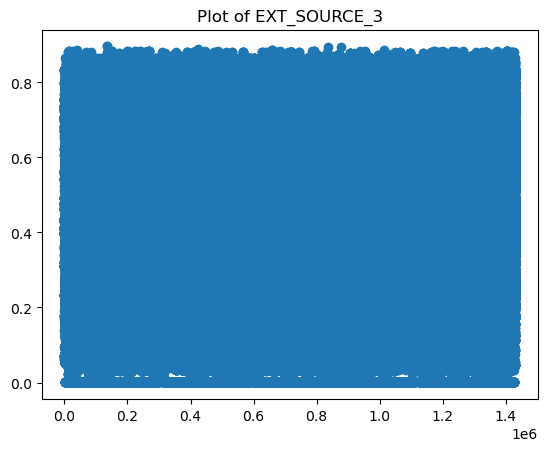

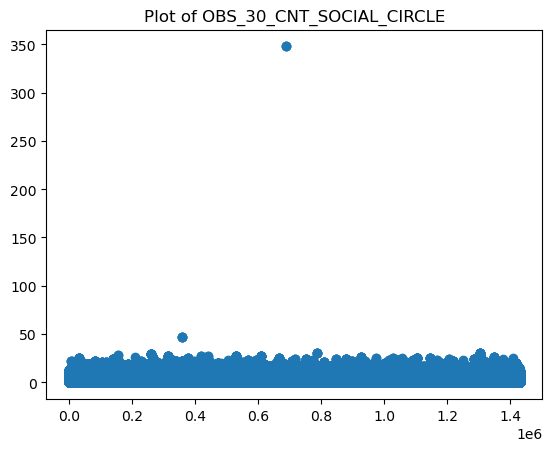

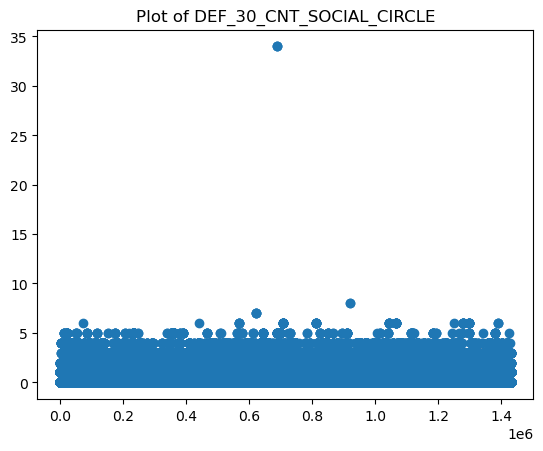

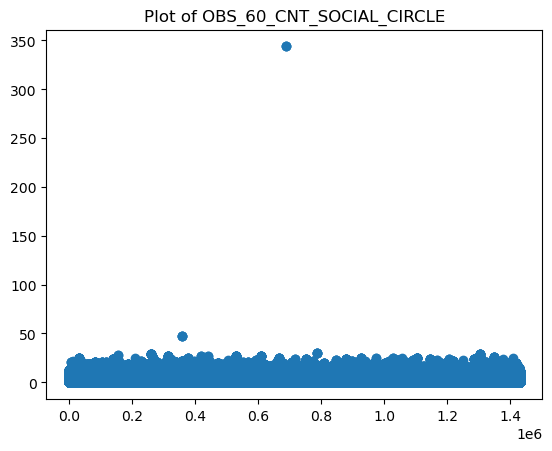

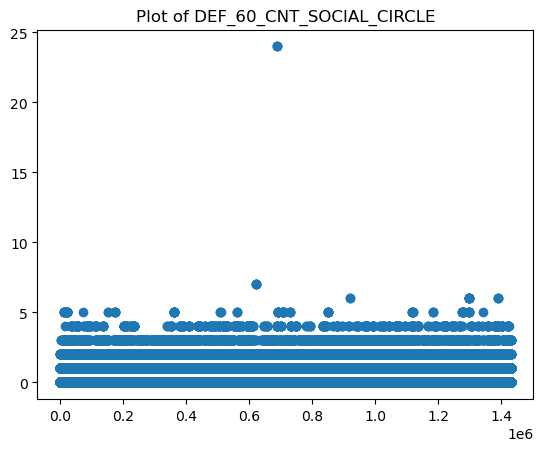

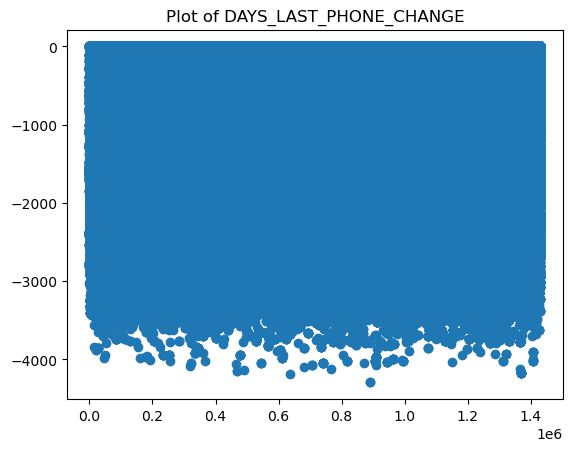

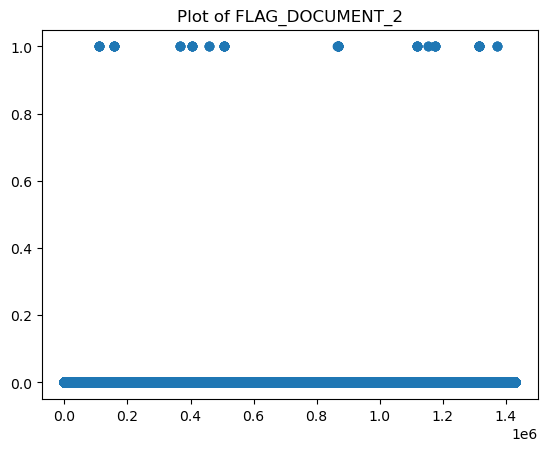

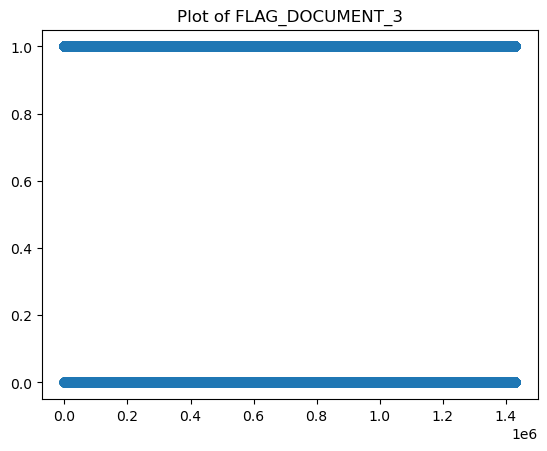

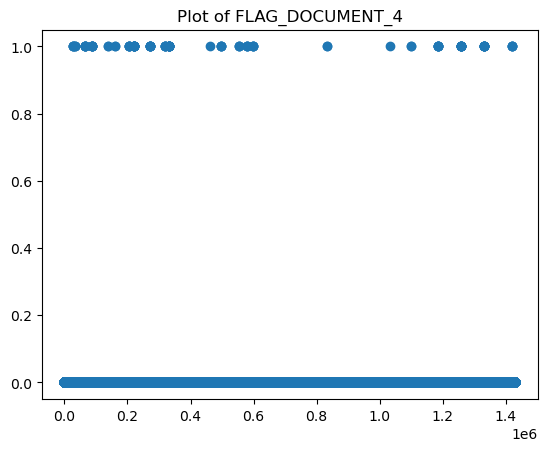

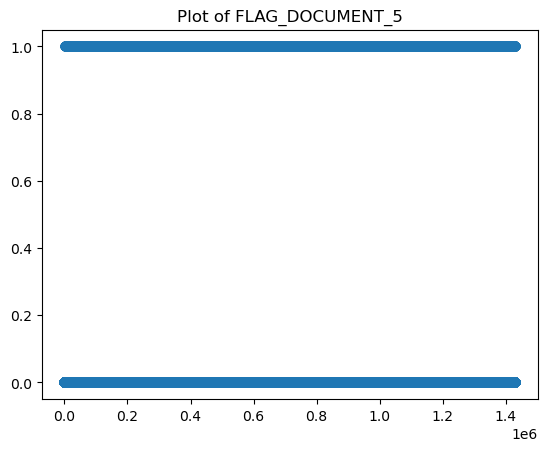

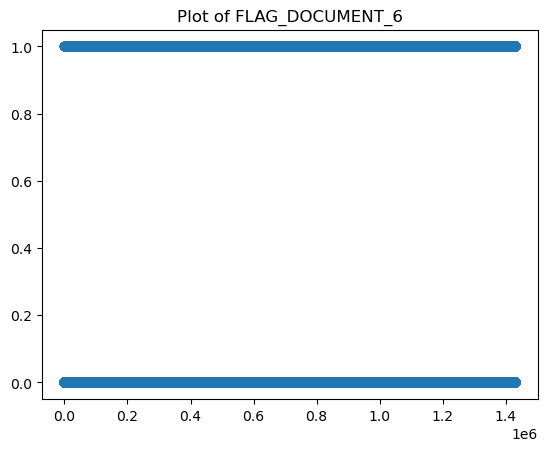

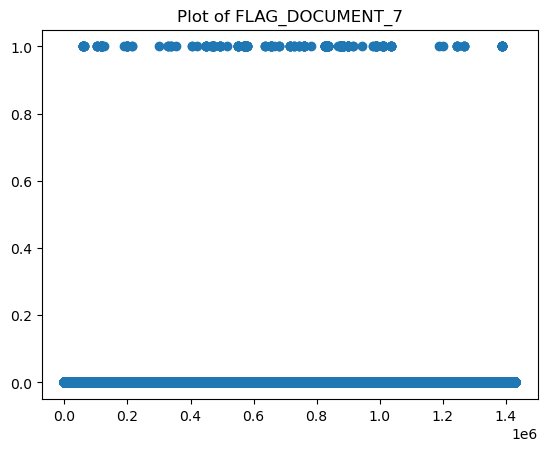

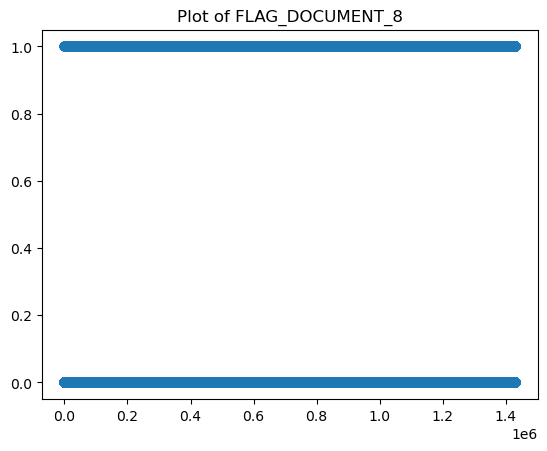

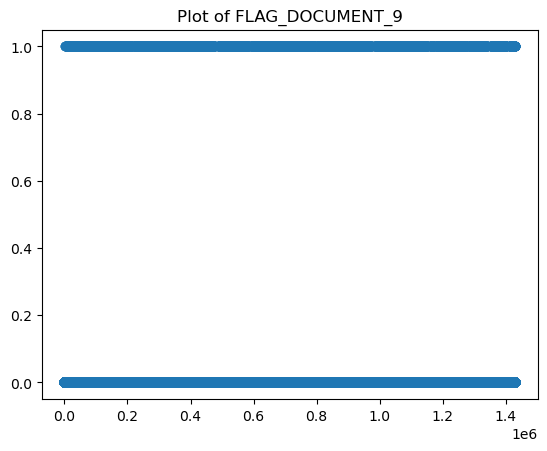

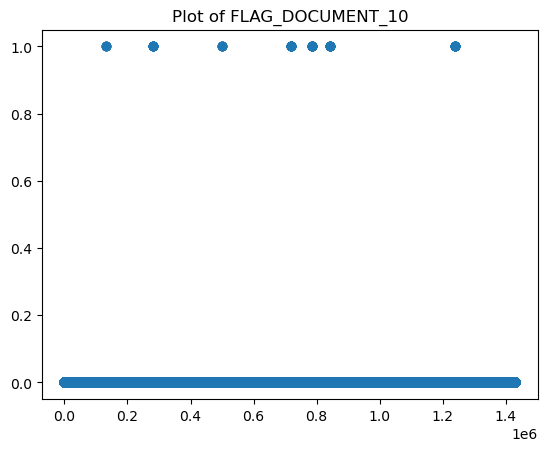

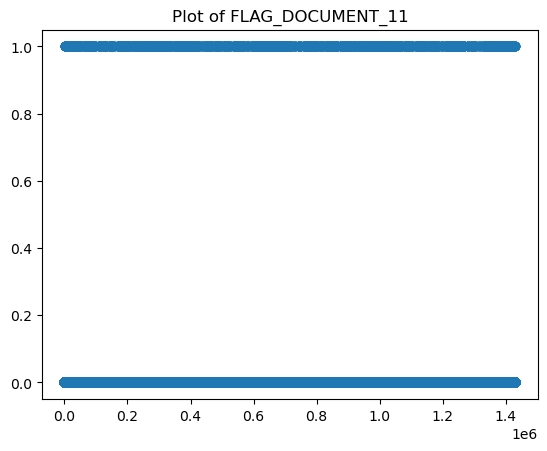

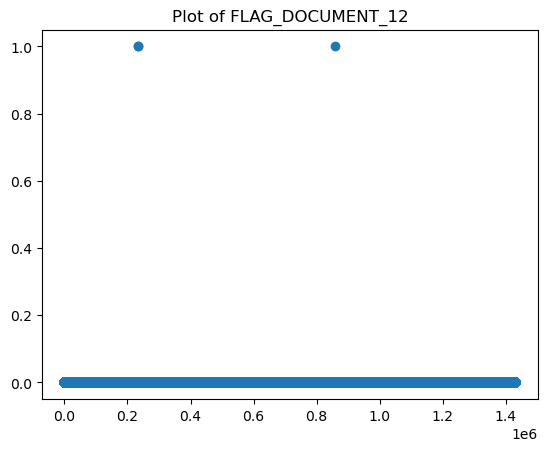

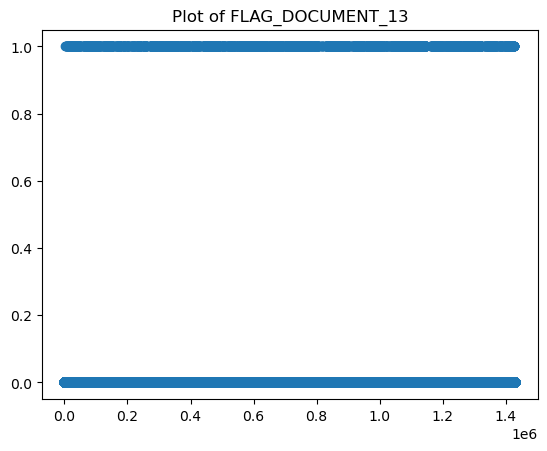

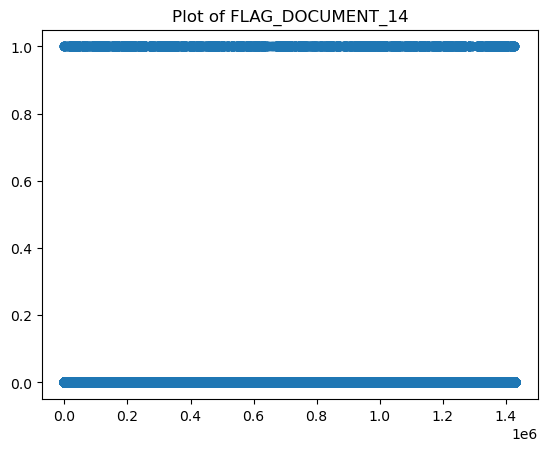

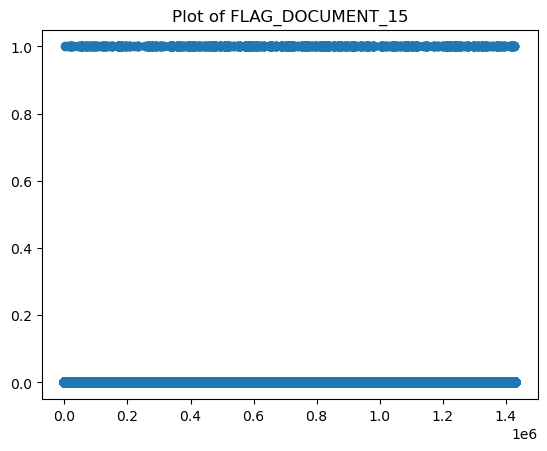

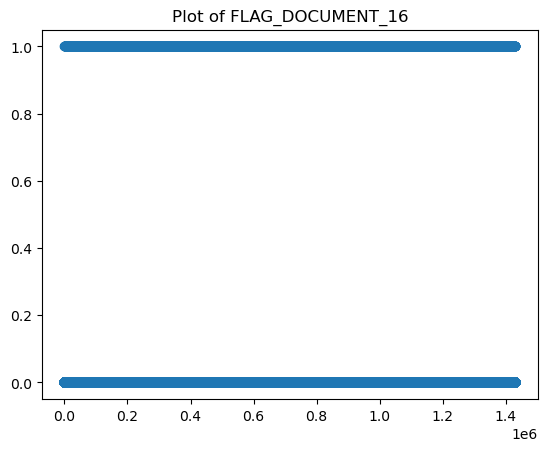

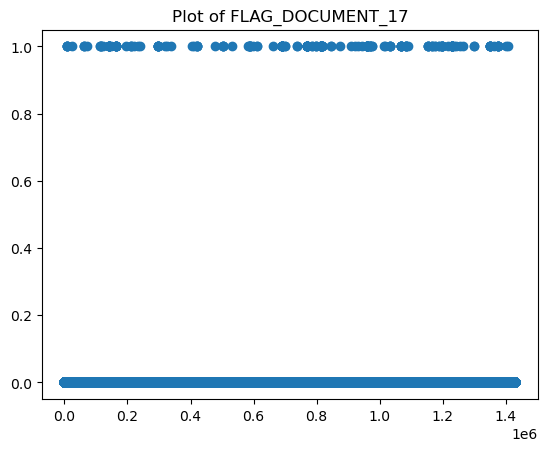

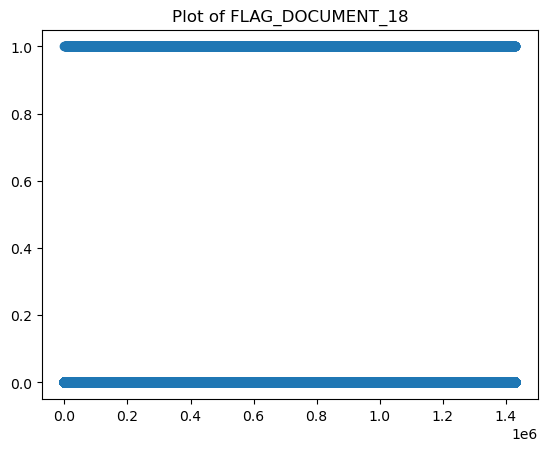

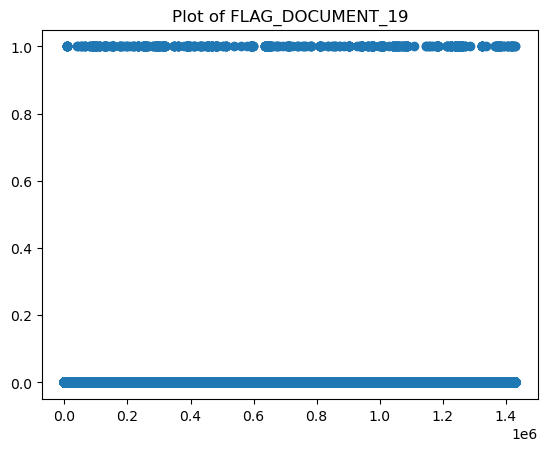

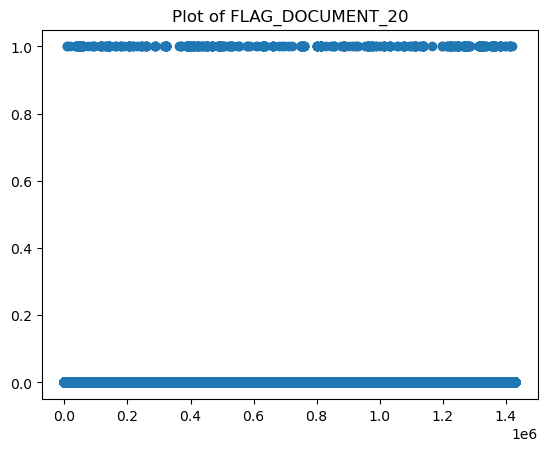

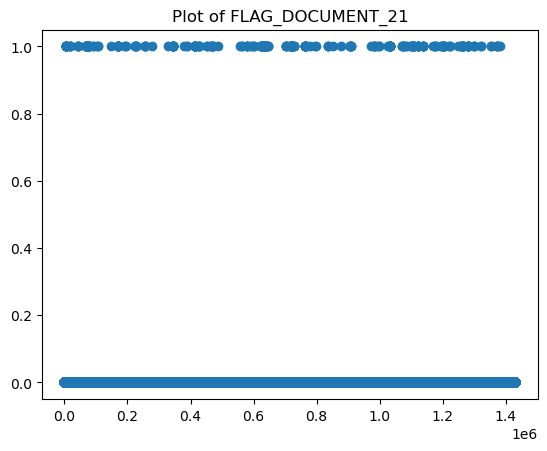

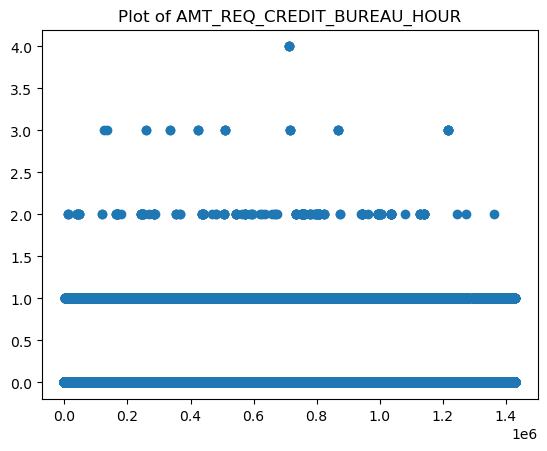

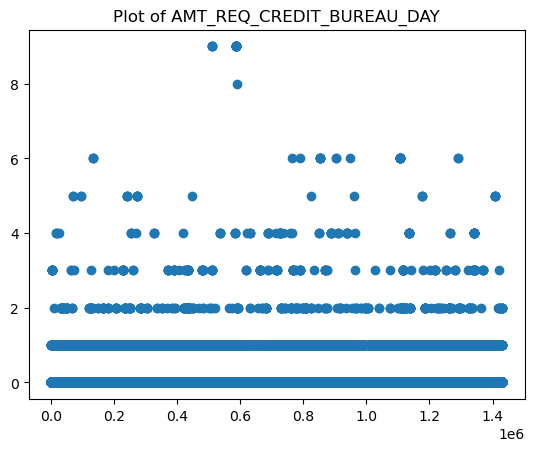

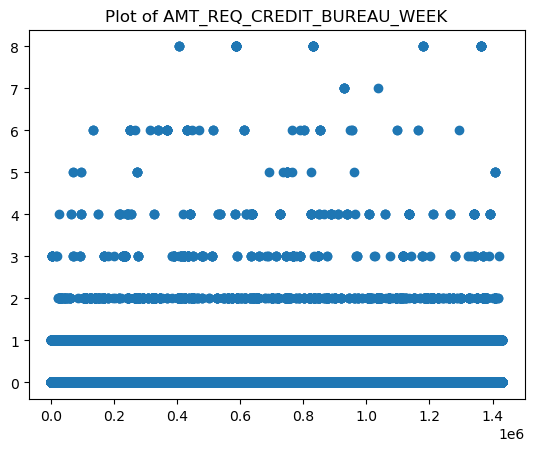

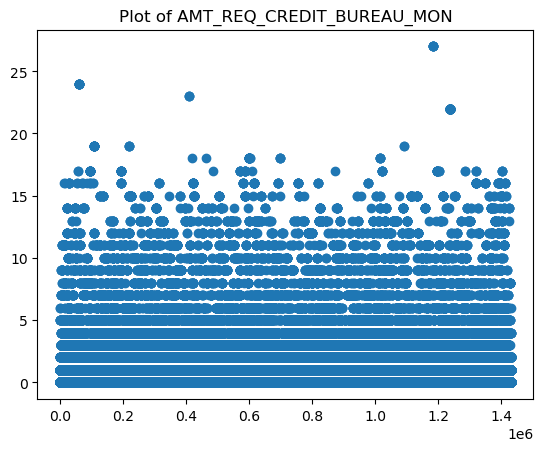

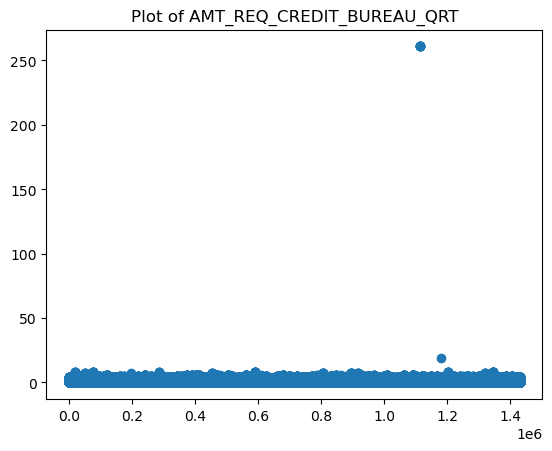

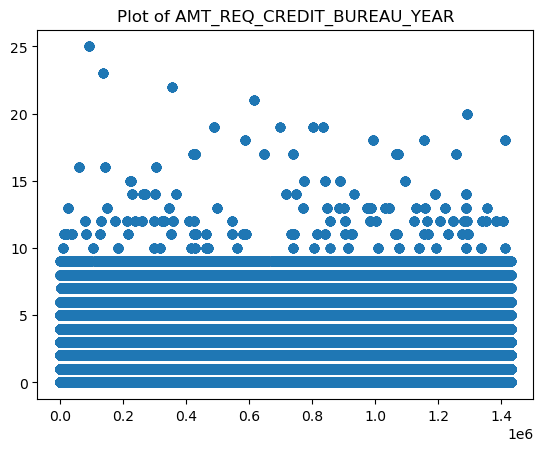

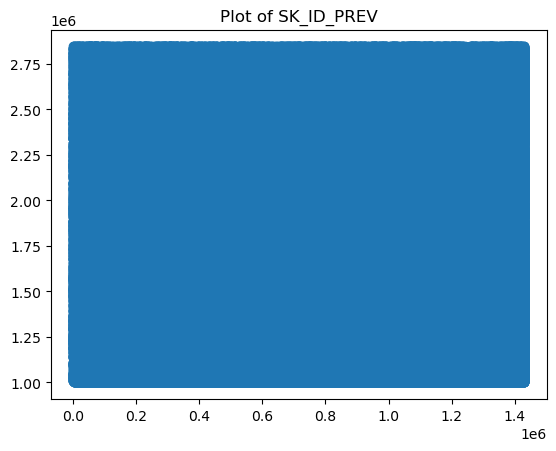

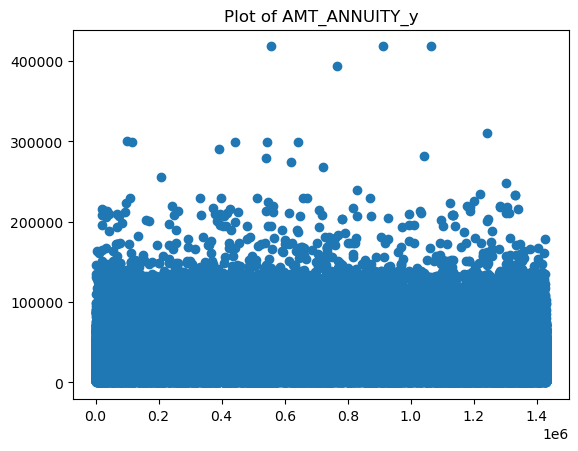

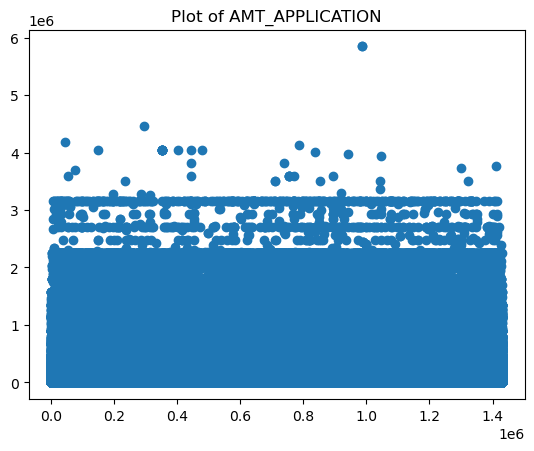

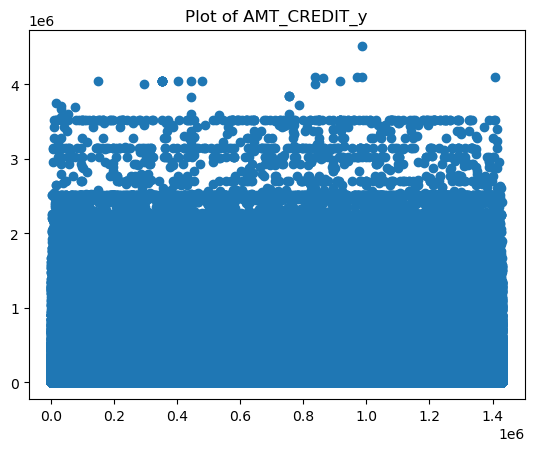

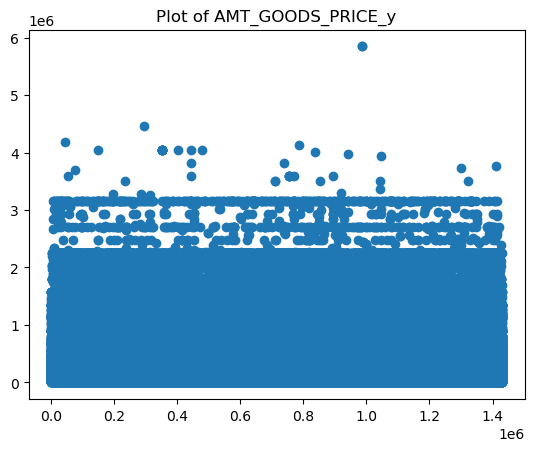

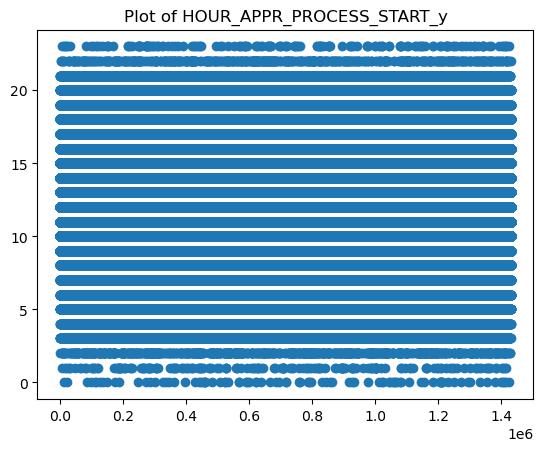

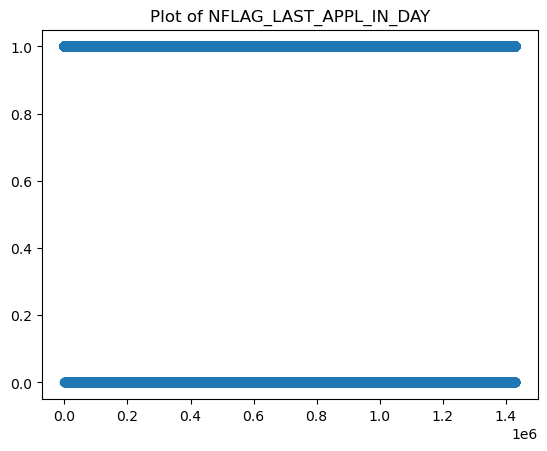

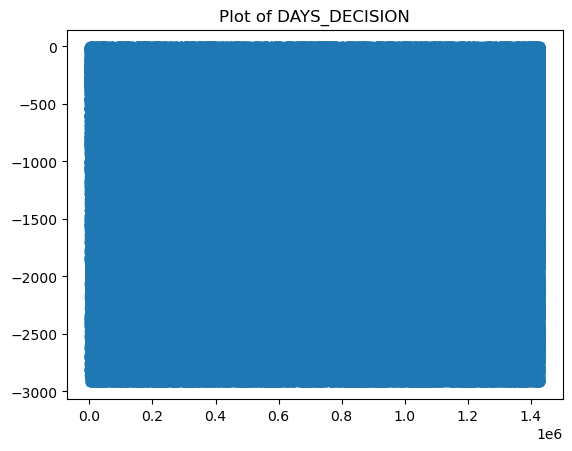

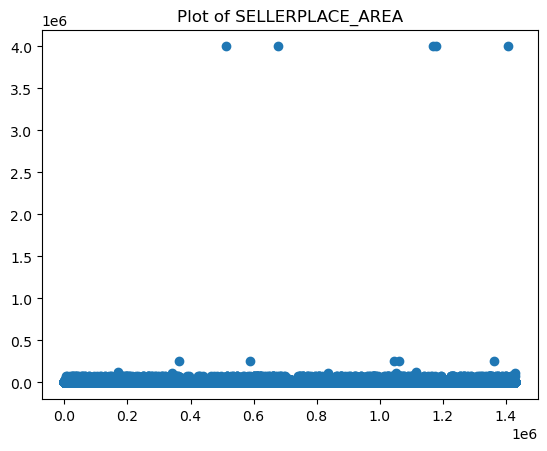

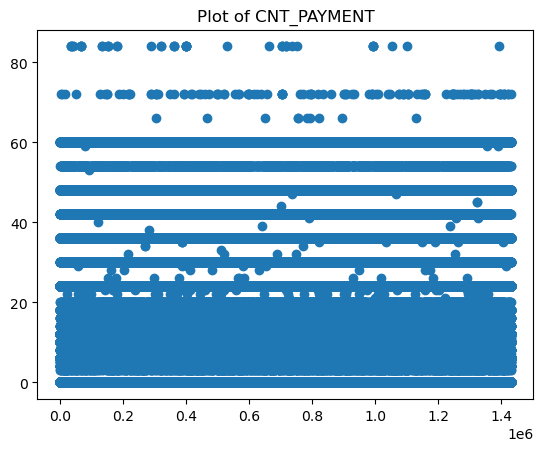

In [81]:
# Plot each numerical column against the index of the DataFrame 'cleaned_data'
for column in outlier_data:
    title = "Plot of " + column
    plt.scatter(cleaned_data.index, cleaned_data[column])
    plt.title(title)
    plt.show()
    plt.close()  # Close the plot to free memory

### The examination of outliers primarily hinges on the specifics of the business problem. Assuming the data is error-free, the decision to exclude any extreme values is dictated by business requirements. A review of various plots indicates the data reporting appears accurate. Hence, rather than eliminating these points, we will highlight the columns containing extreme values for further analysis.

Columns warranting further investigation include:

CNT_CHILDREN:

This denotes the number of children a client has. Instances of clients with more than 10 children are considered extreme.
AMT_INCOME_TOTAL:

This represents the client's income. A particular value around 1.2e8 is notably distant from the rest, suggesting it may be an outlier suitable for removal.
FLAG_MOBILE:

This identifies whether a client possesses a mobile phone. Its absence may or may not be considered an outlier. Other columns such as OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, and OBS_60_CNT_SOCIAL_CIRCLE also merit attention.


<Axes: xlabel='AMT_ANNUITY_x', ylabel='Density'>

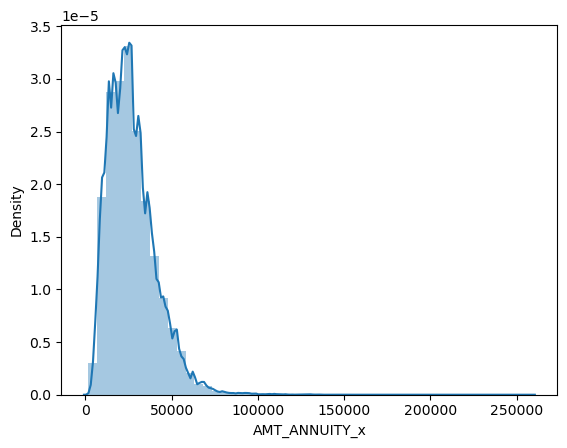

In [85]:
# Plot a distribution plot for the 'AMT_ANNUITY' column after removing any missing values
sns.distplot(cleaned_data['AMT_ANNUITY_x'].dropna())

In [95]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <= 50000:
        return 'medium'
    elif x > 50000 and x <= 100000:
        return 'high'
    else:
        return 'very high'

# Apply the 'amt_annuity' function to create a new categorical column 'amt_annuity_categorical'
cleaned_data['amt_annuity_categorical'] = cleaned_data['AMT_ANNUITY_x'].apply(lambda x: amt_annuity(x))

In [97]:
cleaned_data['amt_annuity_categorical']

0          medium
1          medium
2          medium
3          medium
4             low
            ...  
1430150    medium
1430151    medium
1430152    medium
1430153    medium
1430154    medium
Name: amt_annuity_categorical, Length: 1427896, dtype: object

<Axes: xlabel='amt_annuity_categorical', ylabel='count'>

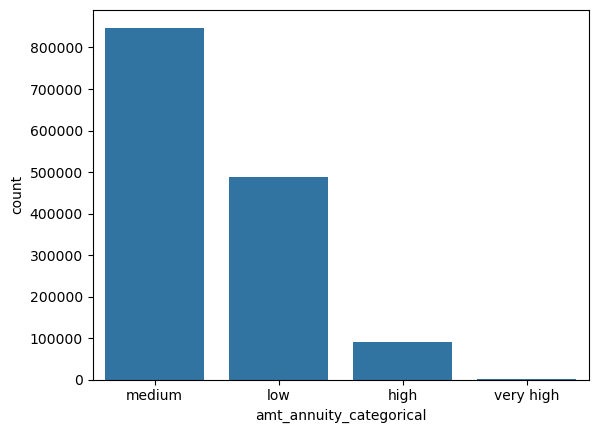

In [99]:
# Plot a count plot of the 'amt_annuity_categorical' column
sns.countplot(data=cleaned_data, x='amt_annuity_categorical')

In [101]:
cleaned_numerical = cleaned_data.select_dtypes(include=['int64','float64']).columns

In [103]:
cleaned_numerical

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
   

### Univariate analysis for numerical columns

Plot of SK_ID_CURR


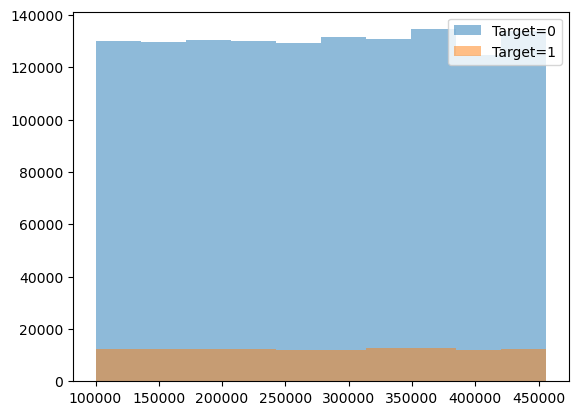

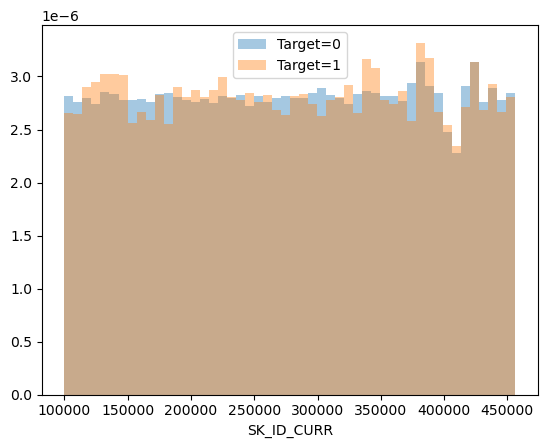

------------------------------------------------------------------------
Plot of CNT_CHILDREN


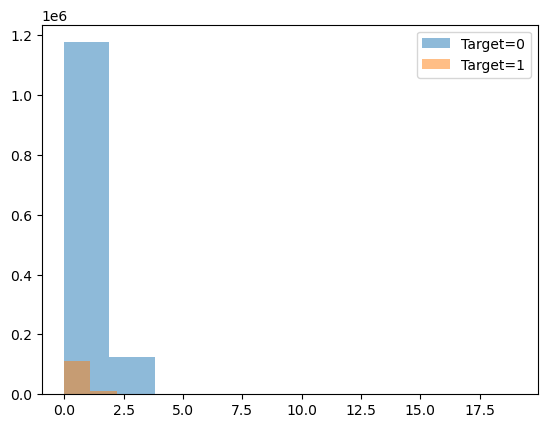

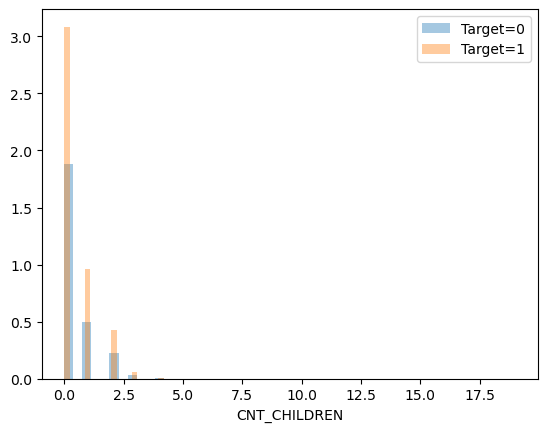

------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


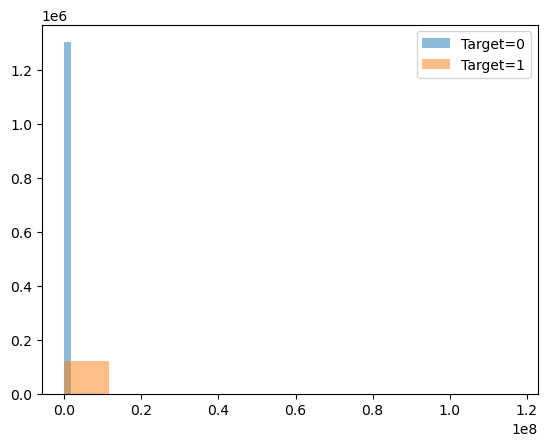

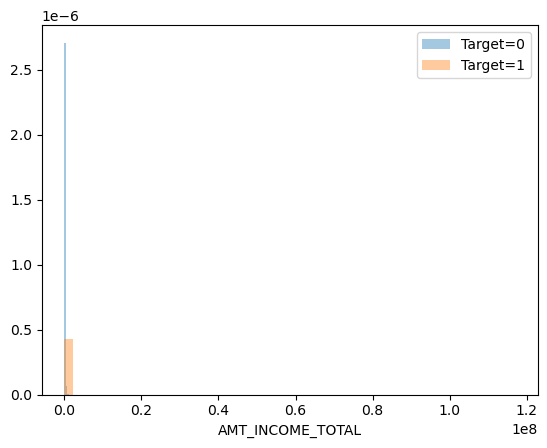

------------------------------------------------------------------------
Plot of AMT_CREDIT_x


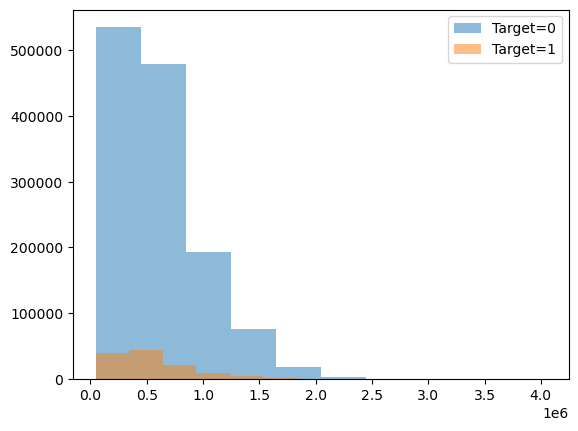

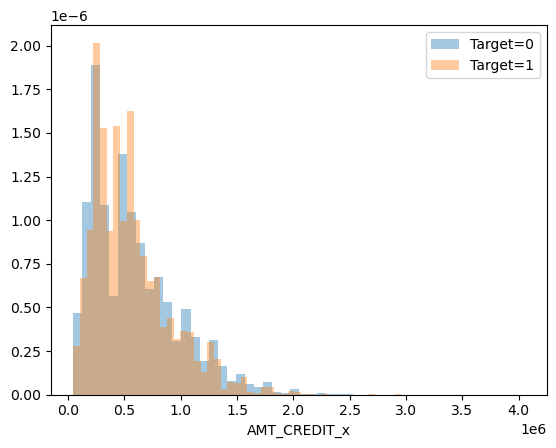

------------------------------------------------------------------------
Plot of AMT_ANNUITY_x


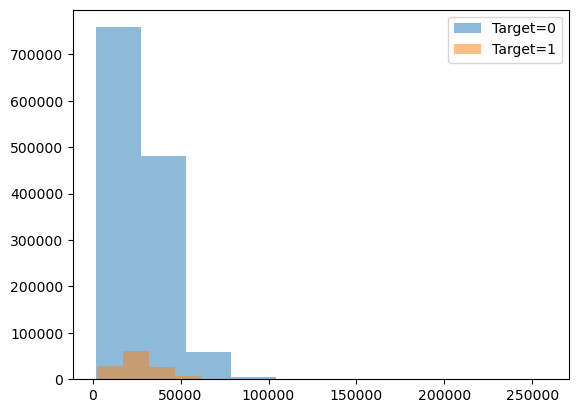

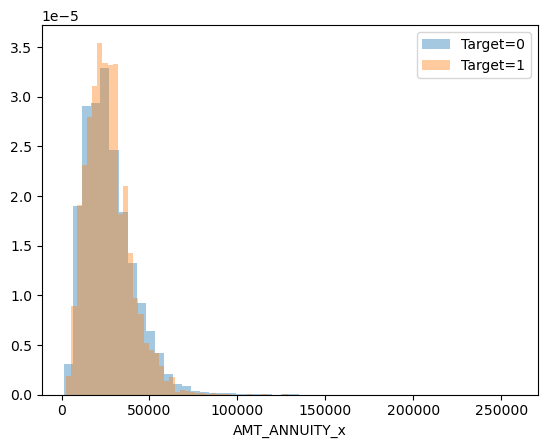

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE_x


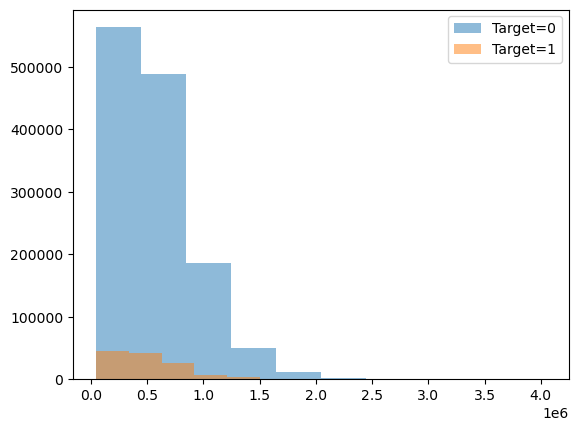

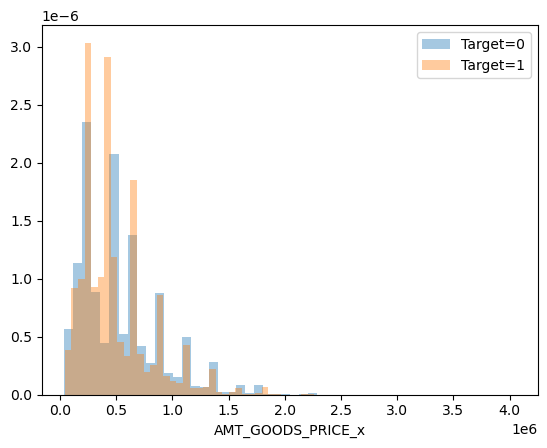

------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


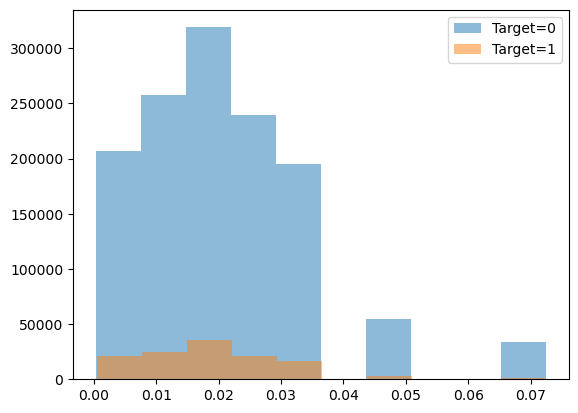

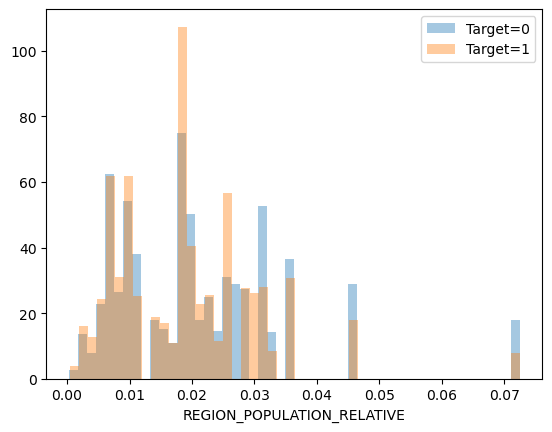

------------------------------------------------------------------------
Plot of DAYS_BIRTH


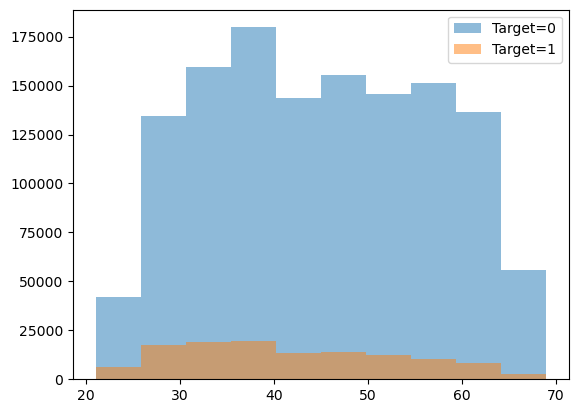

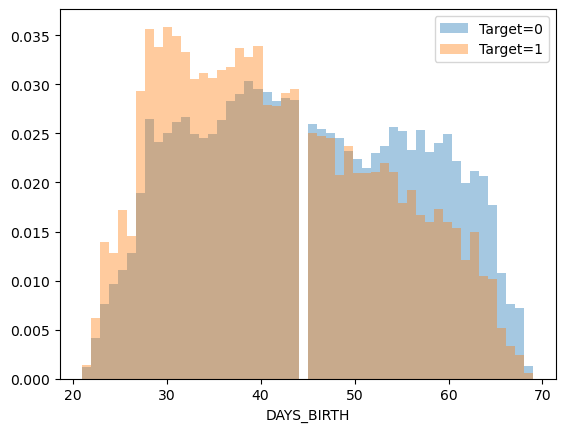

------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


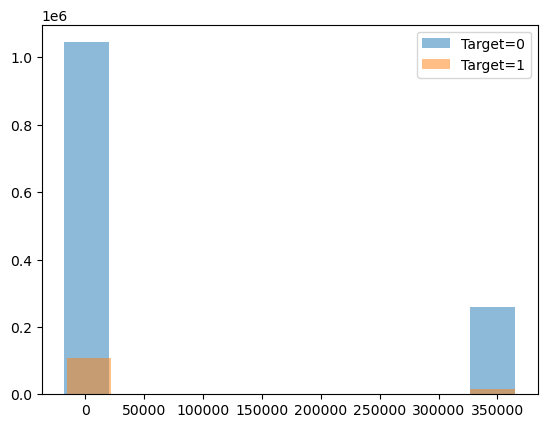

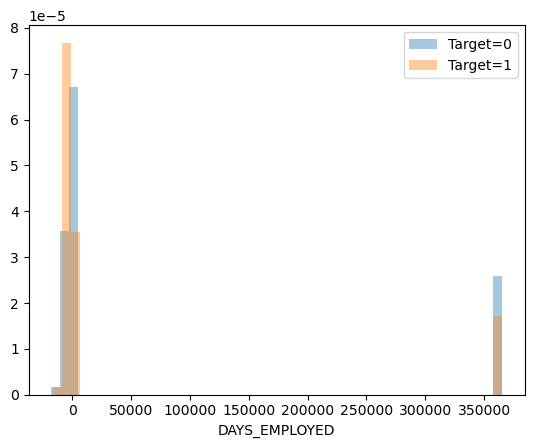

------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


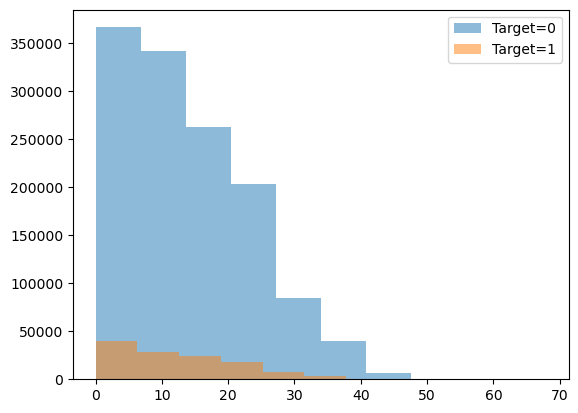

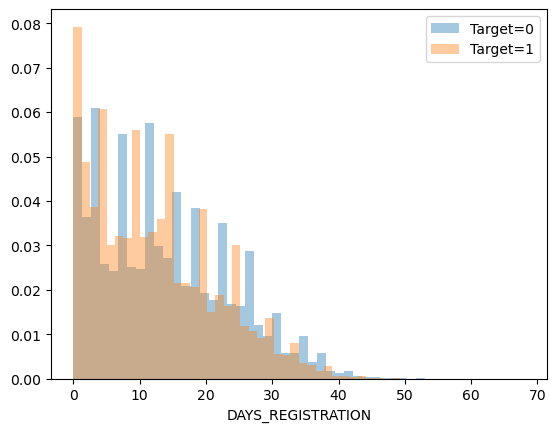

------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


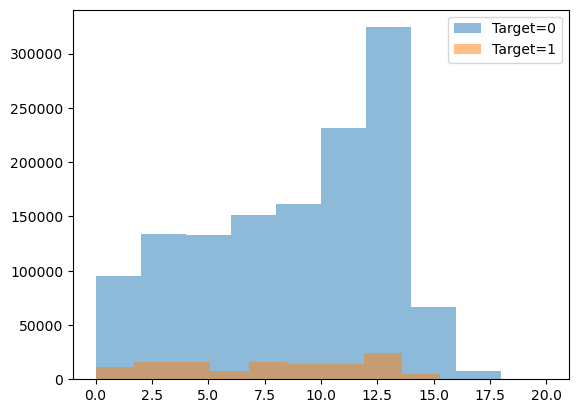

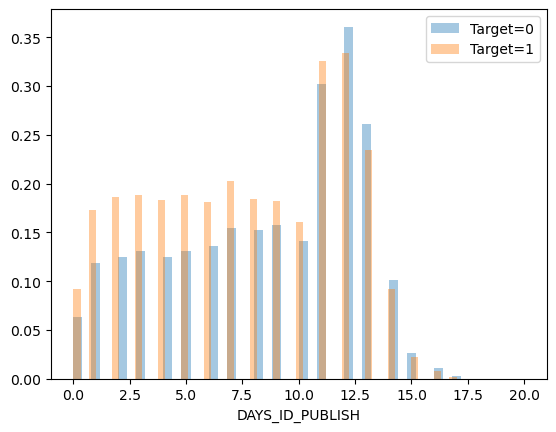

------------------------------------------------------------------------
Plot of FLAG_MOBIL


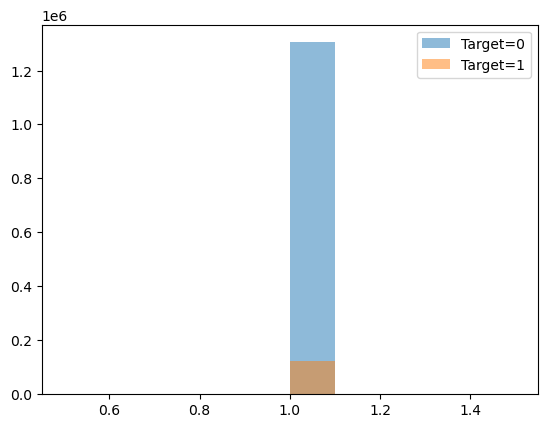

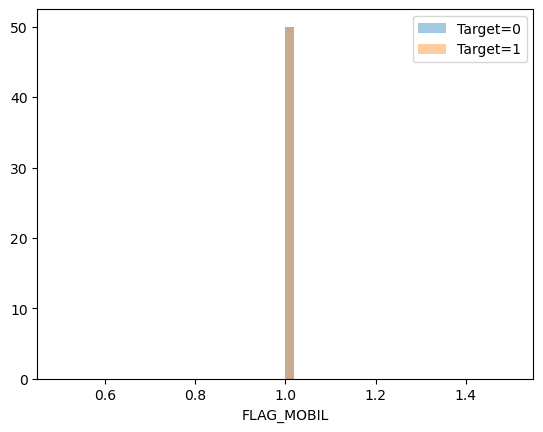

------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


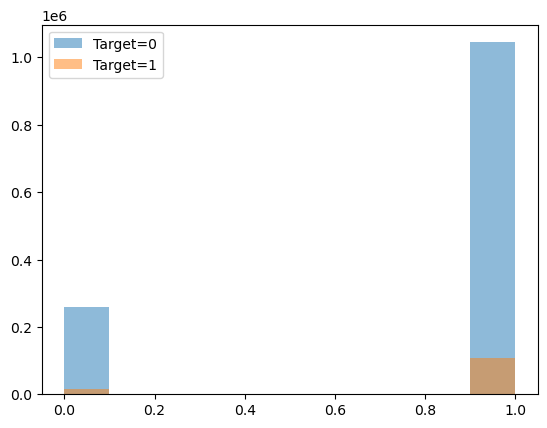

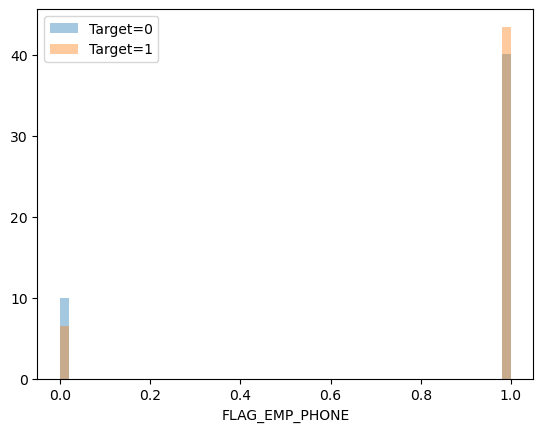

------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


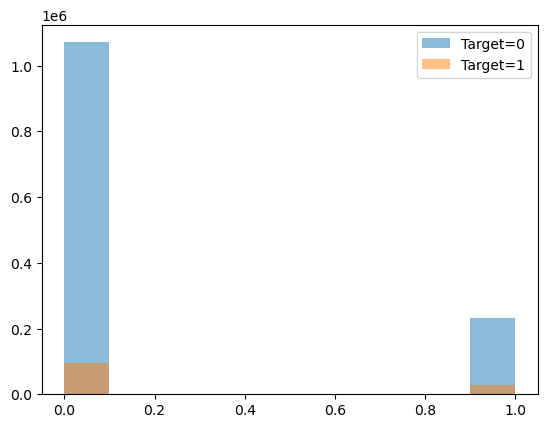

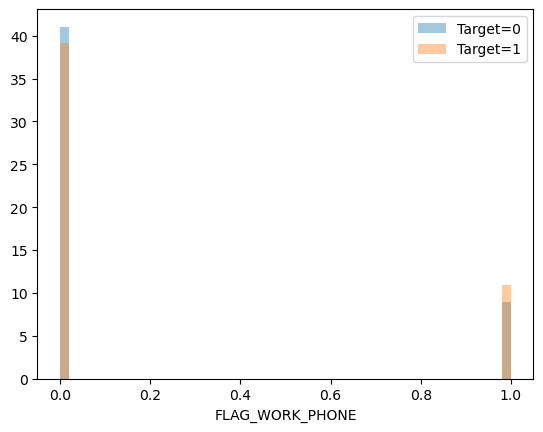

------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


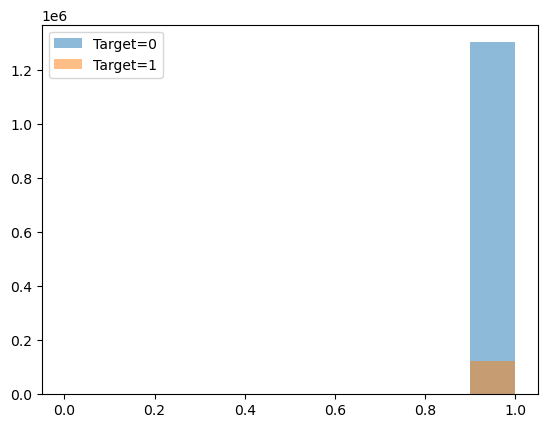

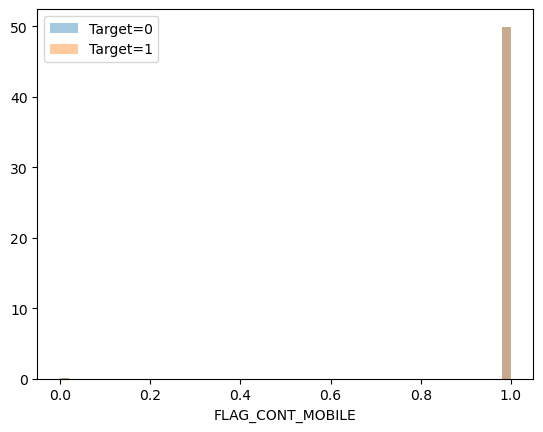

------------------------------------------------------------------------
Plot of FLAG_PHONE


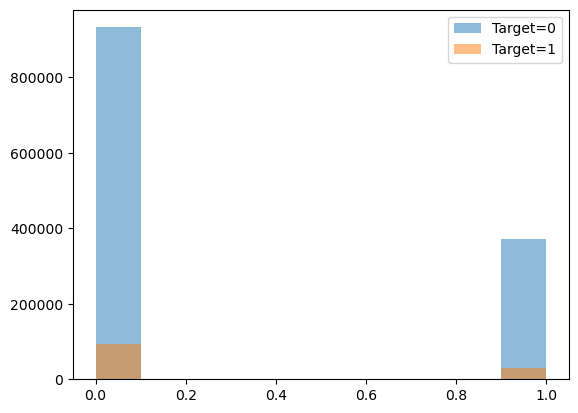

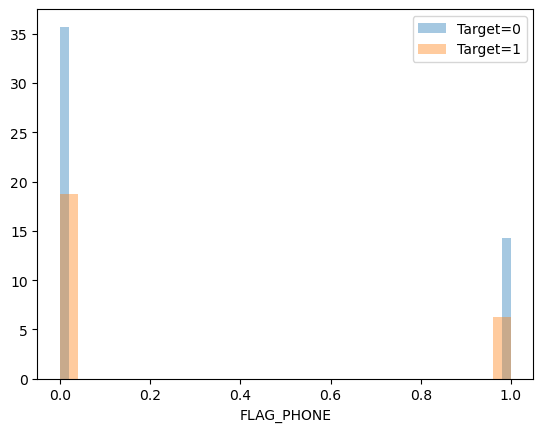

------------------------------------------------------------------------
Plot of FLAG_EMAIL


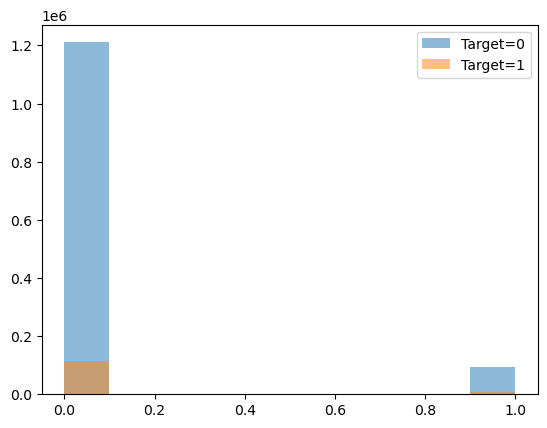

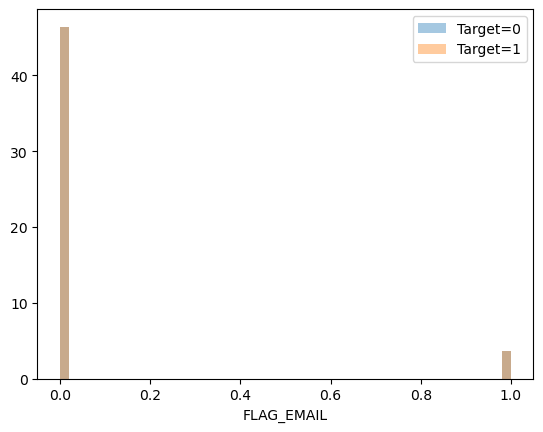

------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


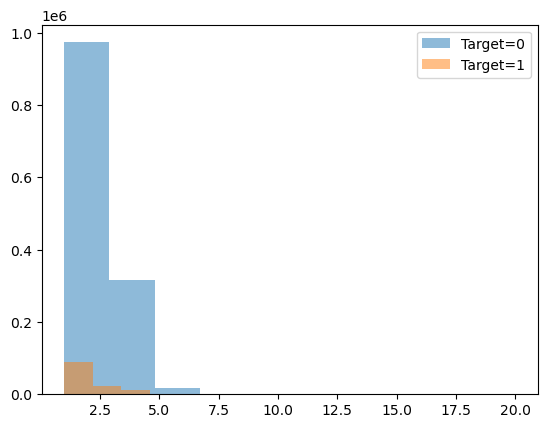

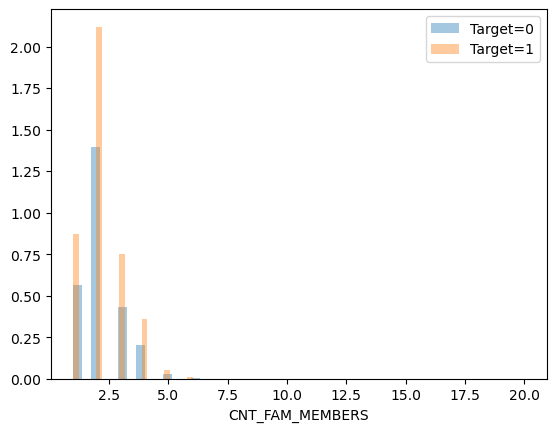

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


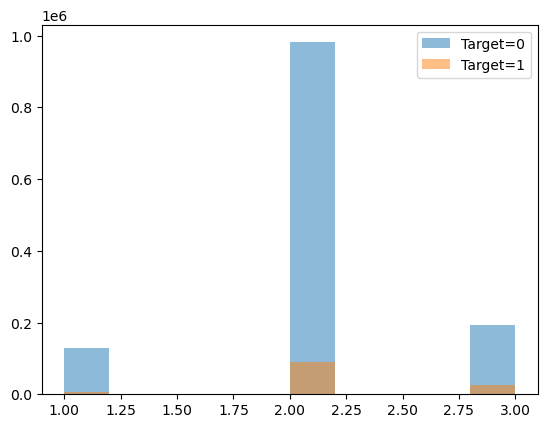

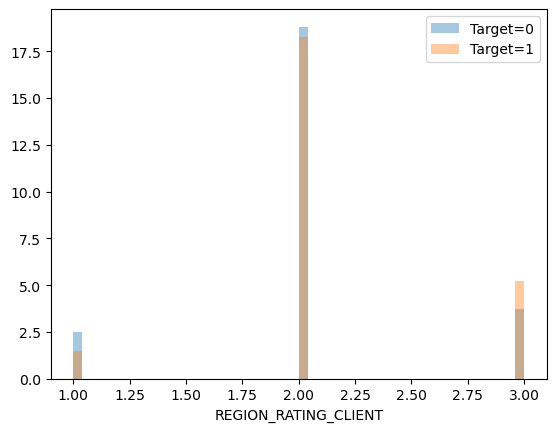

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


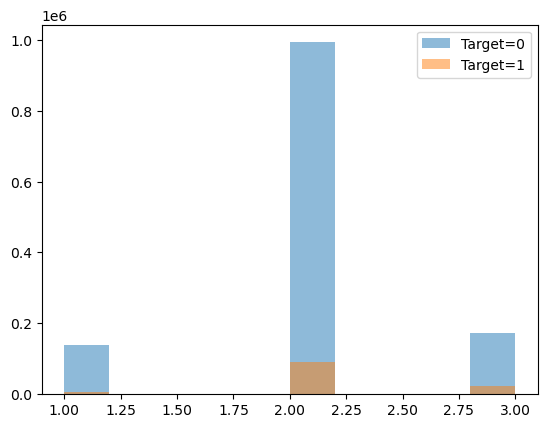

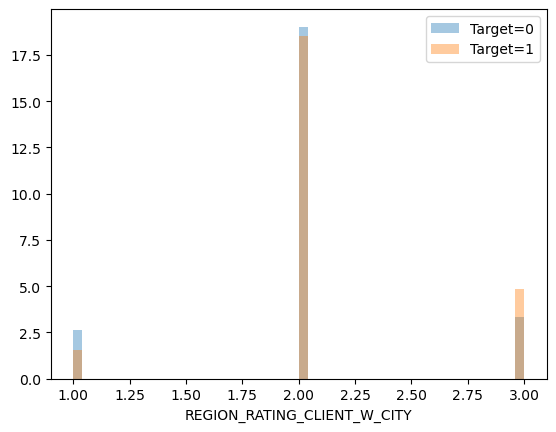

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START_x


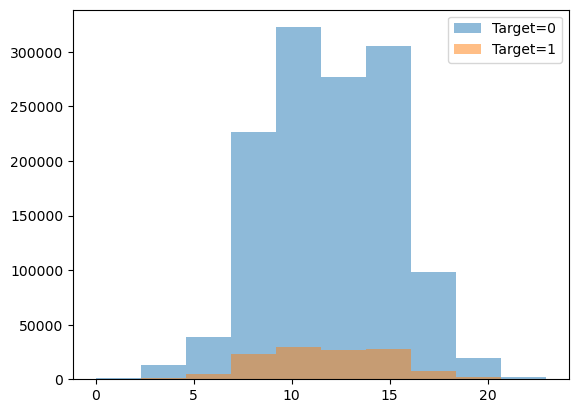

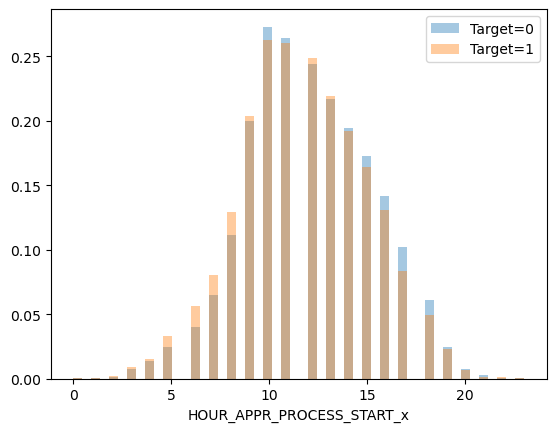

------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


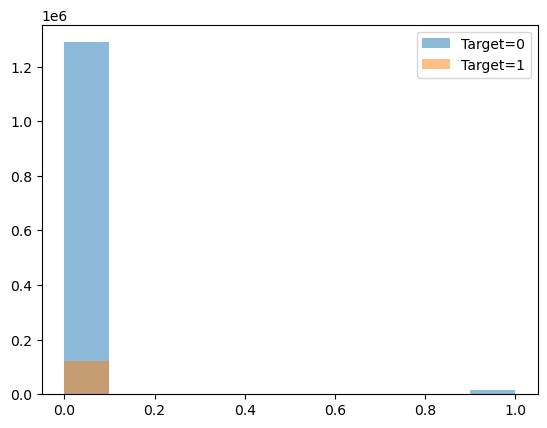

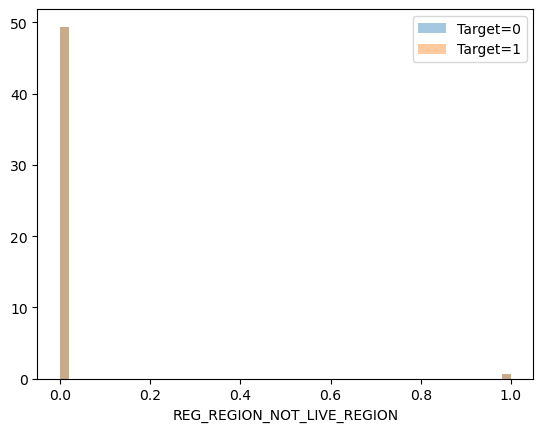

------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


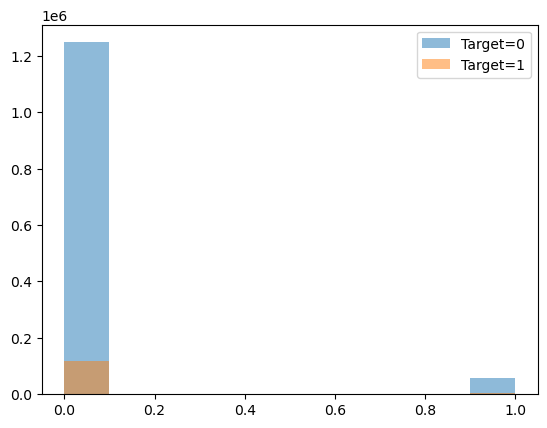

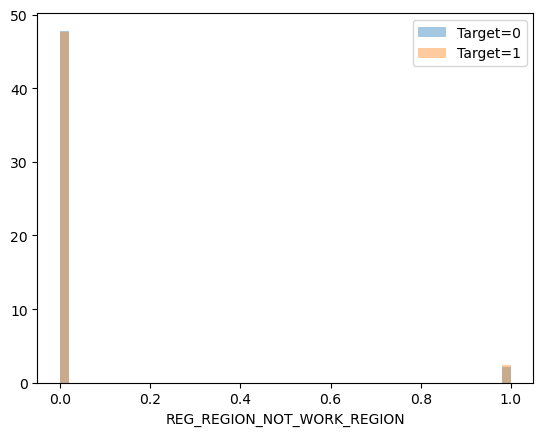

------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


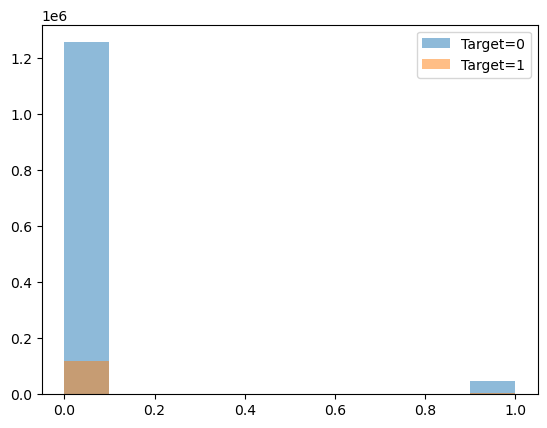

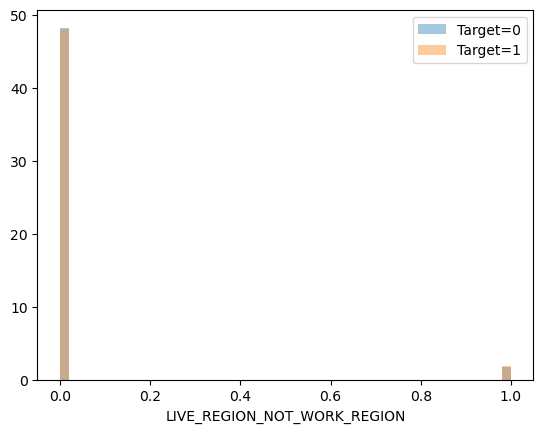

------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


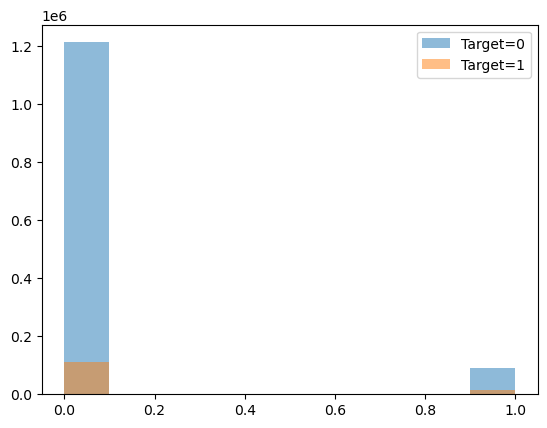

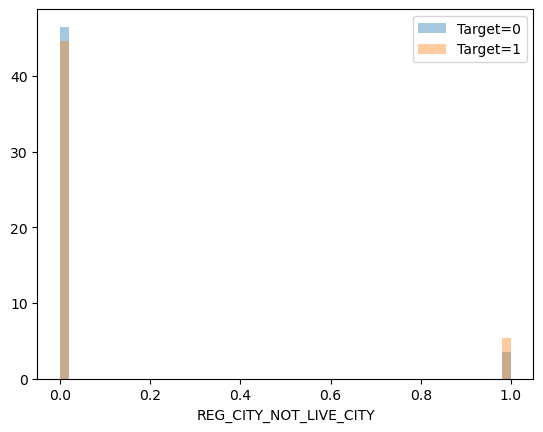

------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


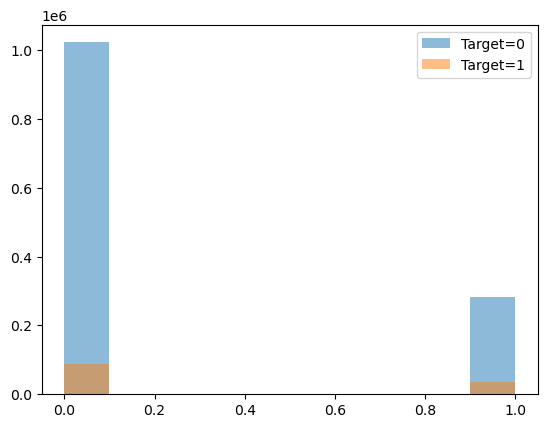

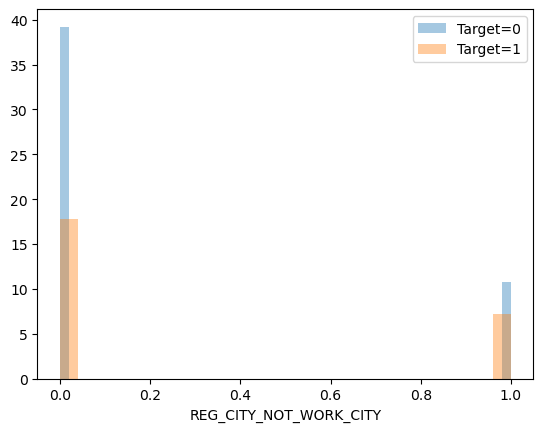

------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


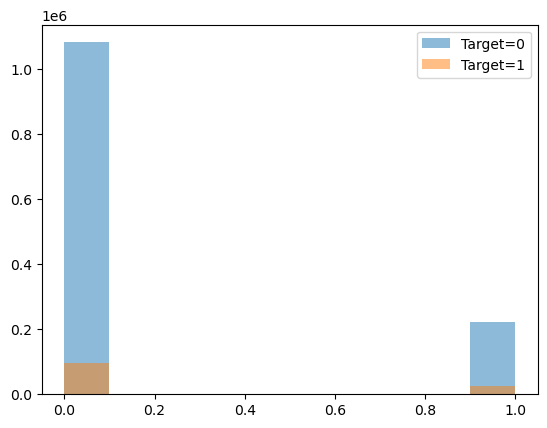

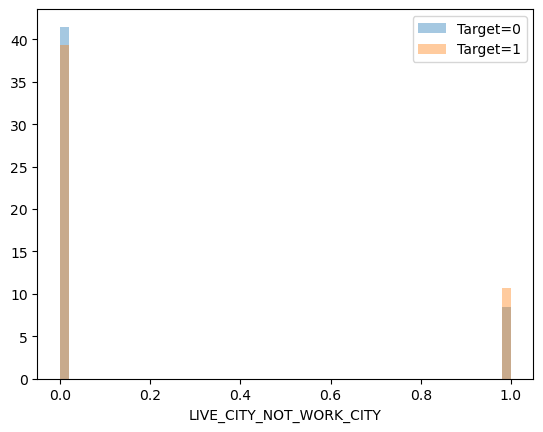

------------------------------------------------------------------------
Plot of EXT_SOURCE_2


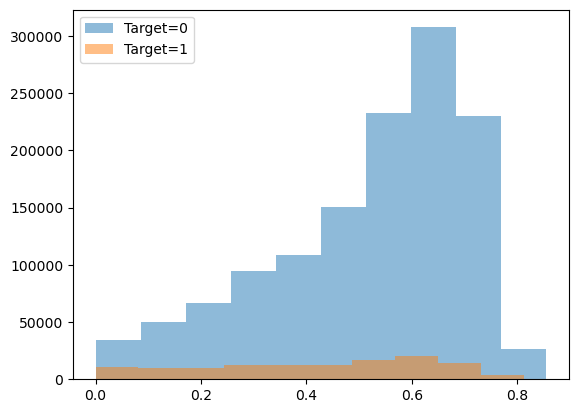

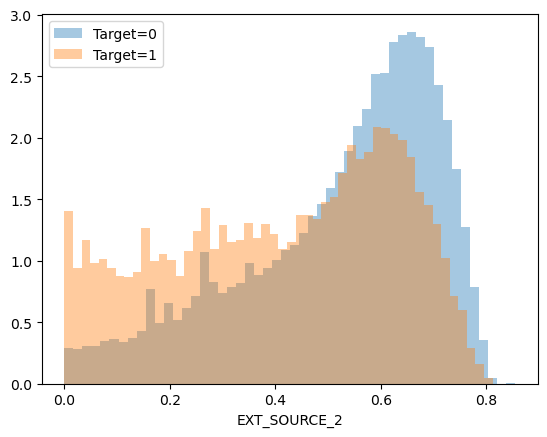

------------------------------------------------------------------------
Plot of EXT_SOURCE_3


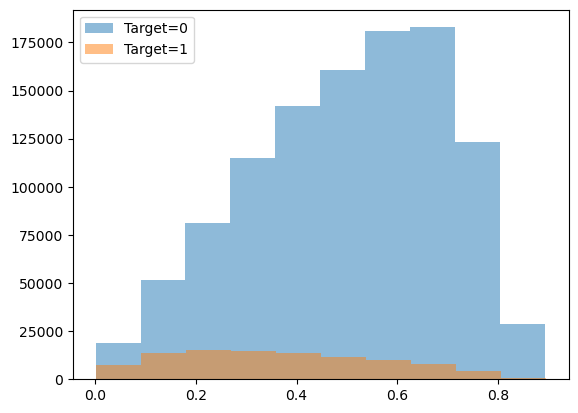

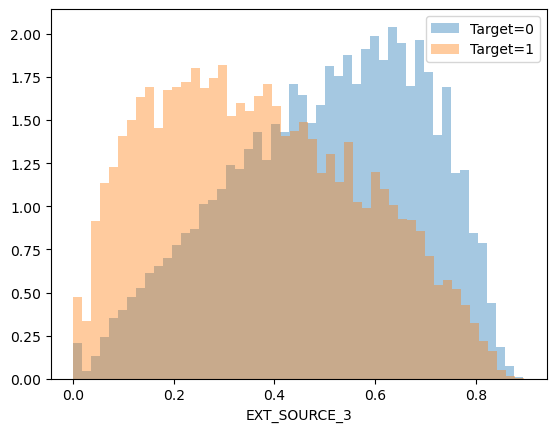

------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


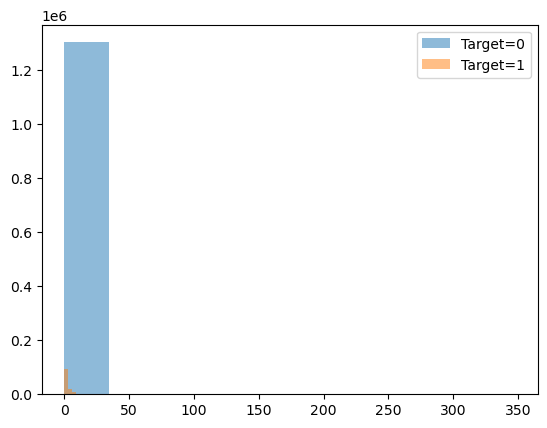

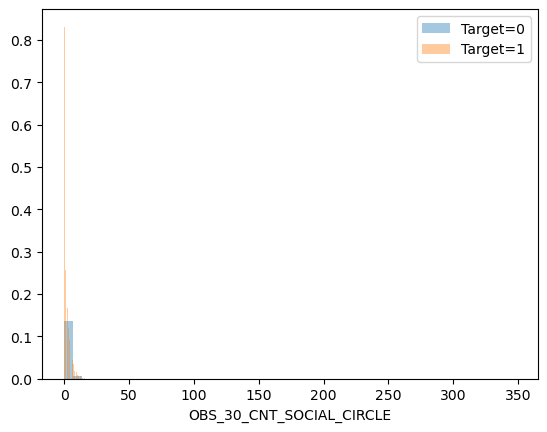

------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


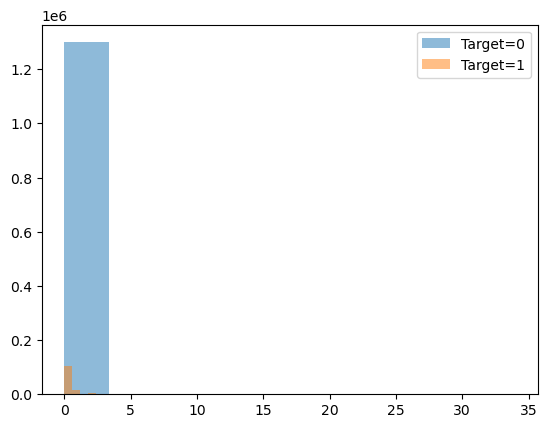

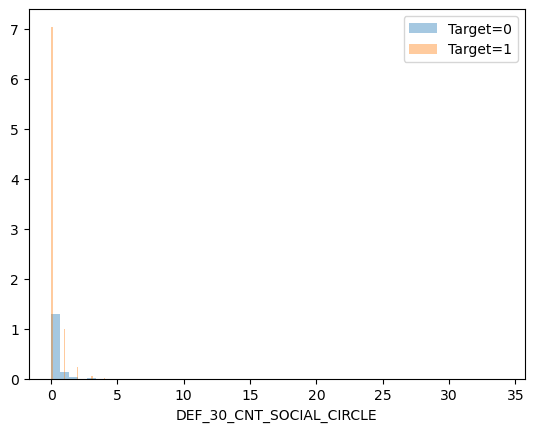

------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


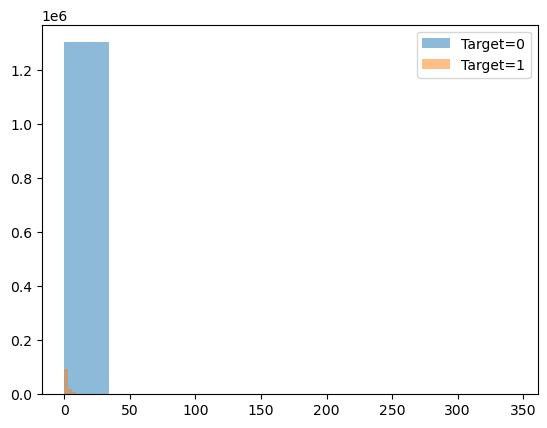

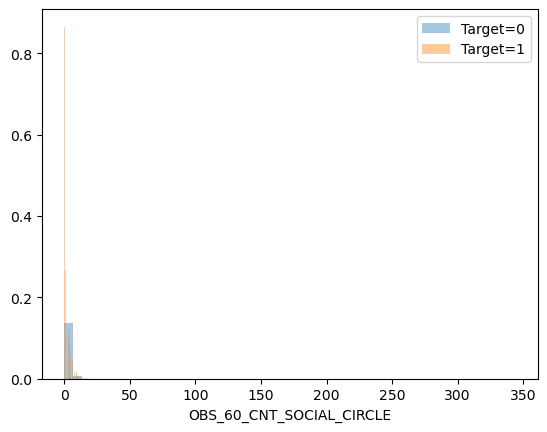

------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


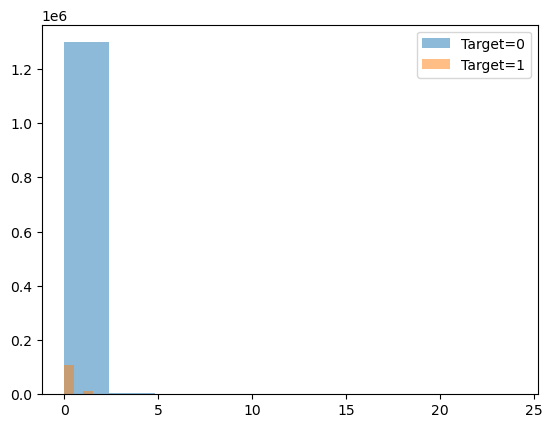

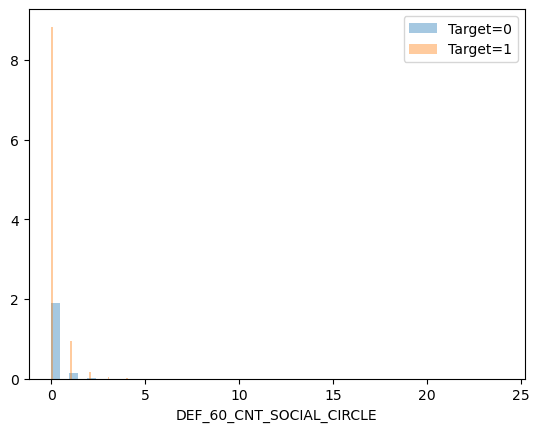

------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


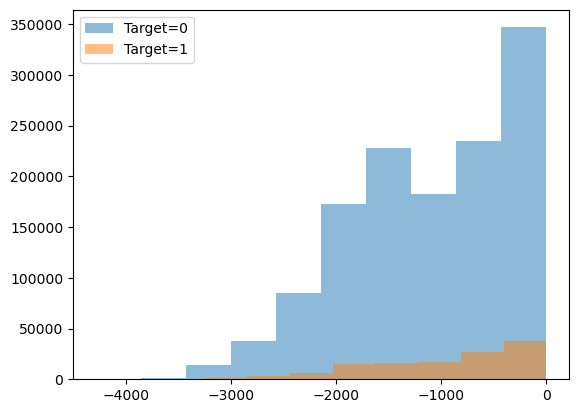

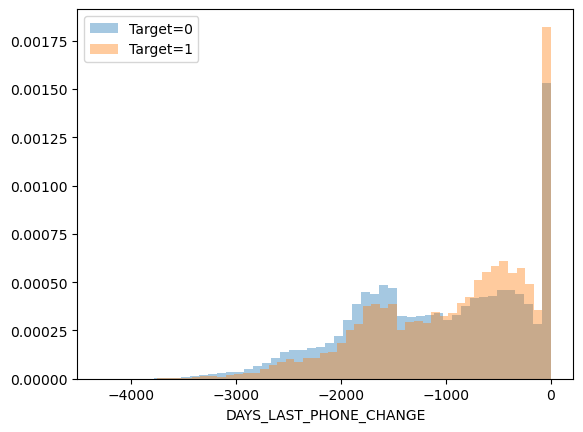

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


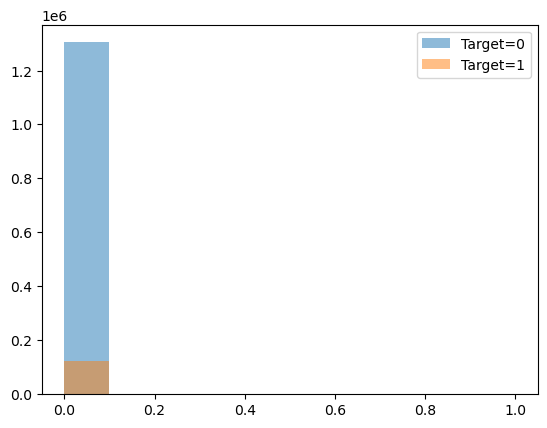

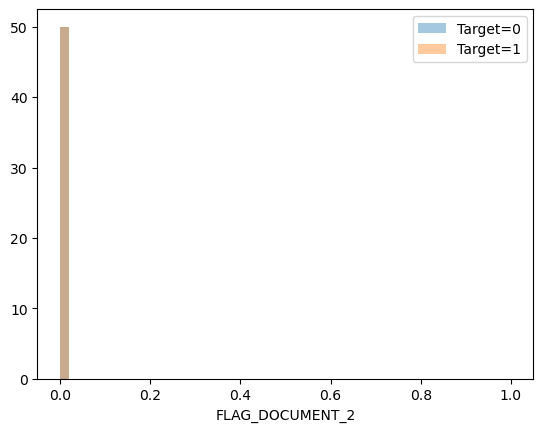

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


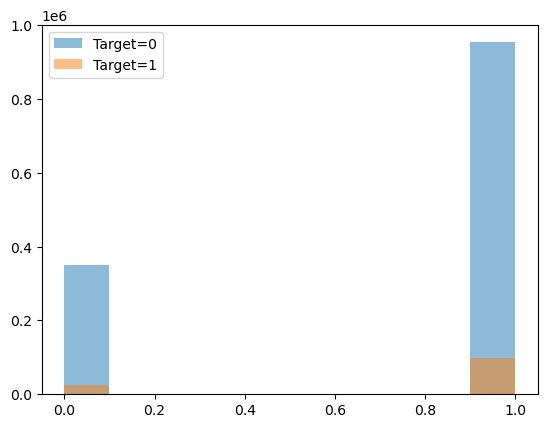

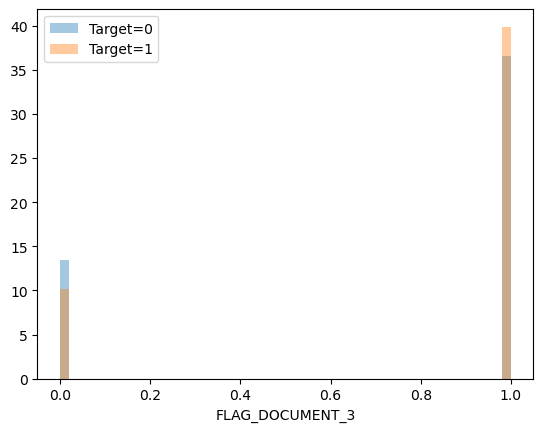

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


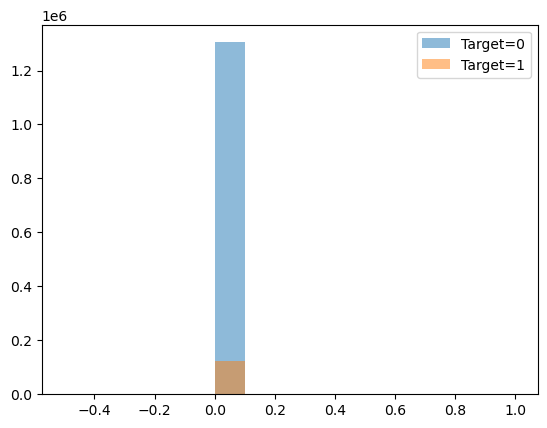

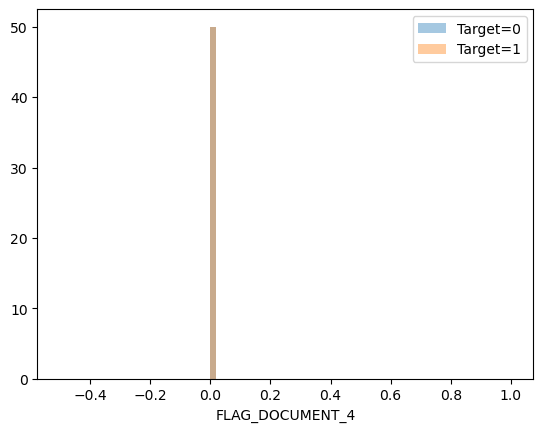

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


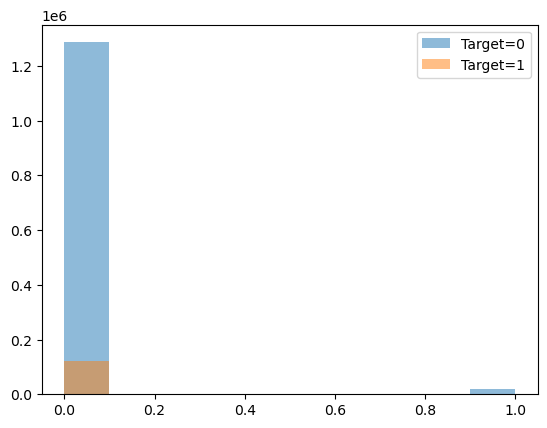

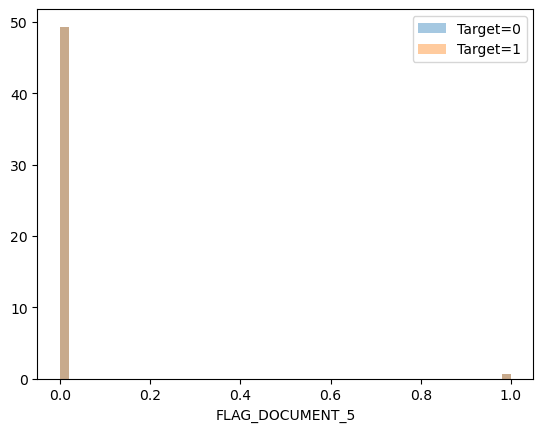

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


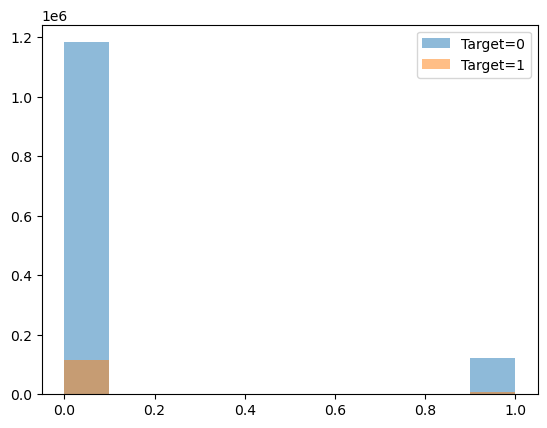

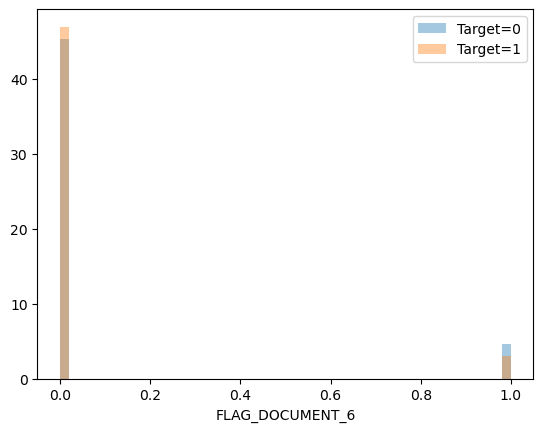

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


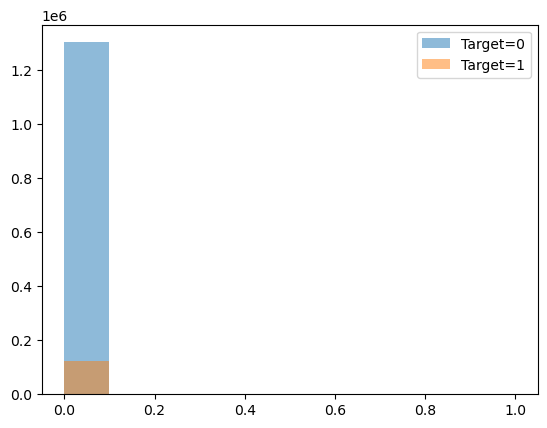

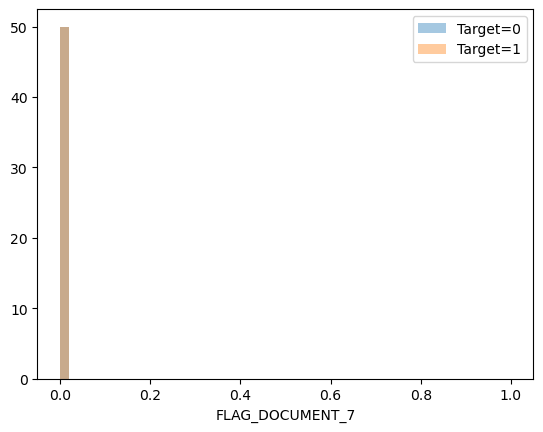

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


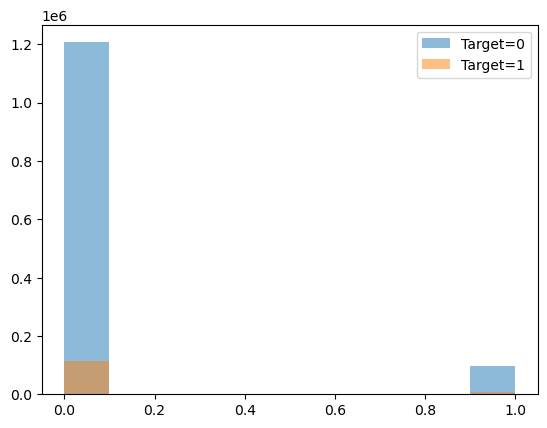

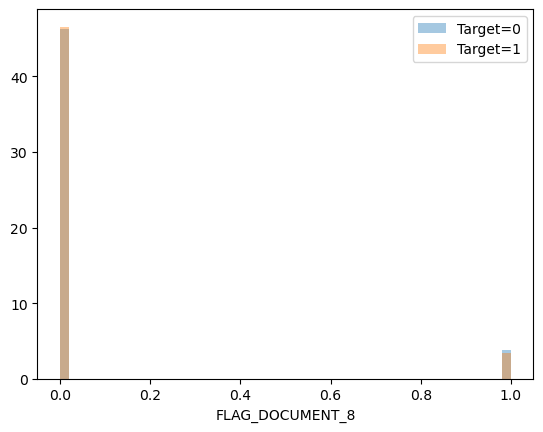

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


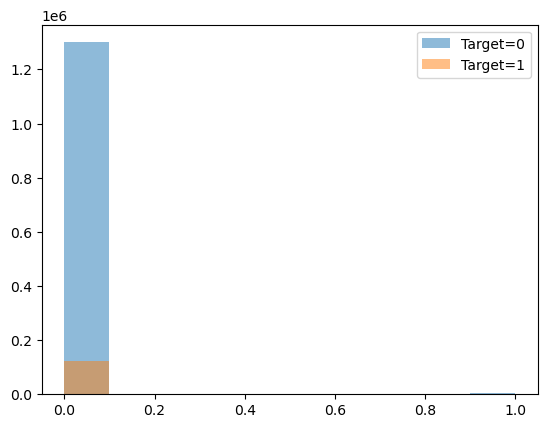

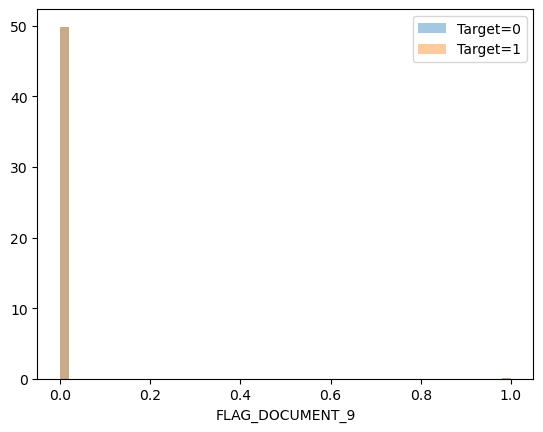

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


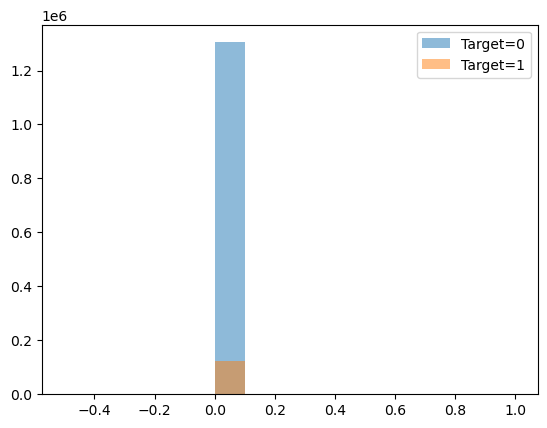

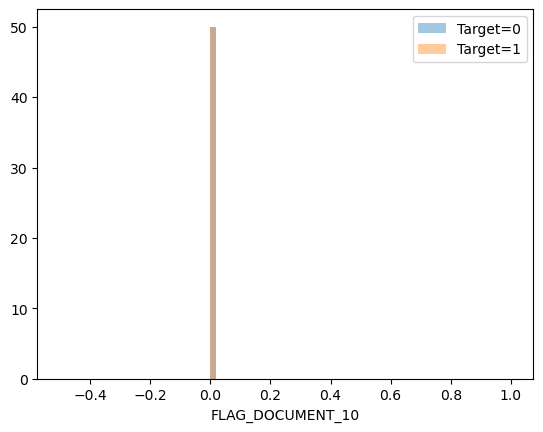

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


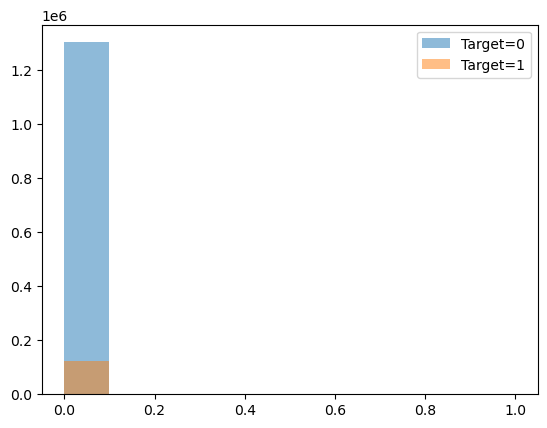

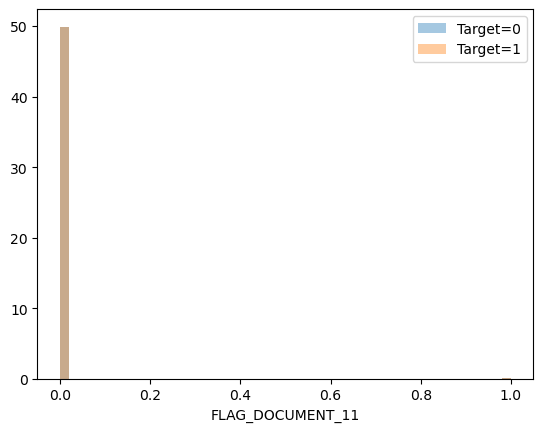

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


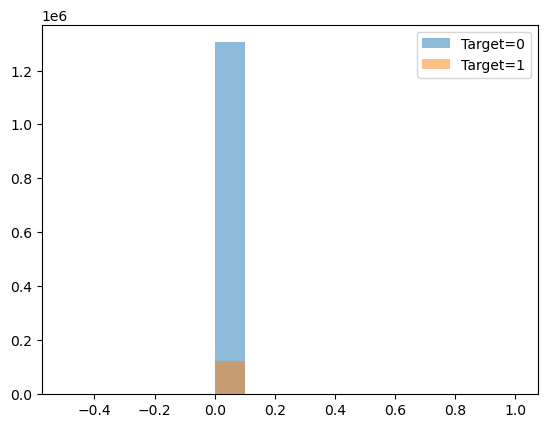

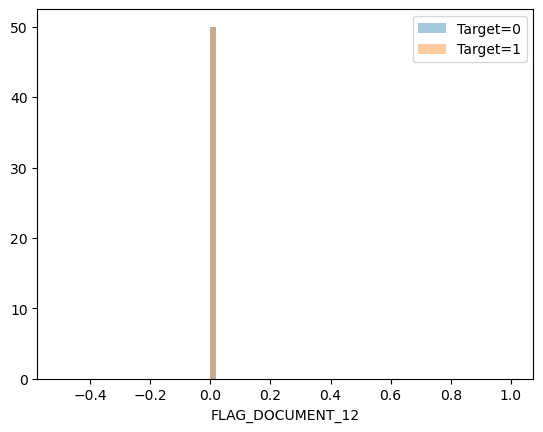

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


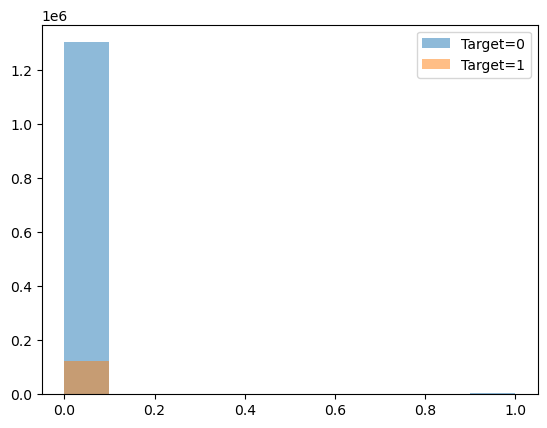

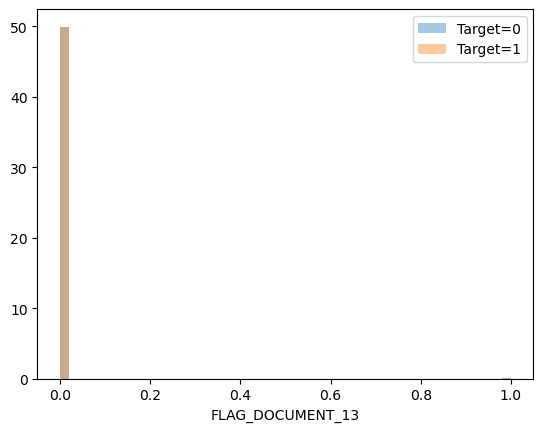

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


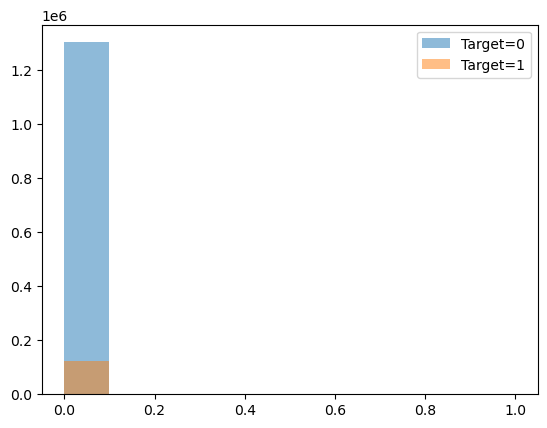

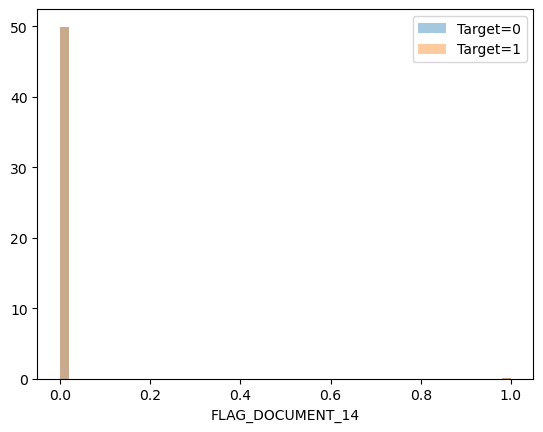

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


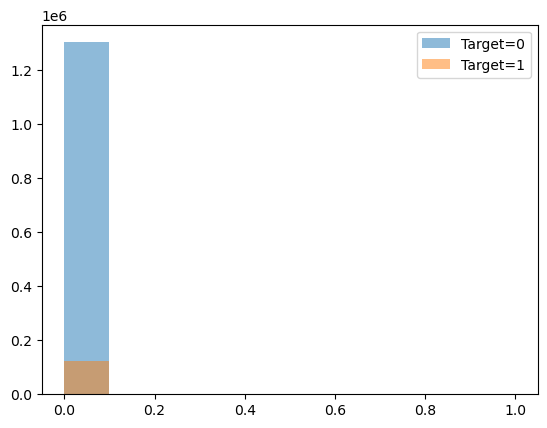

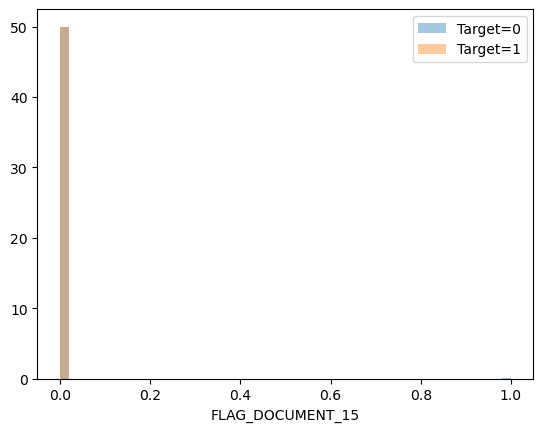

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


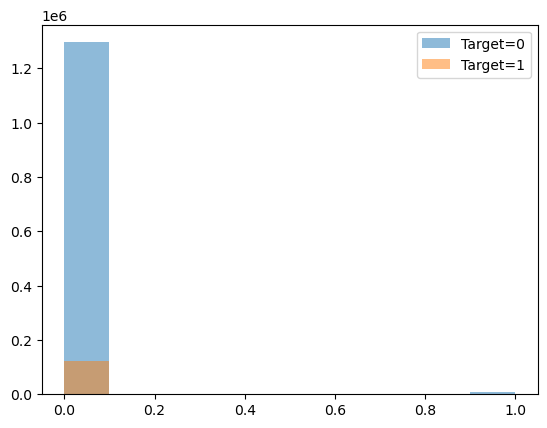

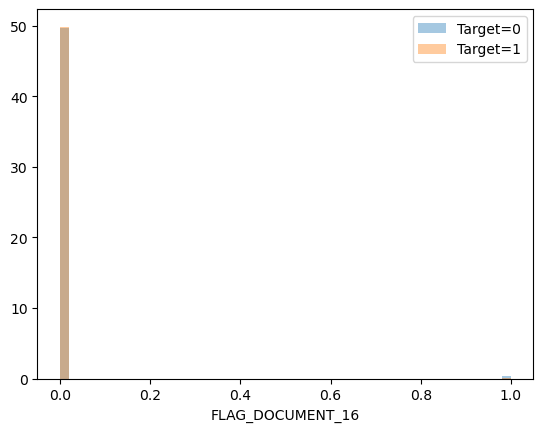

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


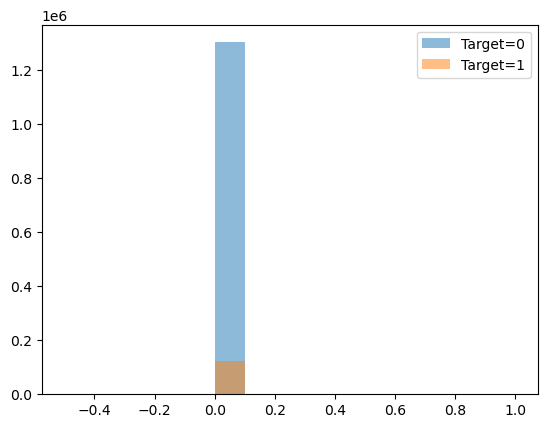

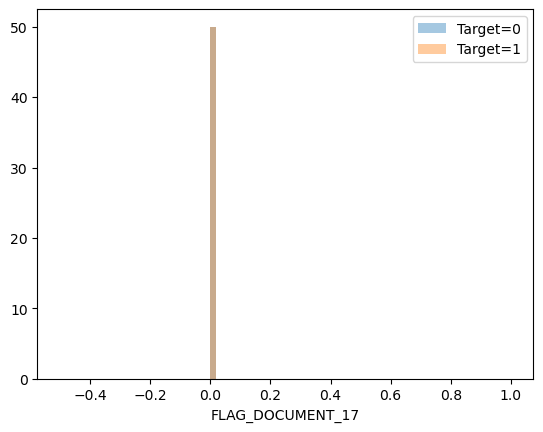

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_18


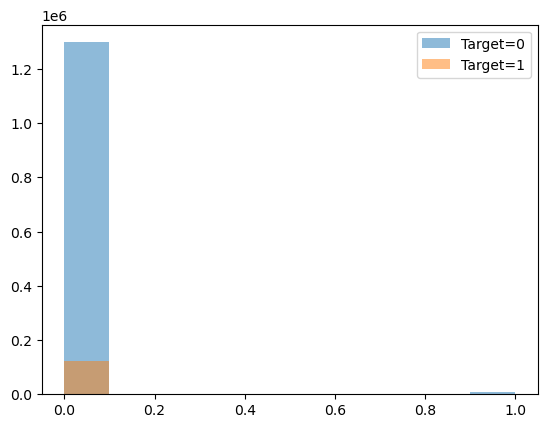

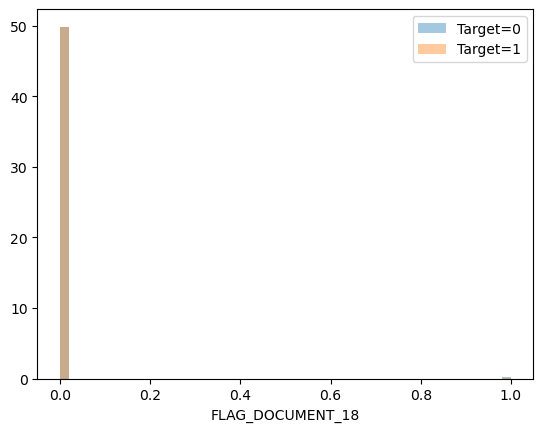

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_19


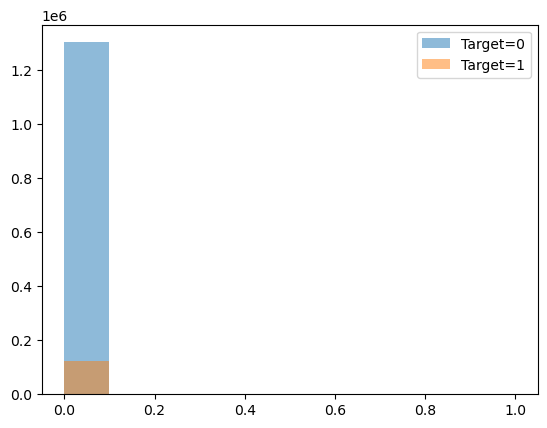

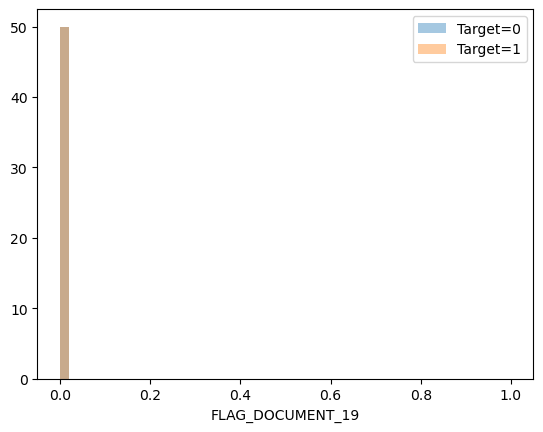

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_20


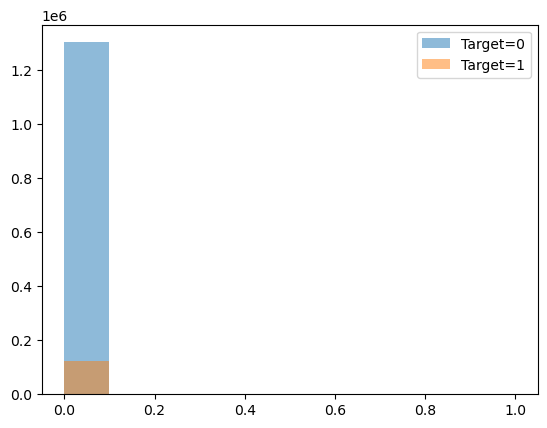

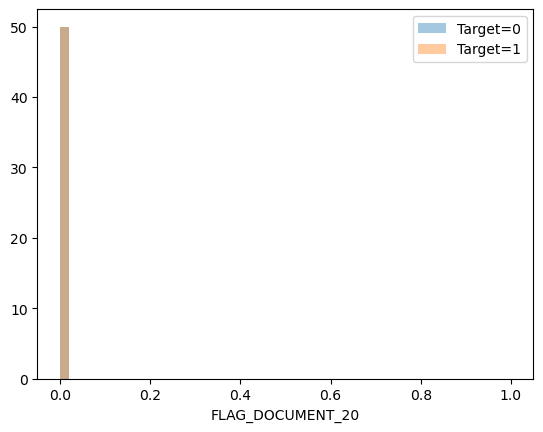

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_21


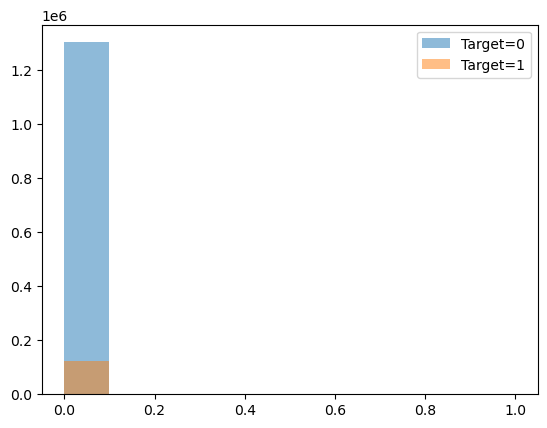

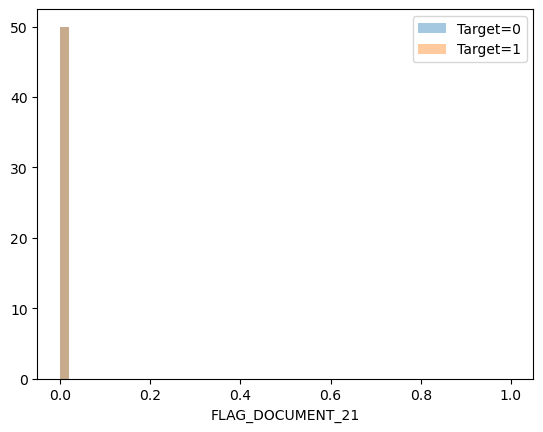

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


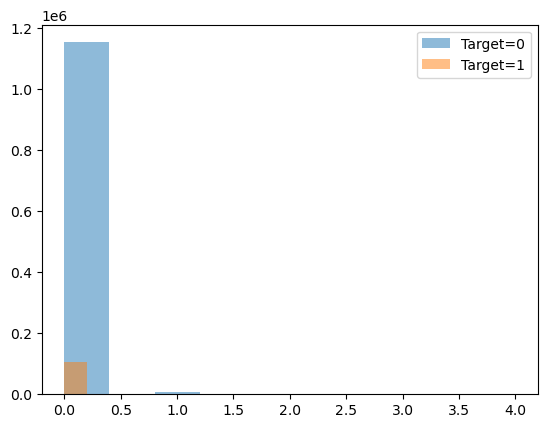

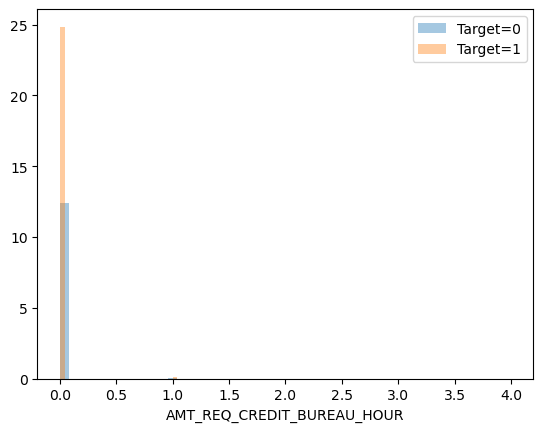

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


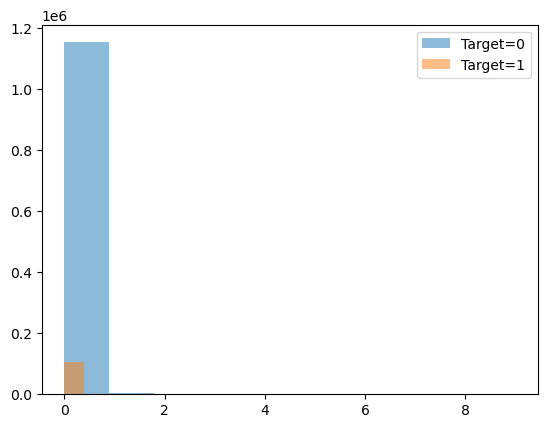

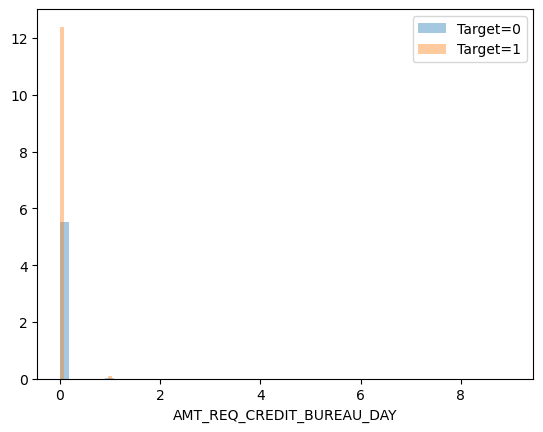

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


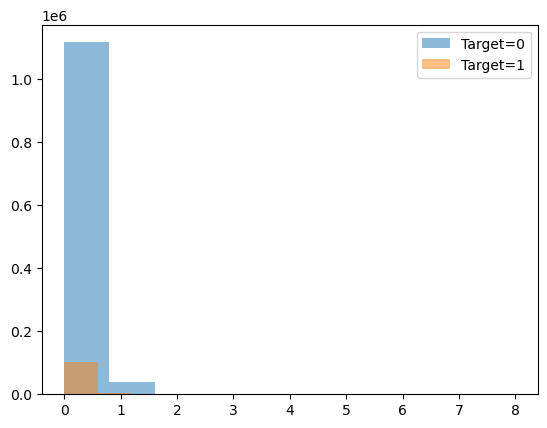

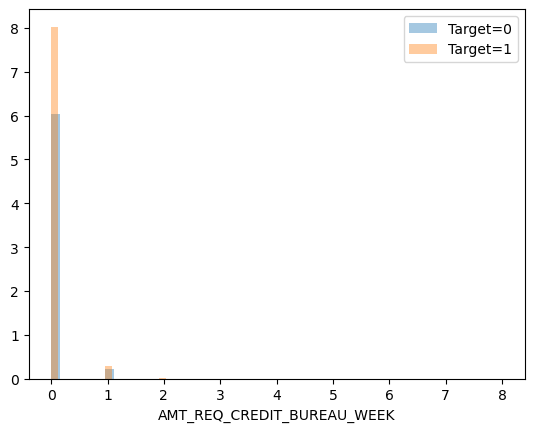

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


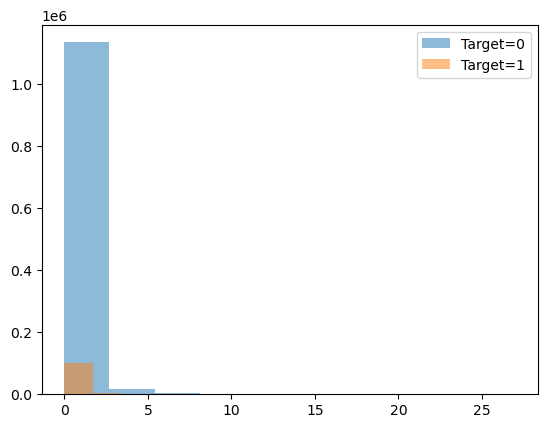

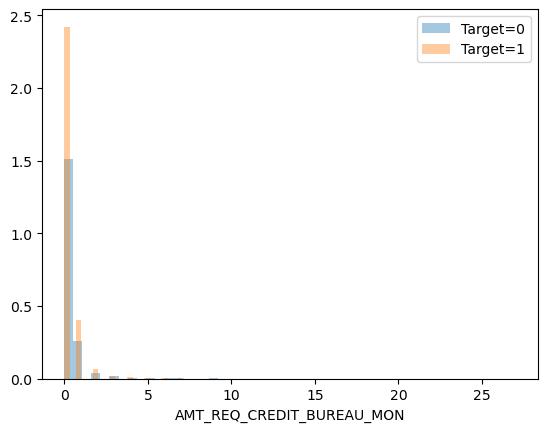

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


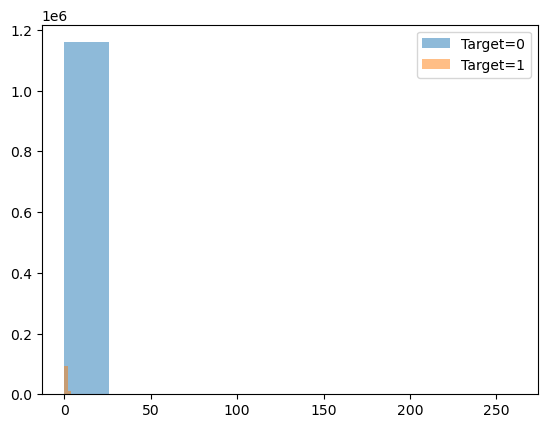

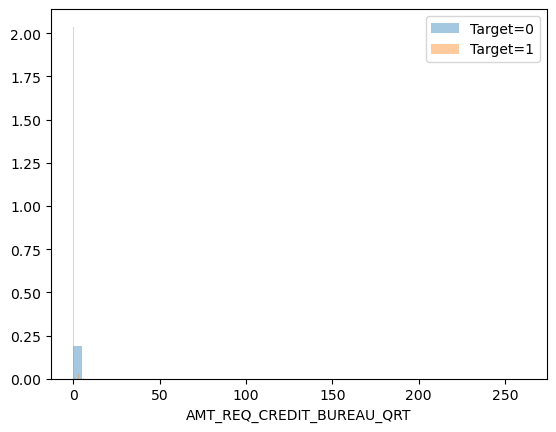

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


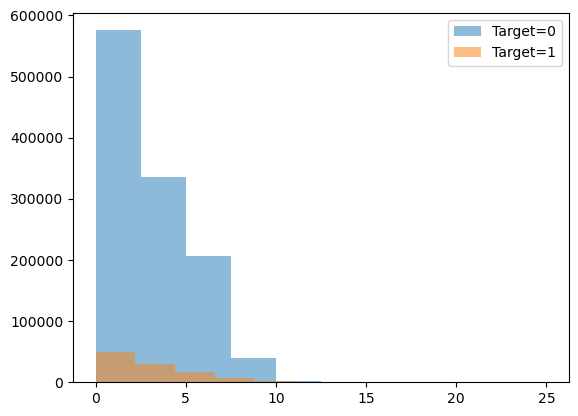

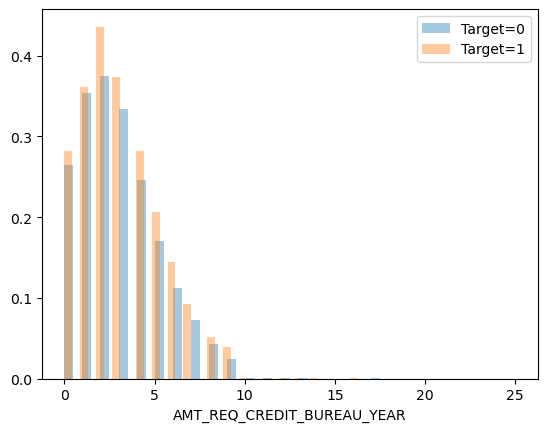

------------------------------------------------------------------------
Plot of SK_ID_PREV


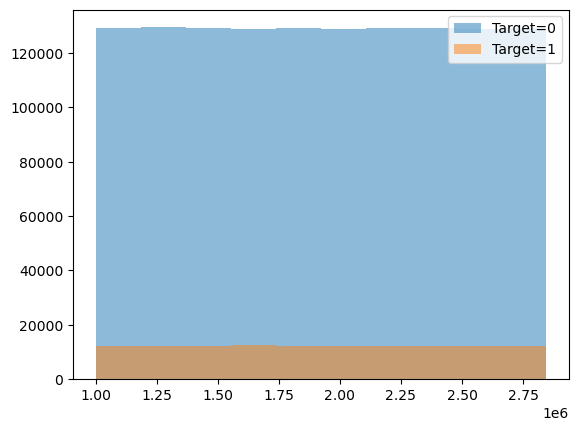

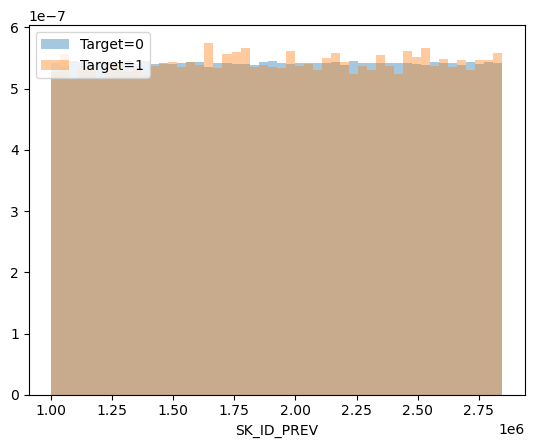

------------------------------------------------------------------------
Plot of AMT_ANNUITY_y


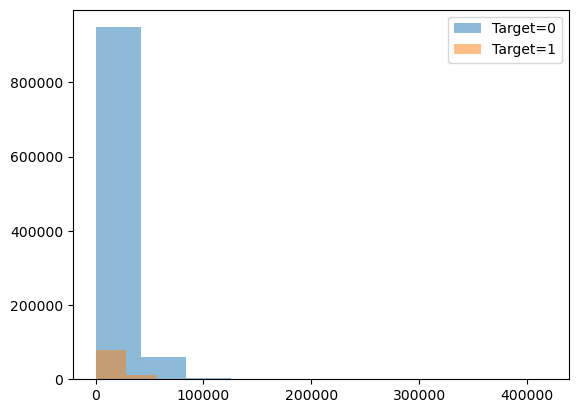

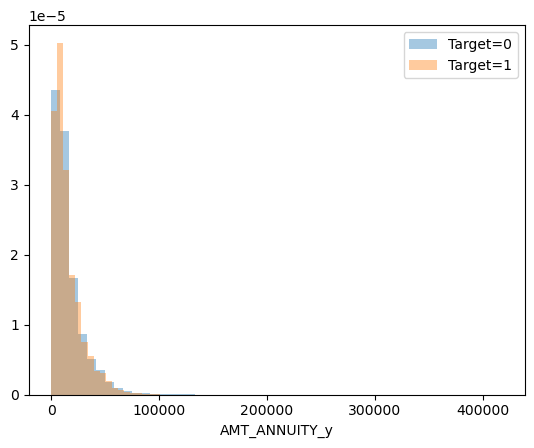

------------------------------------------------------------------------
Plot of AMT_APPLICATION


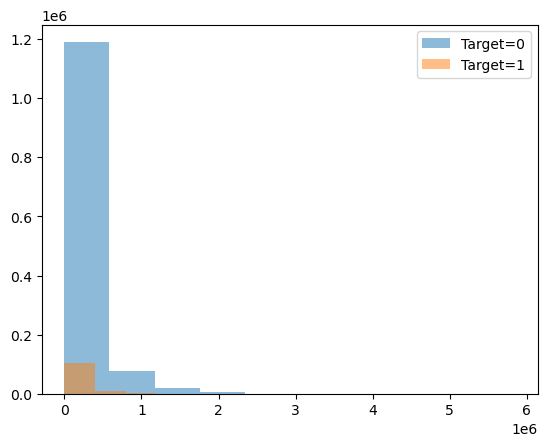

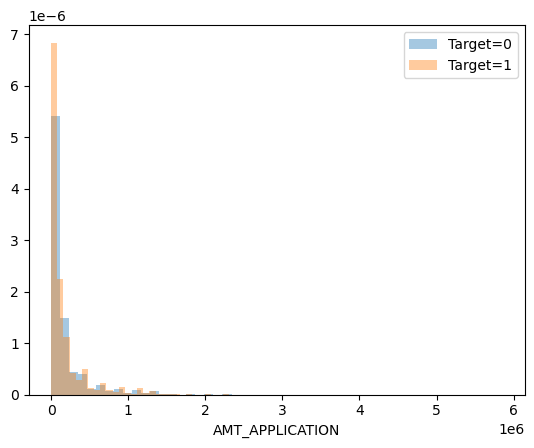

------------------------------------------------------------------------
Plot of AMT_CREDIT_y


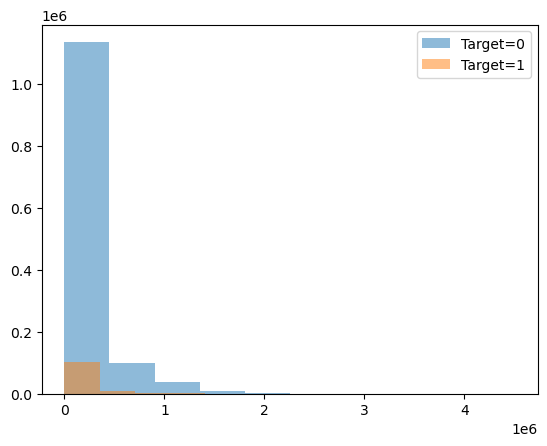

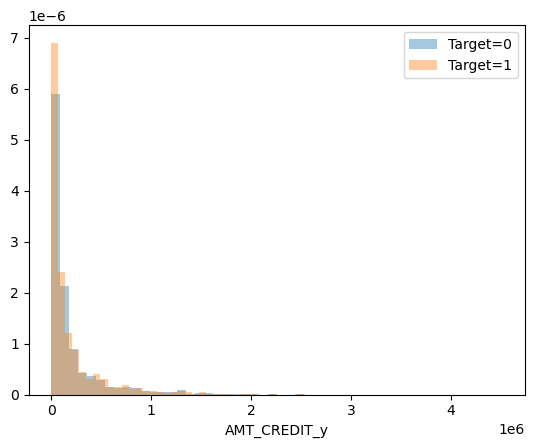

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE_y


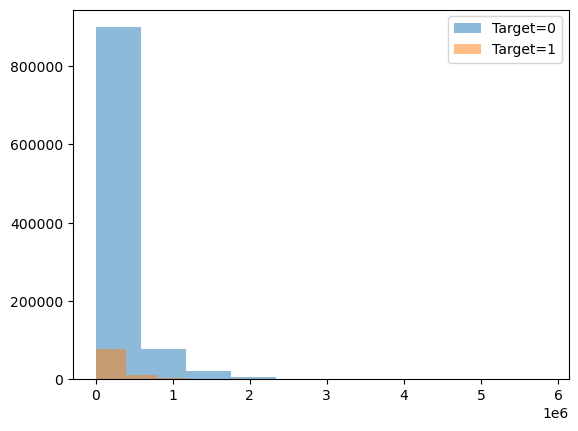

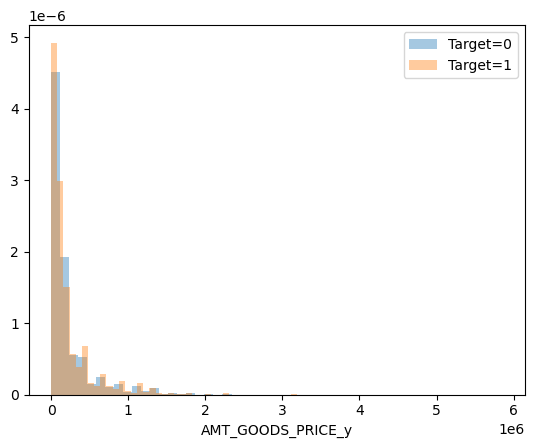

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START_y


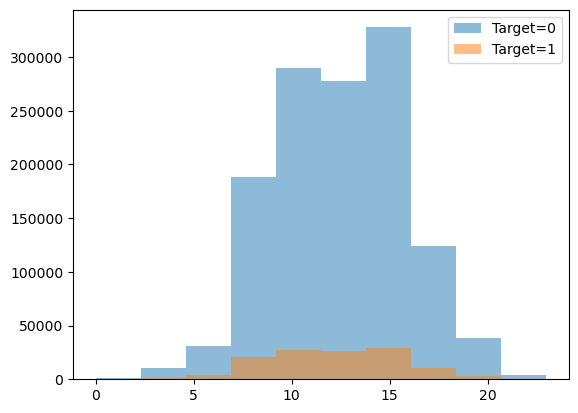

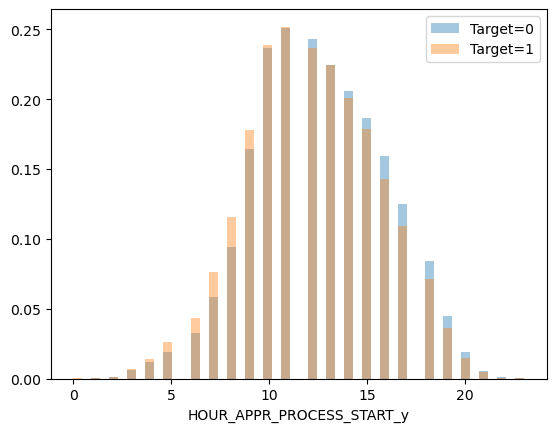

------------------------------------------------------------------------
Plot of NFLAG_LAST_APPL_IN_DAY


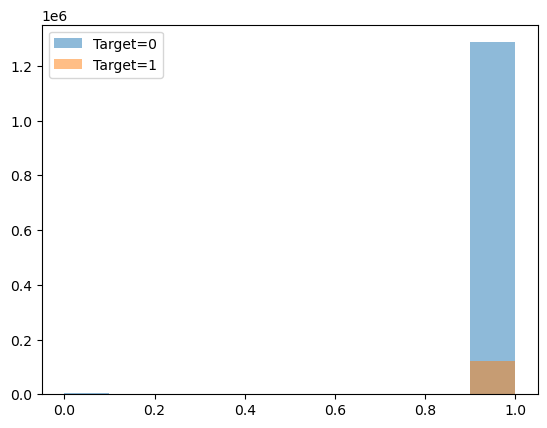

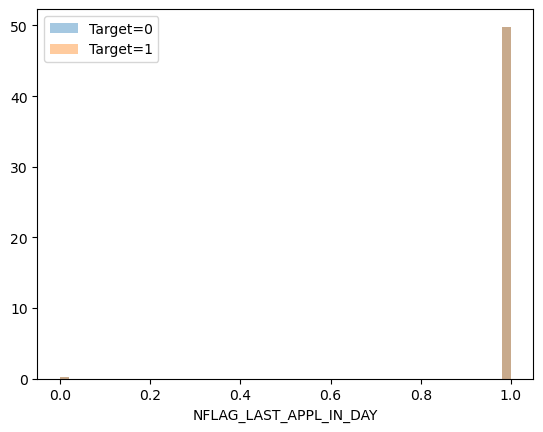

------------------------------------------------------------------------
Plot of DAYS_DECISION


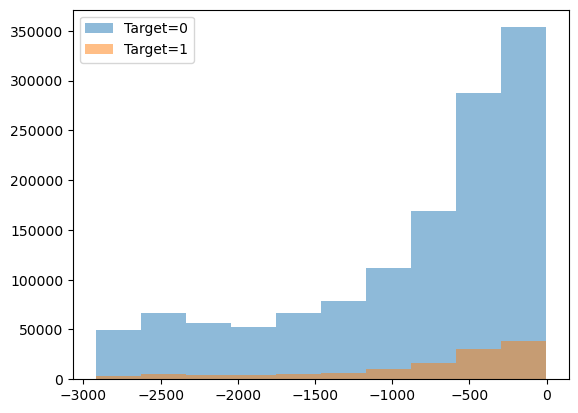

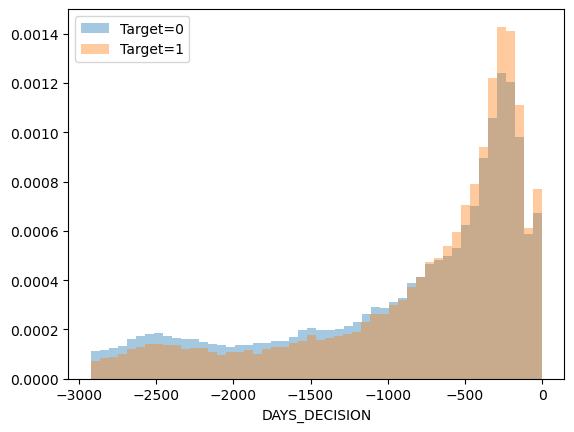

------------------------------------------------------------------------
Plot of SELLERPLACE_AREA


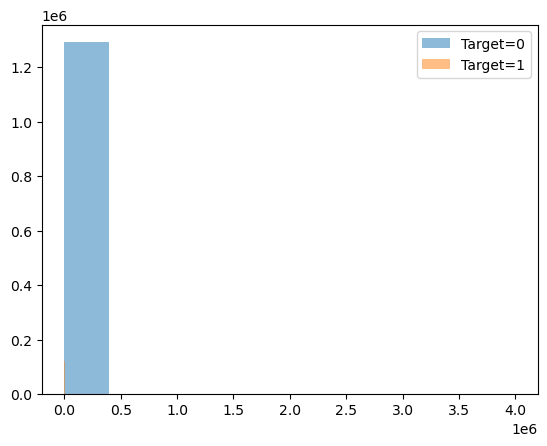

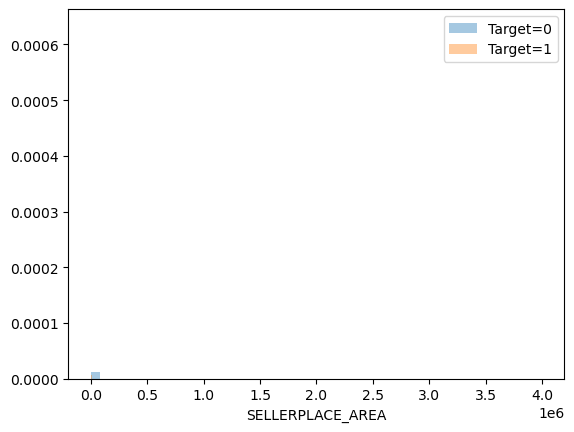

------------------------------------------------------------------------
Plot of CNT_PAYMENT


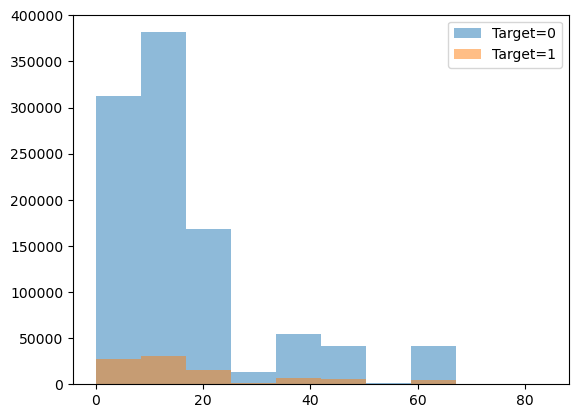

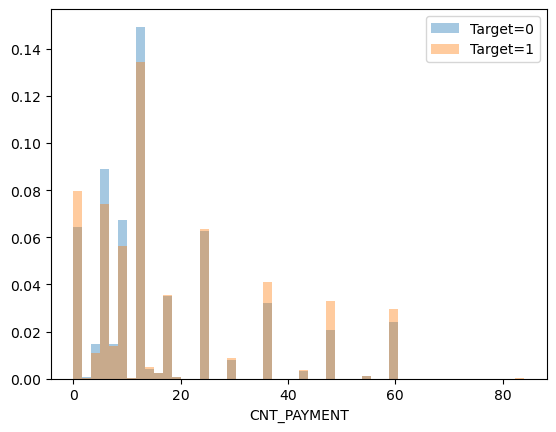

------------------------------------------------------------------------


In [110]:
# Iterate over each categorical column to generate plots
for column in cleaned_numerical:
    # Construct and print the title for current plot
    title = "Plot of " + column
    print(title)

    # Plot histograms for the distribution of the variable for both TARGET categories
    plt.hist(ontime_data[column], alpha=0.5, label='Target=0')  # Histogram for category '0'
    plt.hist(not_ontime_data[column], alpha=0.5, label='Target=1')  # Histogram for category '1'
    plt.legend()  # Add a legend to distinguish between categories
    plt.show()  # Display the histogram

    # Plot distribution plots for the non-null values in both TARGET categories
    sns.distplot(ontime_data[column].dropna(), label='Target=0', kde=False, norm_hist=True)  # Distribution plot for '0'
    sns.distplot(not_ontime_data[column].dropna(), label='Target=1', kde=False, norm_hist=True)  # Distribution plot for '1'
    plt.legend()  # Add a legend to distinguish between categories
    plt.show()  # Display the distribution plot

    
    # Print a separator for readability between plots
    print("------------------------------------------------------------------------")

### The columns which seems different where both the histogram and distribution plot are different for the target = 0 and target = 1 are:

AMT_CREDIT

AMT_ANNUITY

AMT_GOODS_PRICE

DAYS_BIRTH

HOURS_APPR_PROCESS_START

EXT_SOUCE_2

EXT_SOURCE_3

AMT_REQ_CREDIT_BUREAU_YEAR

# Bivariate anlysis

In [142]:
def bivariate_plotting(column, hue):
    # Create a figure for the plots with a specific size
    fig = plt.figure(figsize=(13,10))

    # Subplot 1: Pie chart showing the distribution of values in the column
    ax1 = plt.subplot(221)
    cleaned_data[column].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1)
    plt.title('Distribution of values for the column: '+ column)

     # Subplot 2: Count plot displaying the distribution of values by target categories
    ax2 = plt.subplot(222)
    sns.countplot(data=cleaned_data, x=column, hue=hue, ax=ax2)
    plt.title('Distribution of values by target category')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plots


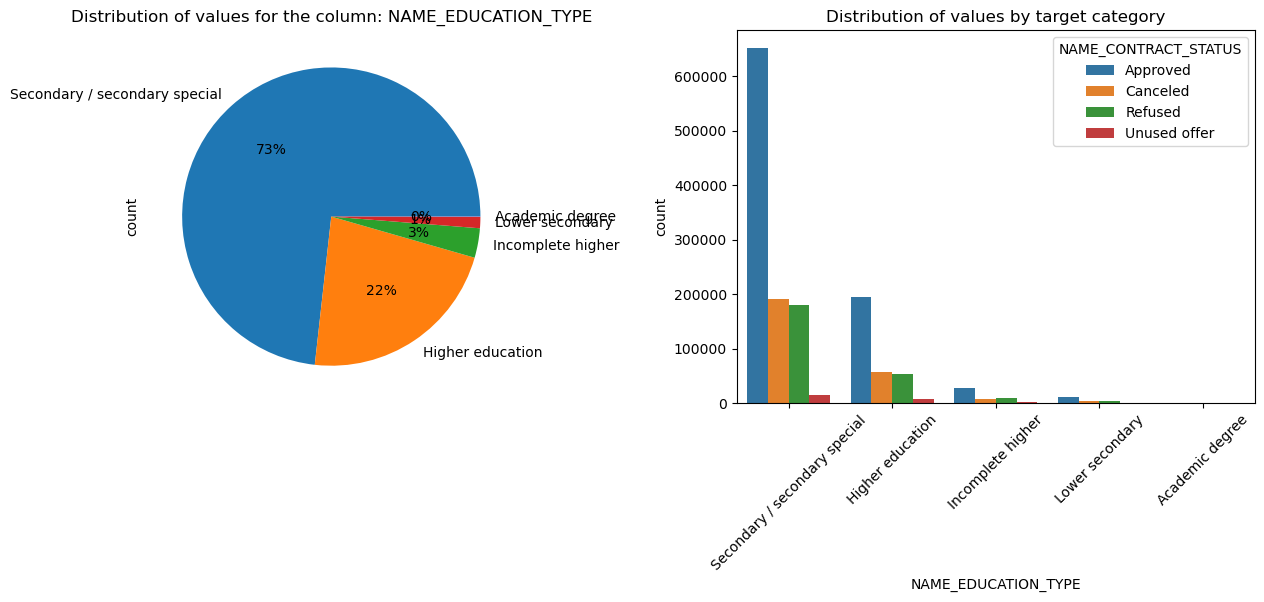

In [144]:
bivariate_plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

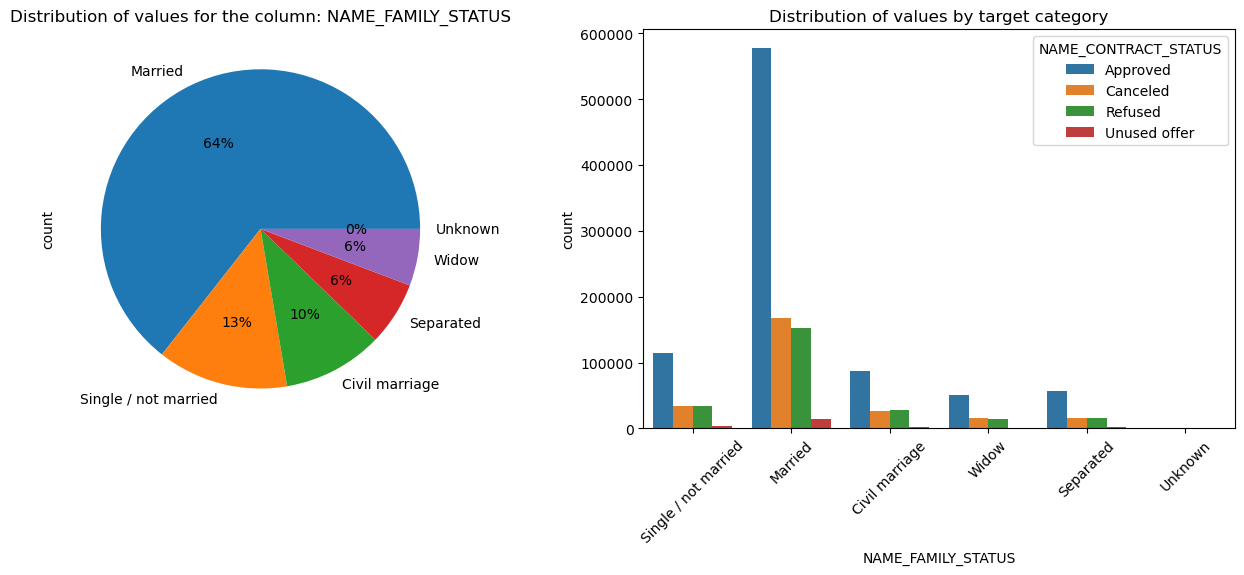

In [148]:
bivariate_plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

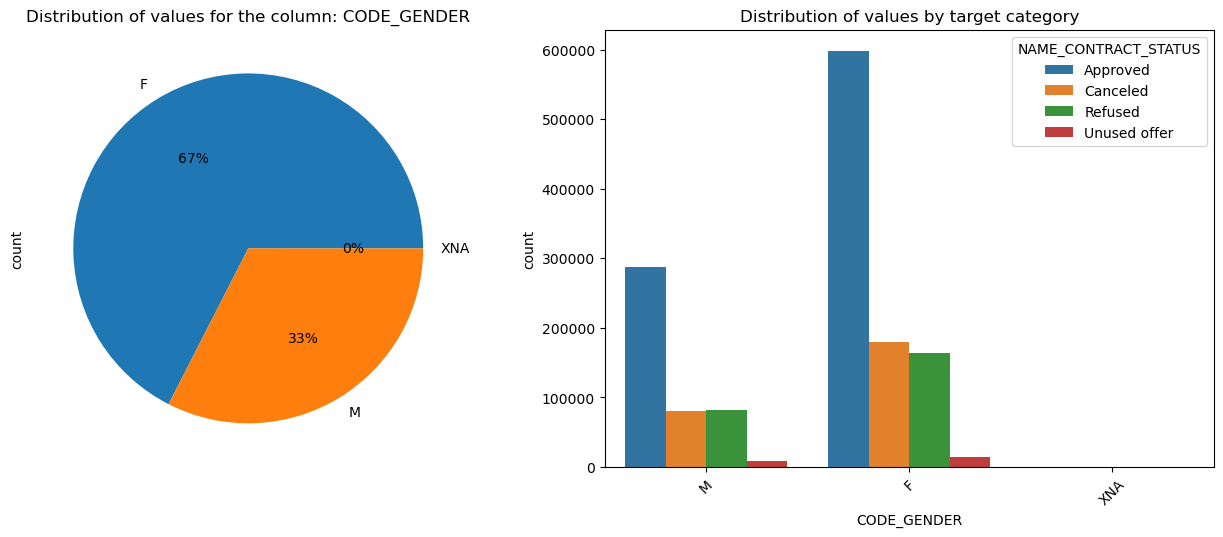

In [150]:
bivariate_plotting('CODE_GENDER','NAME_CONTRACT_STATUS')

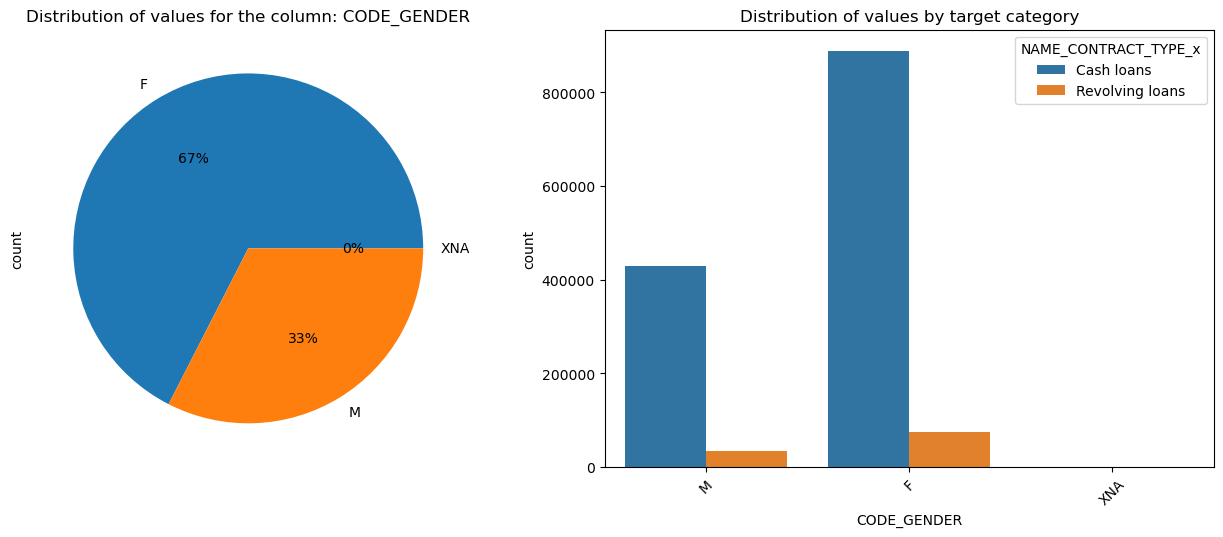

In [154]:
bivariate_plotting('CODE_GENDER','NAME_CONTRACT_TYPE_x')

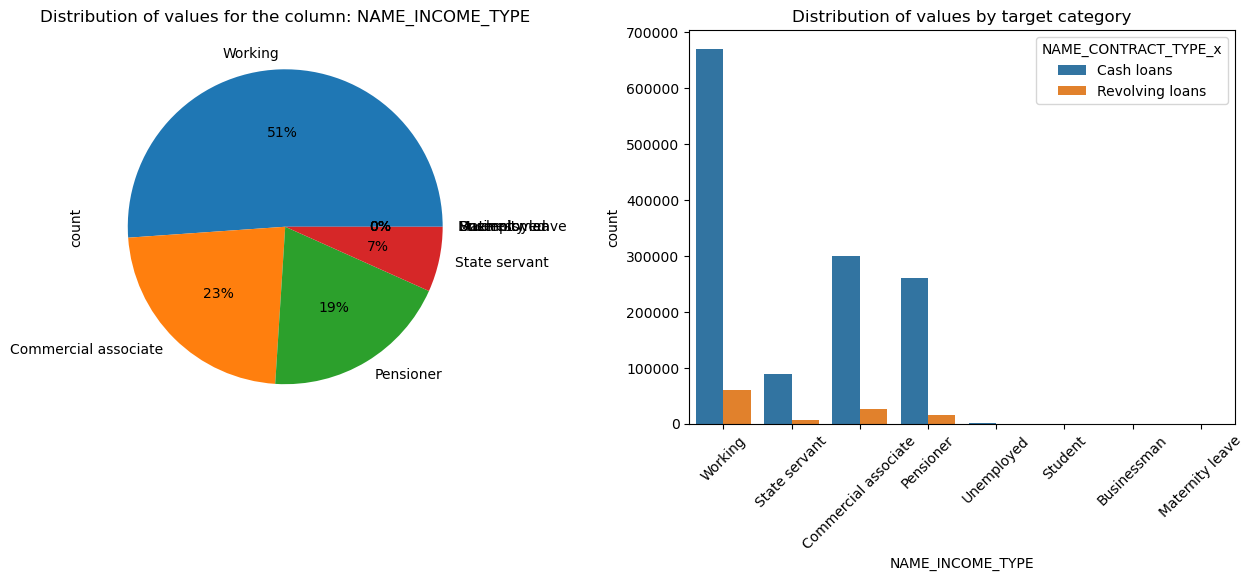

In [156]:
bivariate_plotting('NAME_INCOME_TYPE','NAME_CONTRACT_TYPE_x')

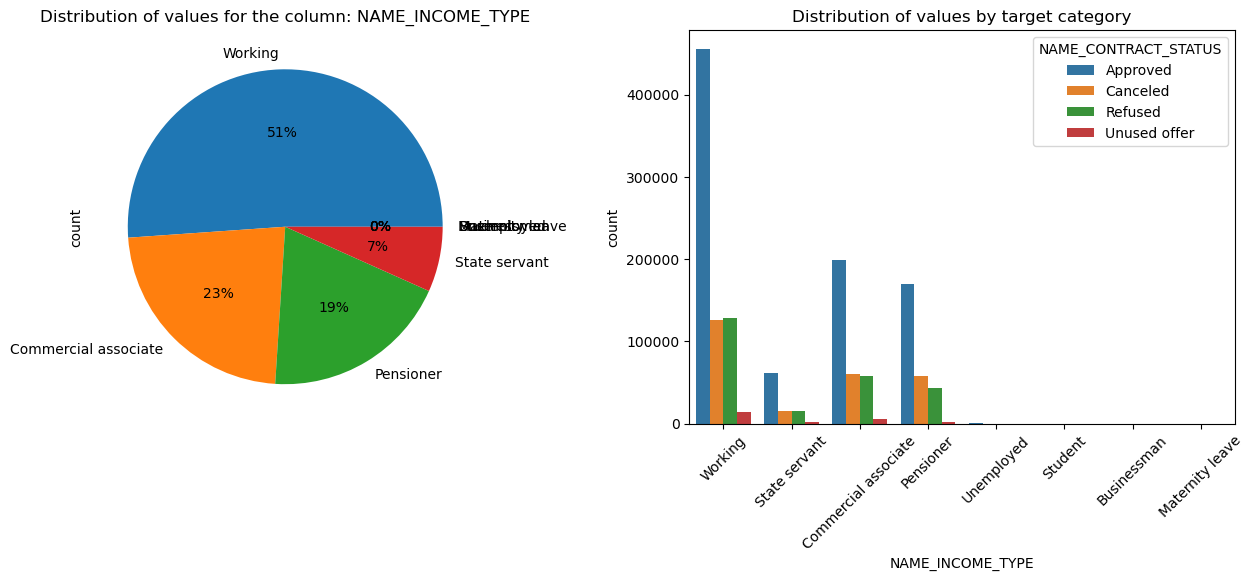

In [158]:
bivariate_plotting('NAME_INCOME_TYPE','NAME_CONTRACT_STATUS')

### Finding top 10 correlations 

In [213]:
# Assuming cleaned_data is your DataFrame
# Step 1: Normalize column names
cleaned_data.columns = cleaned_data.columns.str.strip()

if 'TARGET' in cleaned_data.columns:
    print("TARGET column exists.")
else:
    print("TARGET column does not exist.")

# Step 2: Confirm columns
print("Columns in DataFrame:", cleaned_data.columns)

# Step 3: Set the target column name
target_column = 'TARGET'  # Use the exact name

# Step 4: Identify non-numeric columns
non_numeric_columns = cleaned_data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Step 5: Convert or drop non-numeric columns
for col in non_numeric_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

# Drop non-numeric columns if needed
cleaned_data = cleaned_data.drop(columns=non_numeric_columns.tolist())

# Step 6: Calculate the correlation matrix
correlation_matrix = cleaned_data.corr()

# Step 7: Select and sort target correlations
target_correlations = correlation_matrix[target_column]  # Use the verified target column name
top_10_correlations = target_correlations.abs().sort_values(ascending=False).head(11)



TARGET column exists.
Columns in DataFrame: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'E

In [214]:
top_10_correlations

TARGET                         1.000000
EXT_SOURCE_3                   0.188381
EXT_SOURCE_2                   0.155211
DAYS_BIRTH                     0.074314
REGION_RATING_CLIENT_W_CITY    0.059832
DAYS_LAST_PHONE_CHANGE         0.058110
REGION_RATING_CLIENT           0.057135
DAYS_ID_PUBLISH                0.050833
REG_CITY_NOT_WORK_CITY         0.049383
FLAG_EMP_PHONE                 0.048353
DAYS_EMPLOYED                  0.047409
Name: TARGET, dtype: float64

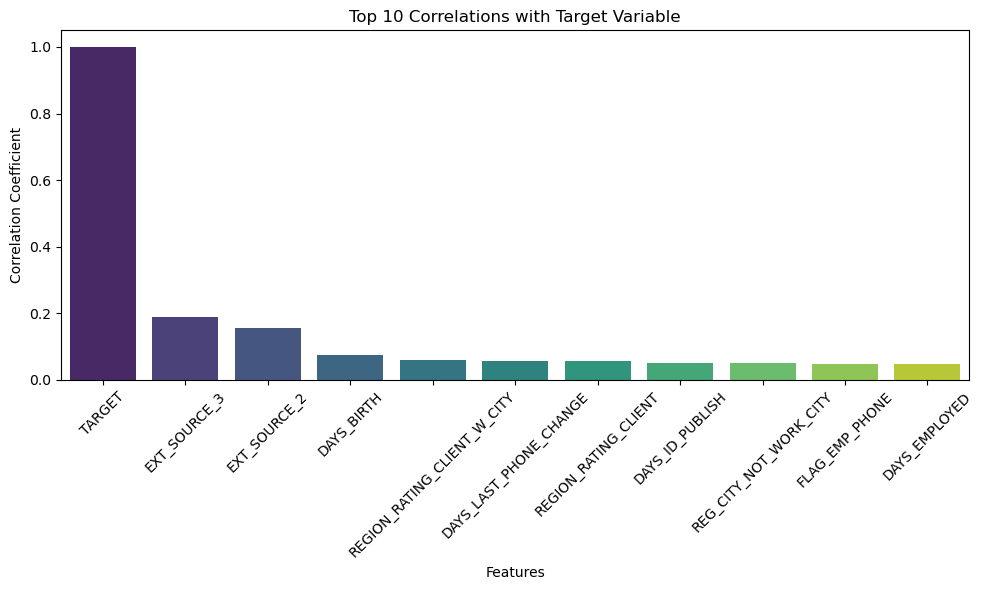

In [219]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_correlations.index, y=top_10_correlations.values, palette='viridis')
plt.title('Top 10 Correlations with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

# Conclusion


In our comprehensive analysis of the loan applicant dataset for credit evaluation, we gained significant insights. We began by identifying missing values and effectively removed rows and columns that contained a high volume of such gaps. This step ensured the integrity of our dataset for further exploration.

Next, we delved into the distribution of various variables, scrutinising outliers and examining the relationships between different attributes through univariate and bivariate analyses. This thorough investigation led us to identify the top 10 correlations among the variables, providing a clearer picture of how these factors interact.

Overall, this analysis enhances our understanding of the dataset and its potential implications for loan management and risk assessment. The insights we gathered can inform critical decision-making processes, such as the development of predictive models or the refinement of loan approval criteria. By leveraging these findings, lending institutions can improve their practices, making them more effective and efficient. Ultimately, this will help in minimising the risks of defaults, ensuring that loan management strategies are robust and well-informed. This analytical approach sets the foundation for more informed lending decisions in the future.